In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import os
pd.options.mode.chained_assignment = None
plt.ion()

In [3]:
df_companies = {}
data_path = 'Companies/'
for f_name in os.listdir(data_path):
    comp_name = str(f_name).replace('HistoricalQuotes_','').replace('.csv', '')
    print("Company name: ", comp_name, "| File name: ", f_name)
    df_companies[comp_name] = pd.read_csv(data_path + f_name)

Company name:  AAPL | File name:  HistoricalQuotes_AAPL.csv
Company name:  AMD | File name:  HistoricalQuotes_AMD.csv
Company name:  AMZN | File name:  HistoricalQuotes_AMZN.csv
Company name:  BA | File name:  HistoricalQuotes_BA.csv
Company name:  GM | File name:  HistoricalQuotes_GM.csv
Company name:  LUV | File name:  HistoricalQuotes_LUV.csv
Company name:  MCD | File name:  HistoricalQuotes_MCD.csv
Company name:  MRNA | File name:  HistoricalQuotes_MRNA.csv
Company name:  NFLX | File name:  HistoricalQuotes_NFLX.csv
Company name:  SBUX | File name:  HistoricalQuotes_SBUX.csv
Company name:  UAL | File name:  HistoricalQuotes_UAL.csv
Company name:  UBER | File name:  HistoricalQuotes_UBER.csv


In [4]:
df_companies[list(df_companies.keys())[0]].columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

<h1>Data Dictionary</h1>
<ul>
    <li>Date: Date on which the values in the row was recorded</li>
    <li>Close<span>&#47;</span>Last: The closing price of the stock or the last price at which the stock was traded, <i>Note: That the closing prices have been adjusted to account for splits and<span>&#47;</span>or divdends</i></li>
    <li>Volume: It is the number of shares that changed hands during a given day</li>
    <li>Open: The opening price of the stock or the price of the first trade of the stock upon the opening of an exchange</li>
    <li>High: The highest price the stock traded on that day</li>
    <li>Low: The lowest price the stock traded on that day</li>
</ul>

In [5]:
for k in df_companies.keys():
    missing_data = pd.DataFrame(df_companies[k].isna().sum().sort_values(ascending = False), columns=['Count'])
    print("----------------------")
    print("Company Name: ", k)
    print(missing_data)

----------------------
Company Name:  AAPL
             Count
 Low             0
 High            0
 Open            0
 Volume          0
 Close/Last      0
Date             0
----------------------
Company Name:  AMD
             Count
 Low             0
 High            0
 Open            0
 Volume          0
 Close/Last      0
Date             0
----------------------
Company Name:  AMZN
             Count
 Low             0
 High            0
 Open            0
 Volume          0
 Close/Last      0
Date             0
----------------------
Company Name:  BA
             Count
 Low             0
 High            0
 Open            0
 Volume          0
 Close/Last      0
Date             0
----------------------
Company Name:  GM
             Count
 Low             0
 High            0
 Open            0
 Volume          0
 Close/Last      0
Date             0
----------------------
Company Name:  LUV
             Count
 Low             0
 High            0
 Open            0
 Volume

<h4>No missing values</h4>

In [6]:
df_companies[list(df_companies.keys())[0]].dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [7]:
def str_match(col,s):
    """
    Returns a Boolean Series with the 
    condition that the substring
    is present in the row or not.
    """
    if(s in col):
        return True
    else:
        return False

In [8]:
df_companies[list(df_companies.keys())[0]].head()

Date  Close/Last     Volume      Open       High       Low
0  09/17/2020     $110.34  178011000   $109.72     $112.2   $108.71
1  09/16/2020     $112.13  155026700   $115.23       $116   $112.04
2  09/15/2020     $115.54  184642000   $118.33   $118.829   $113.61
3  09/14/2020    $115.355  140150100   $114.72    $115.93    $112.8
4  09/11/2020        $112  180860300   $114.57    $115.23      $110

In [9]:
def strip_dollar(df):
    for col in df.columns:
        rows_with_dollar = df[col].apply(str_match,args = ('$'))
        prices = df[col][rows_with_dollar].str.split('$').str.get(1)
        df[col].replace(list(df[col][rows_with_dollar]),list(prices),inplace = True)
        df[col] = pd.to_numeric(df[col])
    return df

<p>Coverting the columns to appropriate data type</p>

In [10]:
non_dollar = ('Date', ' Volume')
for k in df_companies.keys():
    df_companies[k]['Date'] = pd.to_datetime(df_companies[k]['Date'])
    try:
        df_companies[k].loc[:, ~df_companies[k].columns.isin(non_dollar)] = strip_dollar(
            df_companies[k].loc[:, ~df_companies[k].columns.isin(non_dollar)])
    except:
        pass

In [11]:
df_companies[list(df_companies.keys())[0]].dtypes

Date           datetime64[ns]
 Close/Last           float64
 Volume                 int64
 Open                 float64
 High                 float64
 Low                  float64
dtype: object

In [14]:
save_path = 'Cleaned/'
for k in df_companies.keys():
    df_companies[k].to_csv(save_path + str(k) + '.csv', index = False, header = True)

In [11]:
def quaterly_summary(df_companies):
    for k in df_companies.keys():
        df = df_companies[k]
        for year in [2019,2020]:
            y_data = df[df.Date.dt.year == year]
            for q in range(1,5):
                try:
                    q_data = y_data[y_data.Date.dt.quarter == q]
                    if len(q_data) == 0:
                        raise Exception("No Data")
                    summary = q_data.describe(exclude = 'datetime')
                except:
                    print("Company: ", k, "Has no data for: ", year, "Q", q)
                else:
                    print("---------------------------------------------------------------------------")
                    print('Summary for {} in the year {} in Quartile {}'.format(k, year, q))
                    print("---------------------------------------------------------------------------")
                    print(summary)
                finally:
                    pass
                
                

In [12]:
quaterly_summary(df_companies)

---------------------------------------------------------------------------
Summary for AAPL in the year 2019 in Quartile 1
---------------------------------------------------------------------------
        Close/Last        Volume       Open       High        Low
count    61.000000  6.100000e+01  61.000000  61.000000  61.000000
mean     42.415943  1.271683e+08  42.335795  42.764162  41.969825
std       3.322490  5.000682e+07   3.387727   3.376719   3.347353
min      35.547500  6.796644e+07  35.995000  36.430000  35.500000
25%      39.075000  9.517532e+07  38.947500  39.470000  38.527500
50%      42.765000  1.184648e+08  42.812500  43.120000  42.480000
75%      43.962500  1.425483e+08  43.922500  44.437500  43.635000
max      48.772500  3.644274e+08  48.835000  49.422500  47.695000
---------------------------------------------------------------------------
Summary for AAPL in the year 2019 in Quartile 2
---------------------------------------------------------------------------
      

---------------------------------------------------------------------------
Summary for AMD in the year 2020 in Quartile 1
---------------------------------------------------------------------------
        Close/Last        Volume        Open        High         Low
count    62.000000  6.200000e+01   62.000000   62.000000   62.000000
mean    124.366323  1.050708e+08  124.163342  128.918408  119.800060
std      29.370457  4.782936e+07   29.877377   30.578499   28.535304
min      72.244000  4.779193e+07   74.939400   80.972000   70.102000
25%     102.249500  7.272651e+07   99.627500  103.182850   98.408500
50%     114.176000  8.899542e+07  115.658000  118.900000  111.718000
75%     149.747500  1.232896e+08  147.803500  157.096300  143.516025
max     183.484000  3.046938e+08  184.700000  193.798000  180.204000
---------------------------------------------------------------------------
Summary for AMD in the year 2020 in Quartile 2
---------------------------------------------------------

---------------------------------------------------------------------------
Summary for BA in the year 2019 in Quartile 2
---------------------------------------------------------------------------
        Close/Last        Volume        Open        High         Low
count    63.000000  6.300000e+01   63.000000   63.000000   63.000000
mean    364.640000  5.132247e+06  364.340476  368.039557  360.708616
std      14.838569  2.379531e+06   14.874904   15.071049   15.357343
min     337.370000  2.183884e+06  338.200000  339.110000  330.670000
25%     352.785000  3.244367e+06  351.685000  355.506500  347.510000
50%     364.940000  4.737120e+06  366.330000  369.930000  362.350000
75%     375.630000  6.456612e+06  376.045000  379.555000  373.455000
max     395.860000  1.442669e+07  398.070000  398.660000  390.950000
---------------------------------------------------------------------------
Summary for BA in the year 2019 in Quartile 3
-----------------------------------------------------------

---------------------------------------------------------------------------
Summary for GM in the year 2020 in Quartile 2
---------------------------------------------------------------------------
        Close/Last        Volume       Open       High        Low
count    63.000000  6.300000e+01  63.000000  63.000000  63.000000
mean     24.326667  1.680548e+07  24.421111  24.957065  23.818775
std       3.051599  5.092640e+06   3.134878   3.050361   3.027378
min      18.040000  9.553595e+06  18.400000  18.780000  17.790000
25%      22.065000  1.367144e+07  21.730000  22.495000  21.457200
50%      24.060000  1.591237e+07  24.040000  24.990000  23.583200
75%      26.635000  1.820262e+07  26.685000  27.582500  26.310000
max      30.680000  3.443054e+07  31.220000  31.660000  30.600000
---------------------------------------------------------------------------
Summary for GM in the year 2020 in Quartile 3
---------------------------------------------------------------------------
        Cl

---------------------------------------------------------------------------
Summary for MCD in the year 2019 in Quartile 4
---------------------------------------------------------------------------
        Close/Last        Volume        Open        High         Low
count    64.000000  6.400000e+01   64.000000   64.000000   64.000000
mean    198.362656  3.981935e+06  198.720000  199.704311  197.371056
std       6.554491  2.492647e+06    6.560772    6.698078    6.507280
min     188.660000  1.152517e+06  189.650000  190.750000  187.550000
25%     194.007500  2.701711e+06  194.275000  195.076250  193.117500
50%     196.110000  3.388078e+06  195.985000  197.070000  194.555700
75%     199.225000  4.187498e+06  201.355000  202.165325  198.302500
max     212.830000  1.766206e+07  213.030000  213.470000  211.620000
---------------------------------------------------------------------------
Summary for MCD in the year 2020 in Quartile 1
---------------------------------------------------------

---------------------------------------------------------------------------
Summary for SBUX in the year 2019 in Quartile 4
---------------------------------------------------------------------------
        Close/Last        Volume       Open       High        Low
count    64.000000  6.400000e+01  64.000000  64.000000  64.000000
mean     85.268047  6.418345e+06  85.471797  85.977870  84.709098
std       1.991170  2.168422e+06   2.005069   1.932935   2.037645
min      81.770000  1.847770e+06  81.750000  82.340000  81.030100
25%      83.645000  4.933128e+06  84.002500  84.470000  83.237875
50%      85.130000  6.069664e+06  85.375000  85.990000  84.555000
75%      86.530000  7.240392e+06  86.910000  87.303750  86.185000
max      88.780000  1.427166e+07  89.140000  89.300000  88.430000
---------------------------------------------------------------------------
Summary for SBUX in the year 2020 in Quartile 1
---------------------------------------------------------------------------
      

Company:  UBER Has no data for:  2019 Q 1
Company:  UBER Has no data for:  2019 Q 2
Company:  UBER Has no data for:  2019 Q 3
Company:  UBER Has no data for:  2019 Q 4
Company:  UBER Has no data for:  2020 Q 1
Company:  UBER Has no data for:  2020 Q 2
---------------------------------------------------------------------------
Summary for UBER in the year 2020 in Quartile 3
---------------------------------------------------------------------------
        Close/Last        Volume       Open       High        Low
count    21.000000  2.100000e+01  21.000000  21.000000  21.000000
mean     35.320952  2.363698e+07  35.142381  35.931905  34.505910
std       1.587164  1.207773e+07   1.632084   1.559516   1.746429
min      33.240000  1.073630e+07  32.360000  33.650000  31.550000
25%      34.300000  1.650344e+07  33.660000  34.510000  33.145000
50%      35.010000  2.178659e+07  35.200000  35.650000  34.110000
75%      36.980000  2.713092e+07  36.530000  37.145000  36.140000
max      37.950000  

In [13]:
def yearly_summary(df_companies):
    for k in df_companies.keys():
        df = df_companies[k]
        for year in [2019,2020]:
            y_data = df[df.Date.dt.year == year]
            if year == 2020:
                y_data = y_data[y_data.Date.dt.month <= 7] #Covid period only
            try:
                if len(y_data) == 0:
                    raise Exception("No Data")
                summary = y_data.describe(exclude = 'datetime')
            except:
                print("Company: ", k, "Has no data for: ", year)
            else:
                print("---------------------------------------------------------------------------")
                print('Summary for {} in the year {}'.format(k, year))
                print("---------------------------------------------------------------------------")
                print(summary)
            finally:
                pass

In [14]:
yearly_summary(df_companies)

---------------------------------------------------------------------------
Summary for AAPL in the year 2019
---------------------------------------------------------------------------
        Close/Last        Volume        Open        High         Low
count   252.000000  2.520000e+02  252.000000  252.000000  252.000000
mean     52.063983  1.122429e+08   51.967270   52.457905   51.568252
std       8.634743  4.320583e+07    8.593397    8.621378    8.576374
min      35.547500  4.544820e+07   35.995000   36.430000   35.500000
25%      46.505000  8.396297e+07   46.281875   46.958125   45.879375
50%      50.753750  1.032711e+08   50.785000   51.178750   50.398750
75%      55.921250  1.281367e+08   55.873750   56.260000   55.326875
max      73.412500  3.644274e+08   72.780000   73.492500   72.380000
---------------------------------------------------------------------------
Summary for AAPL in the year 2020
---------------------------------------------------------------------------
       

---------------------------------------------------------------------------
Summary for MCD in the year 2020
---------------------------------------------------------------------------
        Close/Last        Volume        Open        High         Low
count   147.000000  1.470000e+02  147.000000  147.000000  147.000000
mean    190.324422  4.534746e+06  190.122857  192.715033  187.576997
std      17.210598  2.333938e+06   17.292943   16.113574   18.519581
min     137.100000  1.720400e+06  135.200000  141.710000  124.230000
25%     181.760000  3.073150e+06  182.160000  183.970000  179.395000
50%     188.250000  3.856456e+06  189.550000  190.740000  186.085000
75%     202.590000  5.080542e+06  201.965000  204.790000  199.930000
max     217.460000  1.370825e+07  217.500000  218.385000  216.383200
---------------------------------------------------------------------------
Summary for MRNA in the year 2019
---------------------------------------------------------------------------
        

In [15]:
def plot_candlesticks(df_companies, mode = 'quater'):
    """
    Function to plot candlestick plots in stock prices data
    df_companies: Dict {key-> comp_name, value->comp_df}
    mode: 'quater': Plot quaterly
          'half': Plot half yearly
    """
    if mode == 'quater':
        for k in df_companies.keys():
            df = df_companies[k]
            for year in [2019,2020]:
                y_data = df[df.Date.dt.year == year]
                fig, axs = plt.subplots(nrows = 4,figsize=(40, 60))
                i = 0
                for q in range(1,5):
                    try:
                        q_data = y_data[y_data.Date.dt.quarter == q]
                        if len(q_data) == 0:
                            raise Exception("No Data")
                        day_of_year = mdates.date2num(q_data['Date'])
                        quotes = np.transpose(np.array([day_of_year, q_data[' Open'], q_data[' High'], q_data[' Low'], 
                              q_data[' Close/Last'], q_data[' Volume']]))
                        candlestick_ohlc(axs[i], quotes, colorup = 'lime')
                    except Exception as e:
                        axs[i].remove()
                        print("Company: ", k, "Has no data for: ", year, "Q", q)
                    else:
                        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
                        axs[i].xaxis.set_major_locator(mticker.MaxNLocator(10))
                        axs[i].grid(True)
                        axs[i].set_title('{} stocks of the year {} of Quartile {}'.format(k, year, q), fontsize=30,
                                        fontweight = 'bold')
                        axs[i].tick_params(axis='both', which='major', labelsize=20)
                        axs[i].set_ylabel('Price', fontsize=30)
                        axs[i].set_xlabel('Month',fontsize=30)
                    finally:
                        i+=1

        plt.show()
    elif mode == 'half':
        for k in df_companies.keys():
            df = df_companies[k]
            for year in [2019,2020]:
                y_data = df[df.Date.dt.year == year]
                fig, axs = plt.subplots(nrows = 2,figsize=(40, 40))
                i = 0
                for q in range(1,3):
                    try:
                        if q == 1:
                            q_data = y_data[y_data.Date.dt.month <= 6]
                        else:
                            q_data = y_data[y_data.Date.dt.month > 6]
                        if len(q_data) == 0:
                            raise Exception("No Data")
                        day_of_year = mdates.date2num(q_data['Date'])
                        quotes = np.transpose(np.array([day_of_year, q_data[' Open'], q_data[' High'], q_data[' Low'], 
                              q_data[' Close/Last'], q_data[' Volume']]))
                        candlestick_ohlc(axs[i], quotes, colorup = 'darkgreen', colordown = 'darkred', alpha = 1)
                    except Exception as e:
                        axs[i].remove()
                        print("Company: ", k, "Has no data for: ", year, 'Half', q)
                    else:
                        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
                        axs[i].xaxis.set_major_locator(mticker.MaxNLocator(10))
                        axs[i].grid(True)
                        axs[i].set_title('{} stocks of the year {} of Half {}'.format(k, year, q), fontsize=30,
                                        fontweight = 'bold')
                        axs[i].tick_params(axis='both', which='major', labelsize=20)
                        axs[i].set_ylabel('Price', fontsize=30)
                        axs[i].set_xlabel('Month',fontsize=30)
                    finally:
                        i+=1
        plt.show()
    else:
        raise ValueError


C:\Users\harish\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\harish\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\harish\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

Company:  UBER Has no data for:  2019 Half 1
Company:  UBER Has no data for:  2019 Half 2
Company:  UBER Has no data for:  2020 Half 1


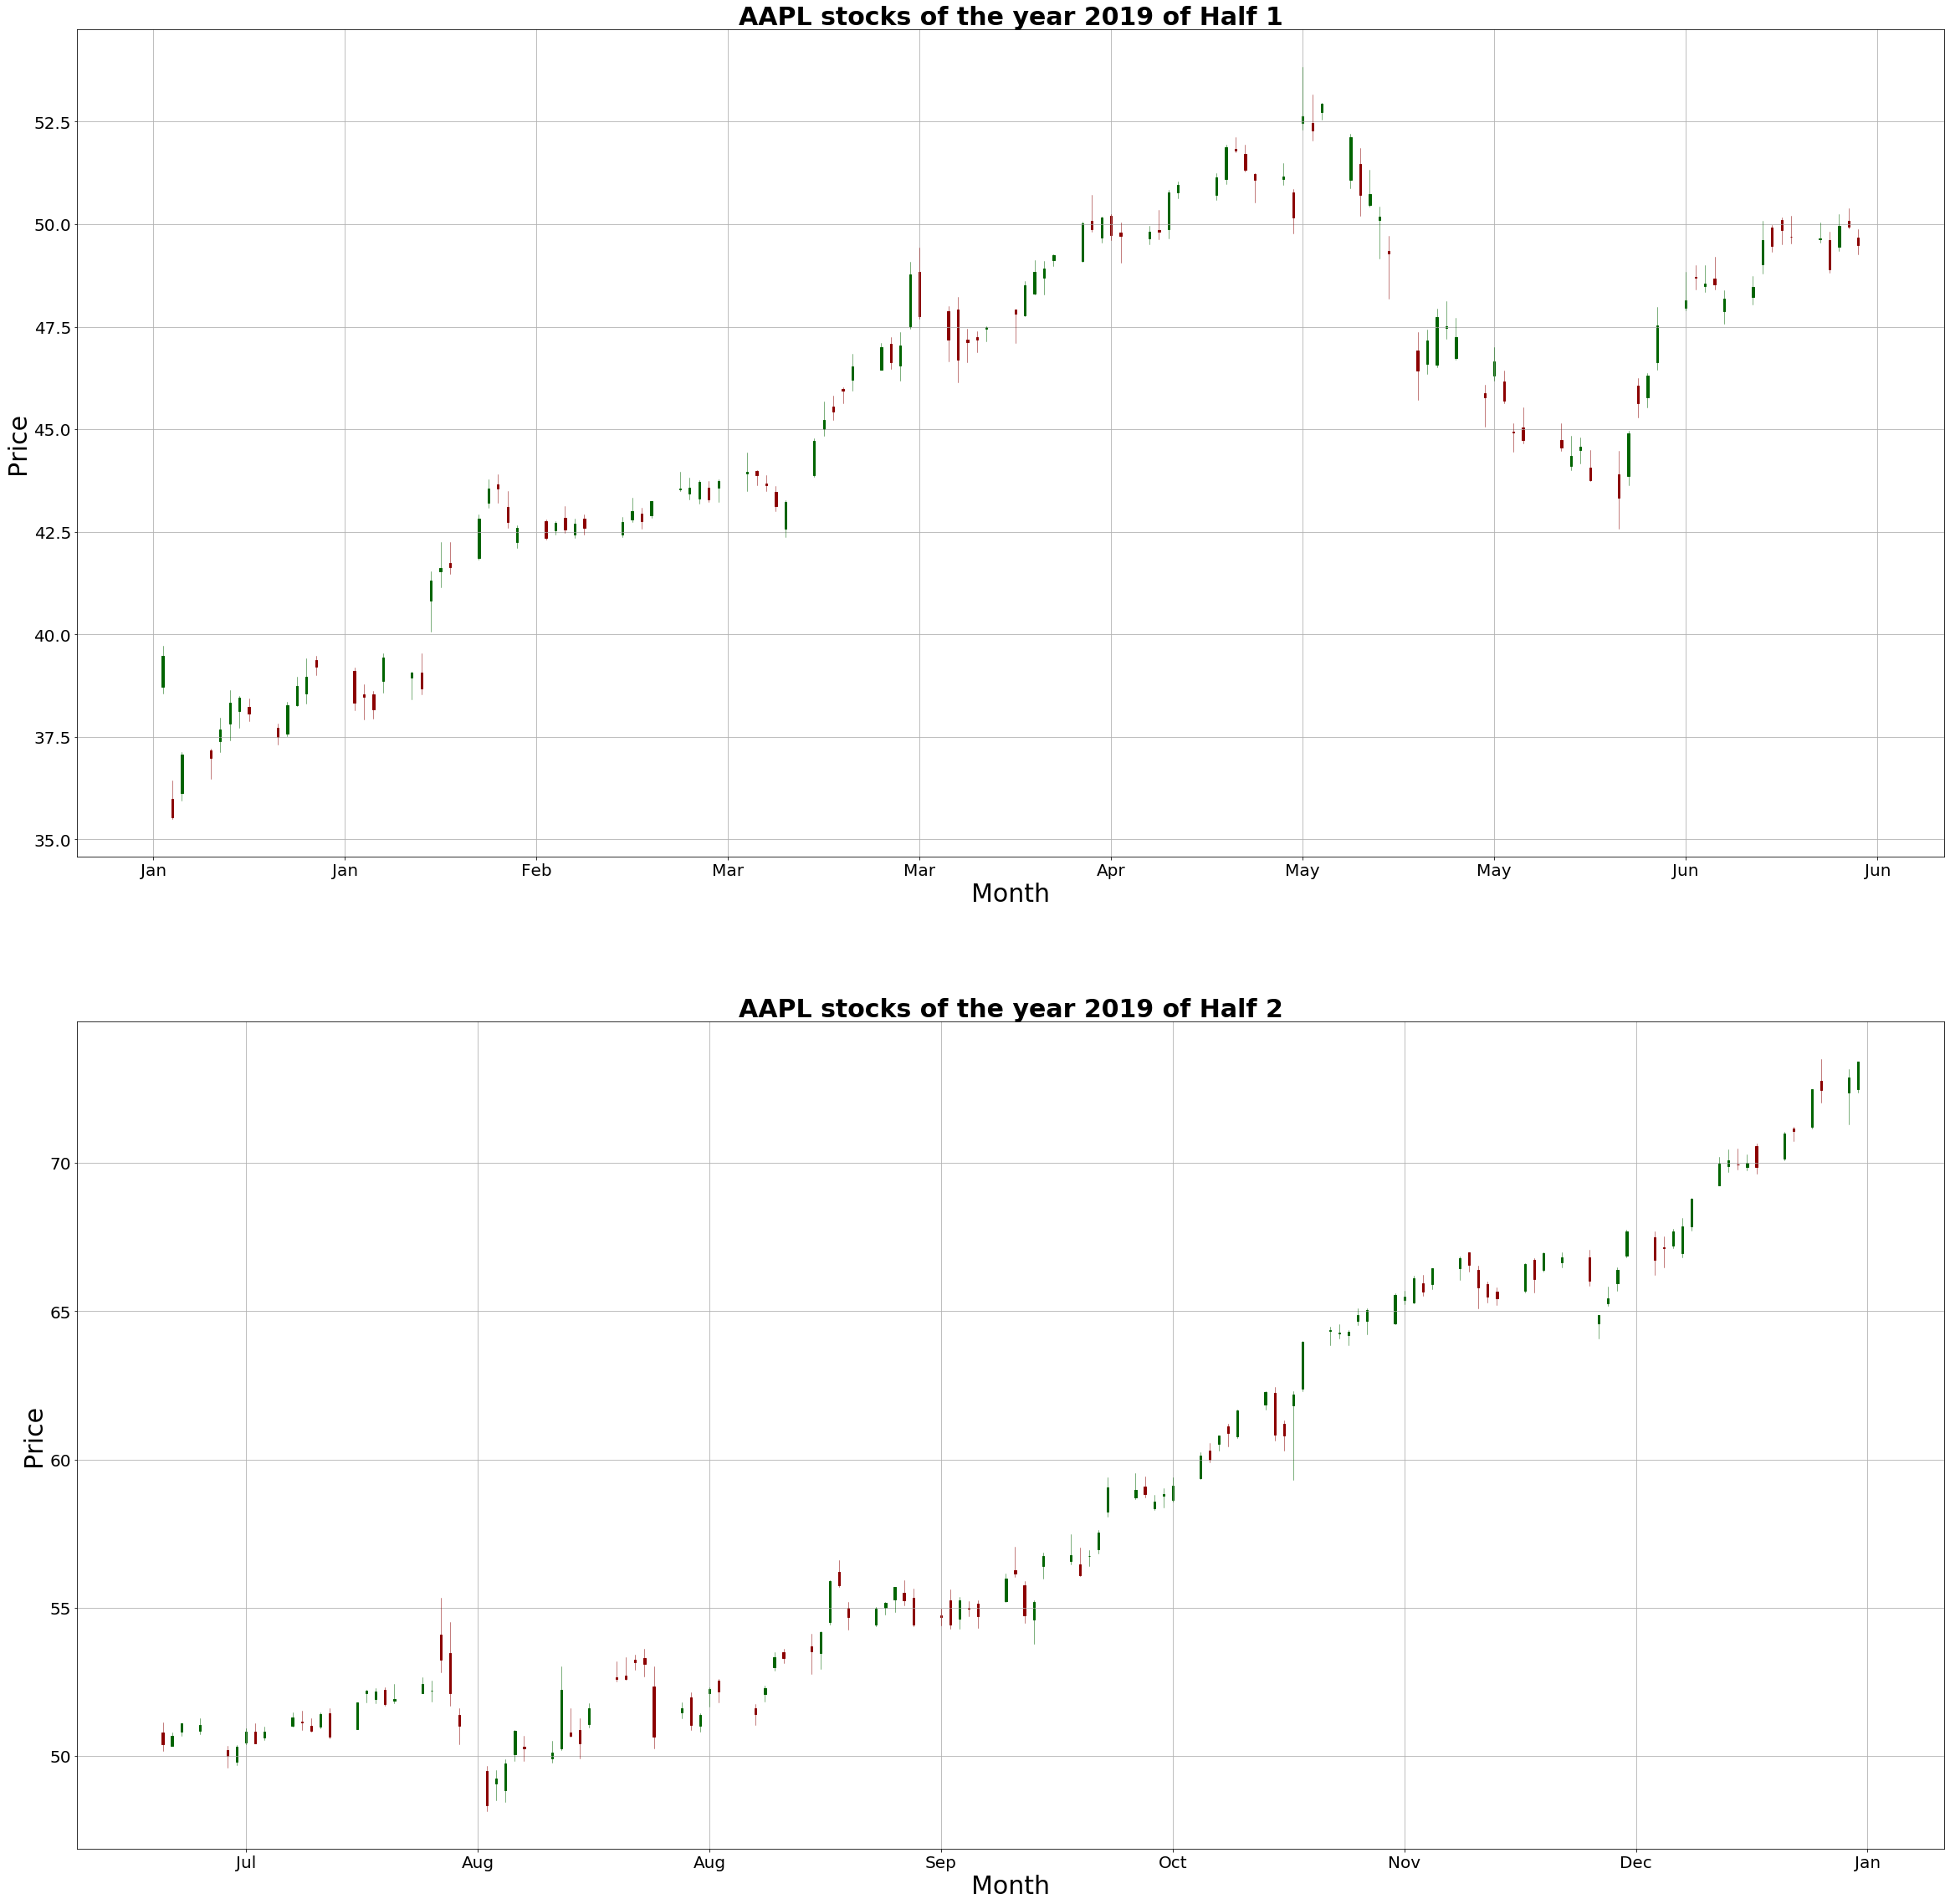

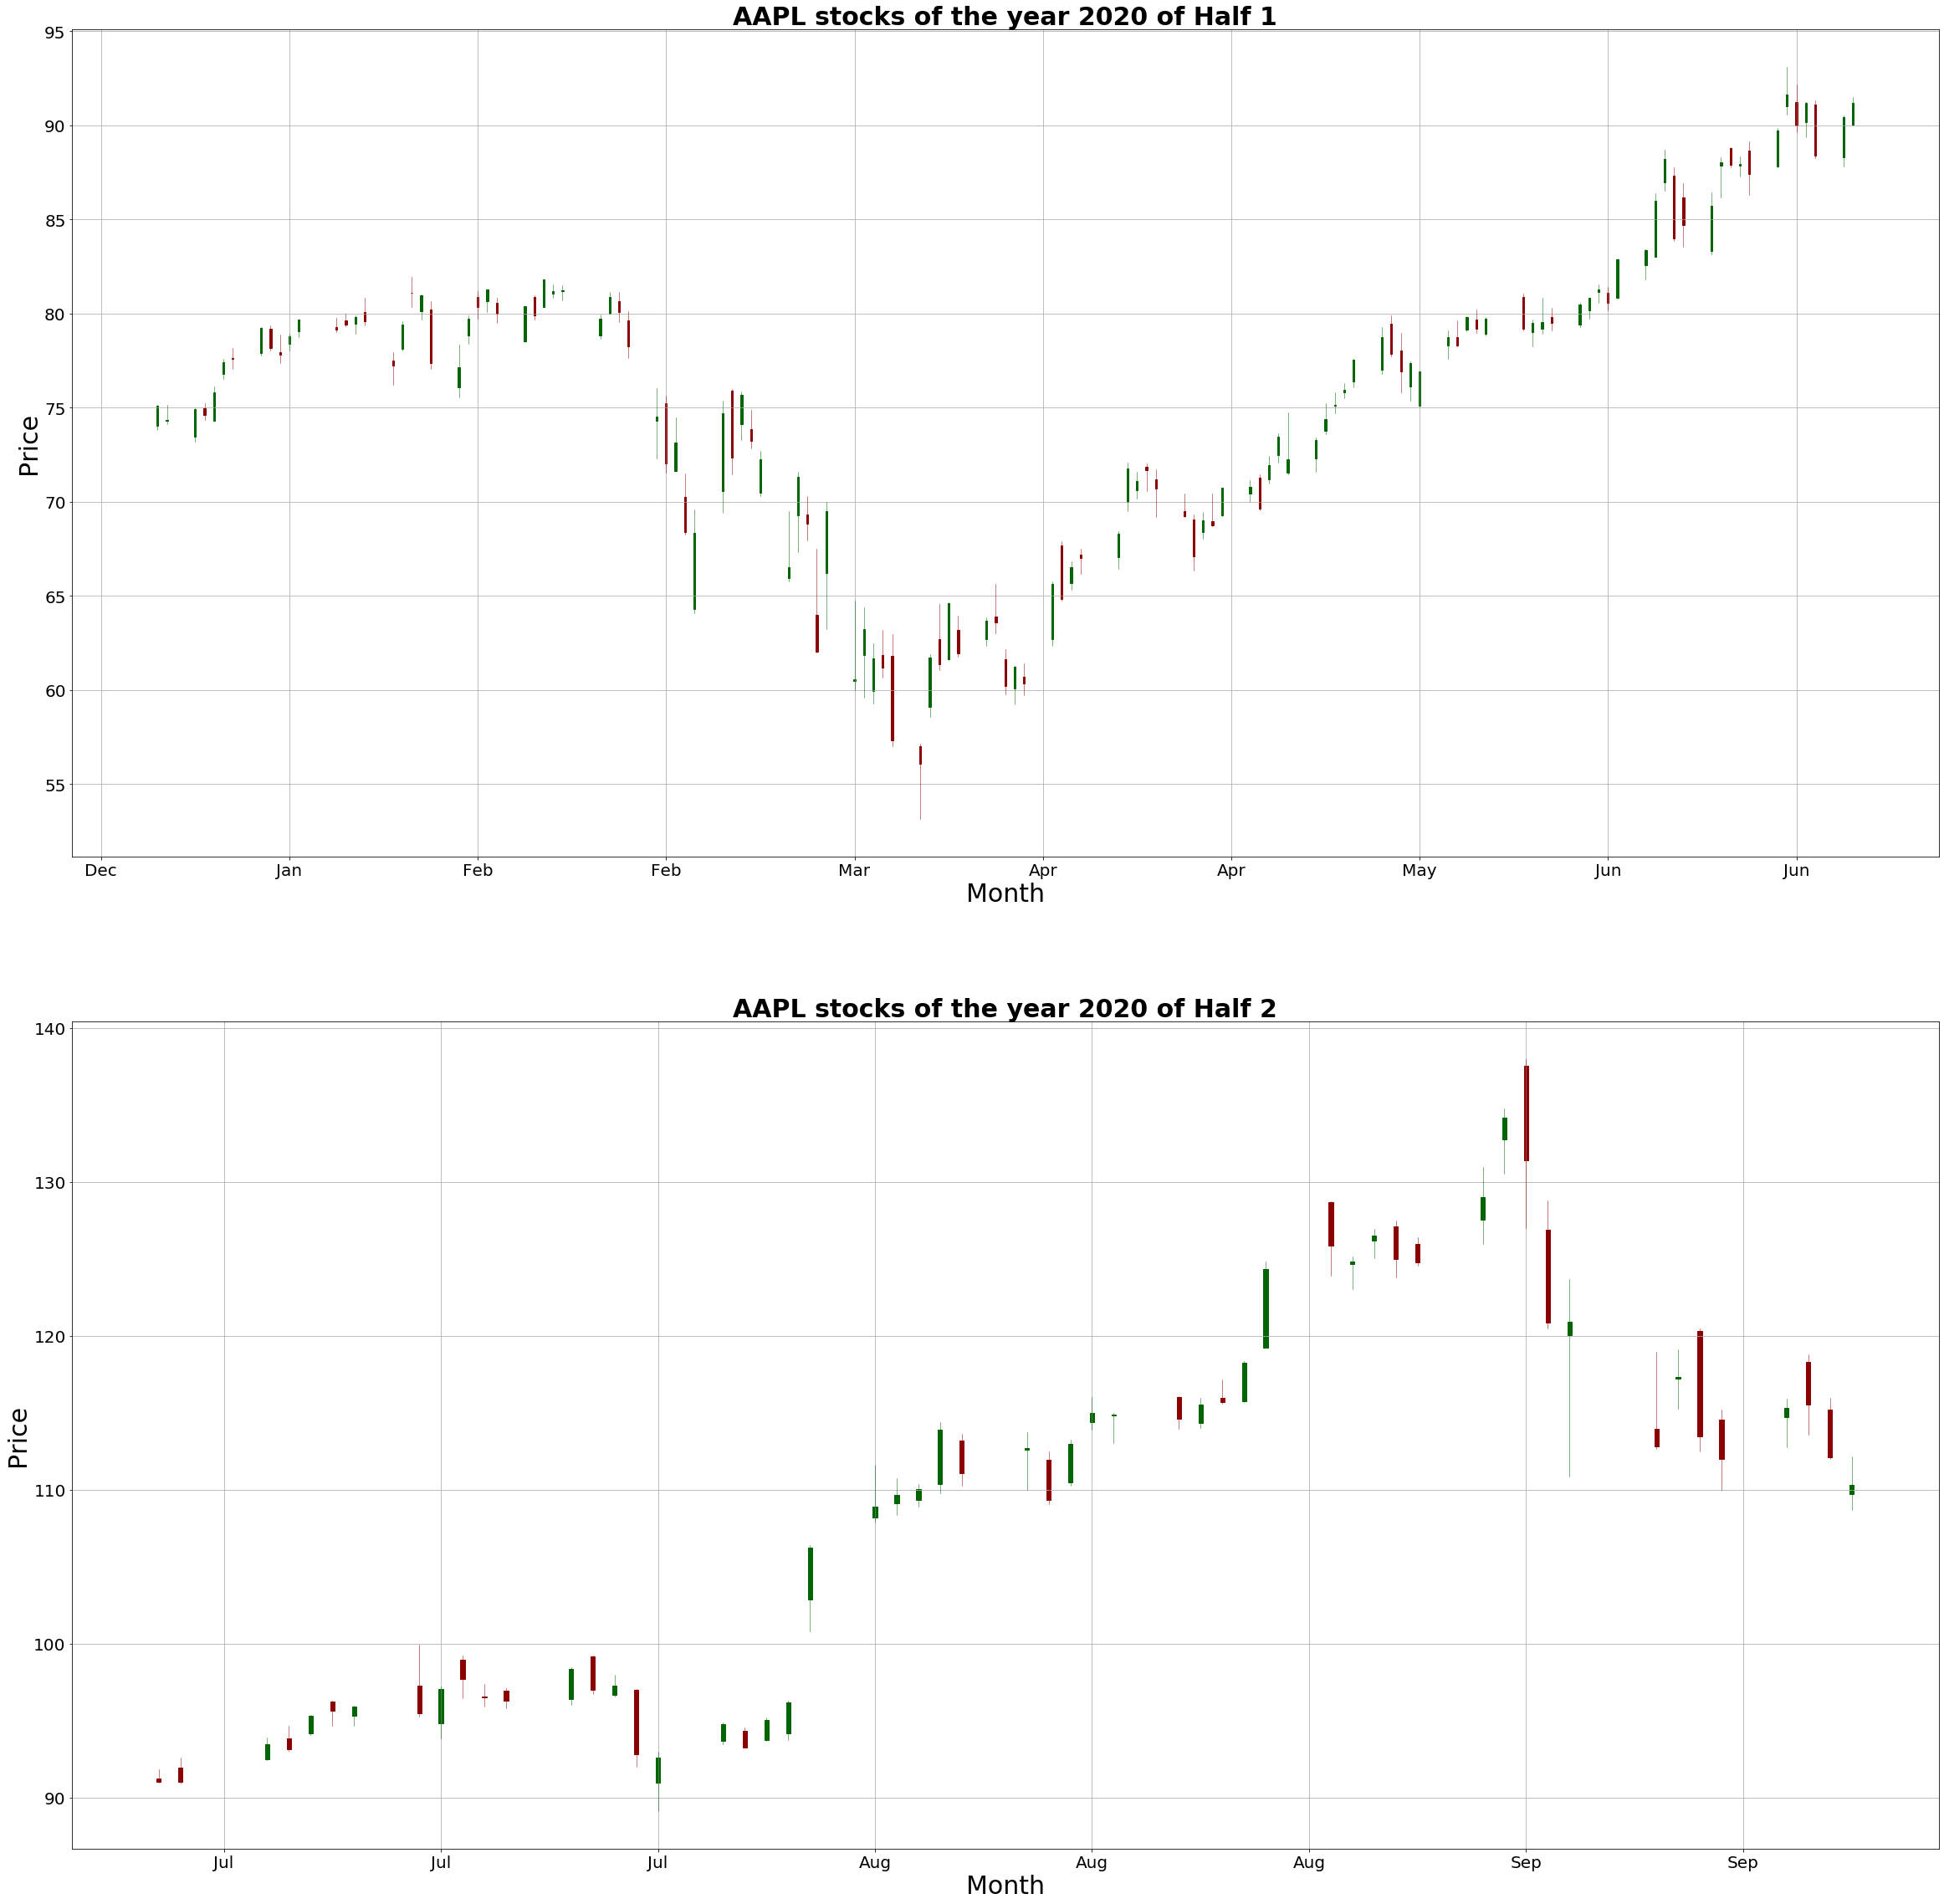

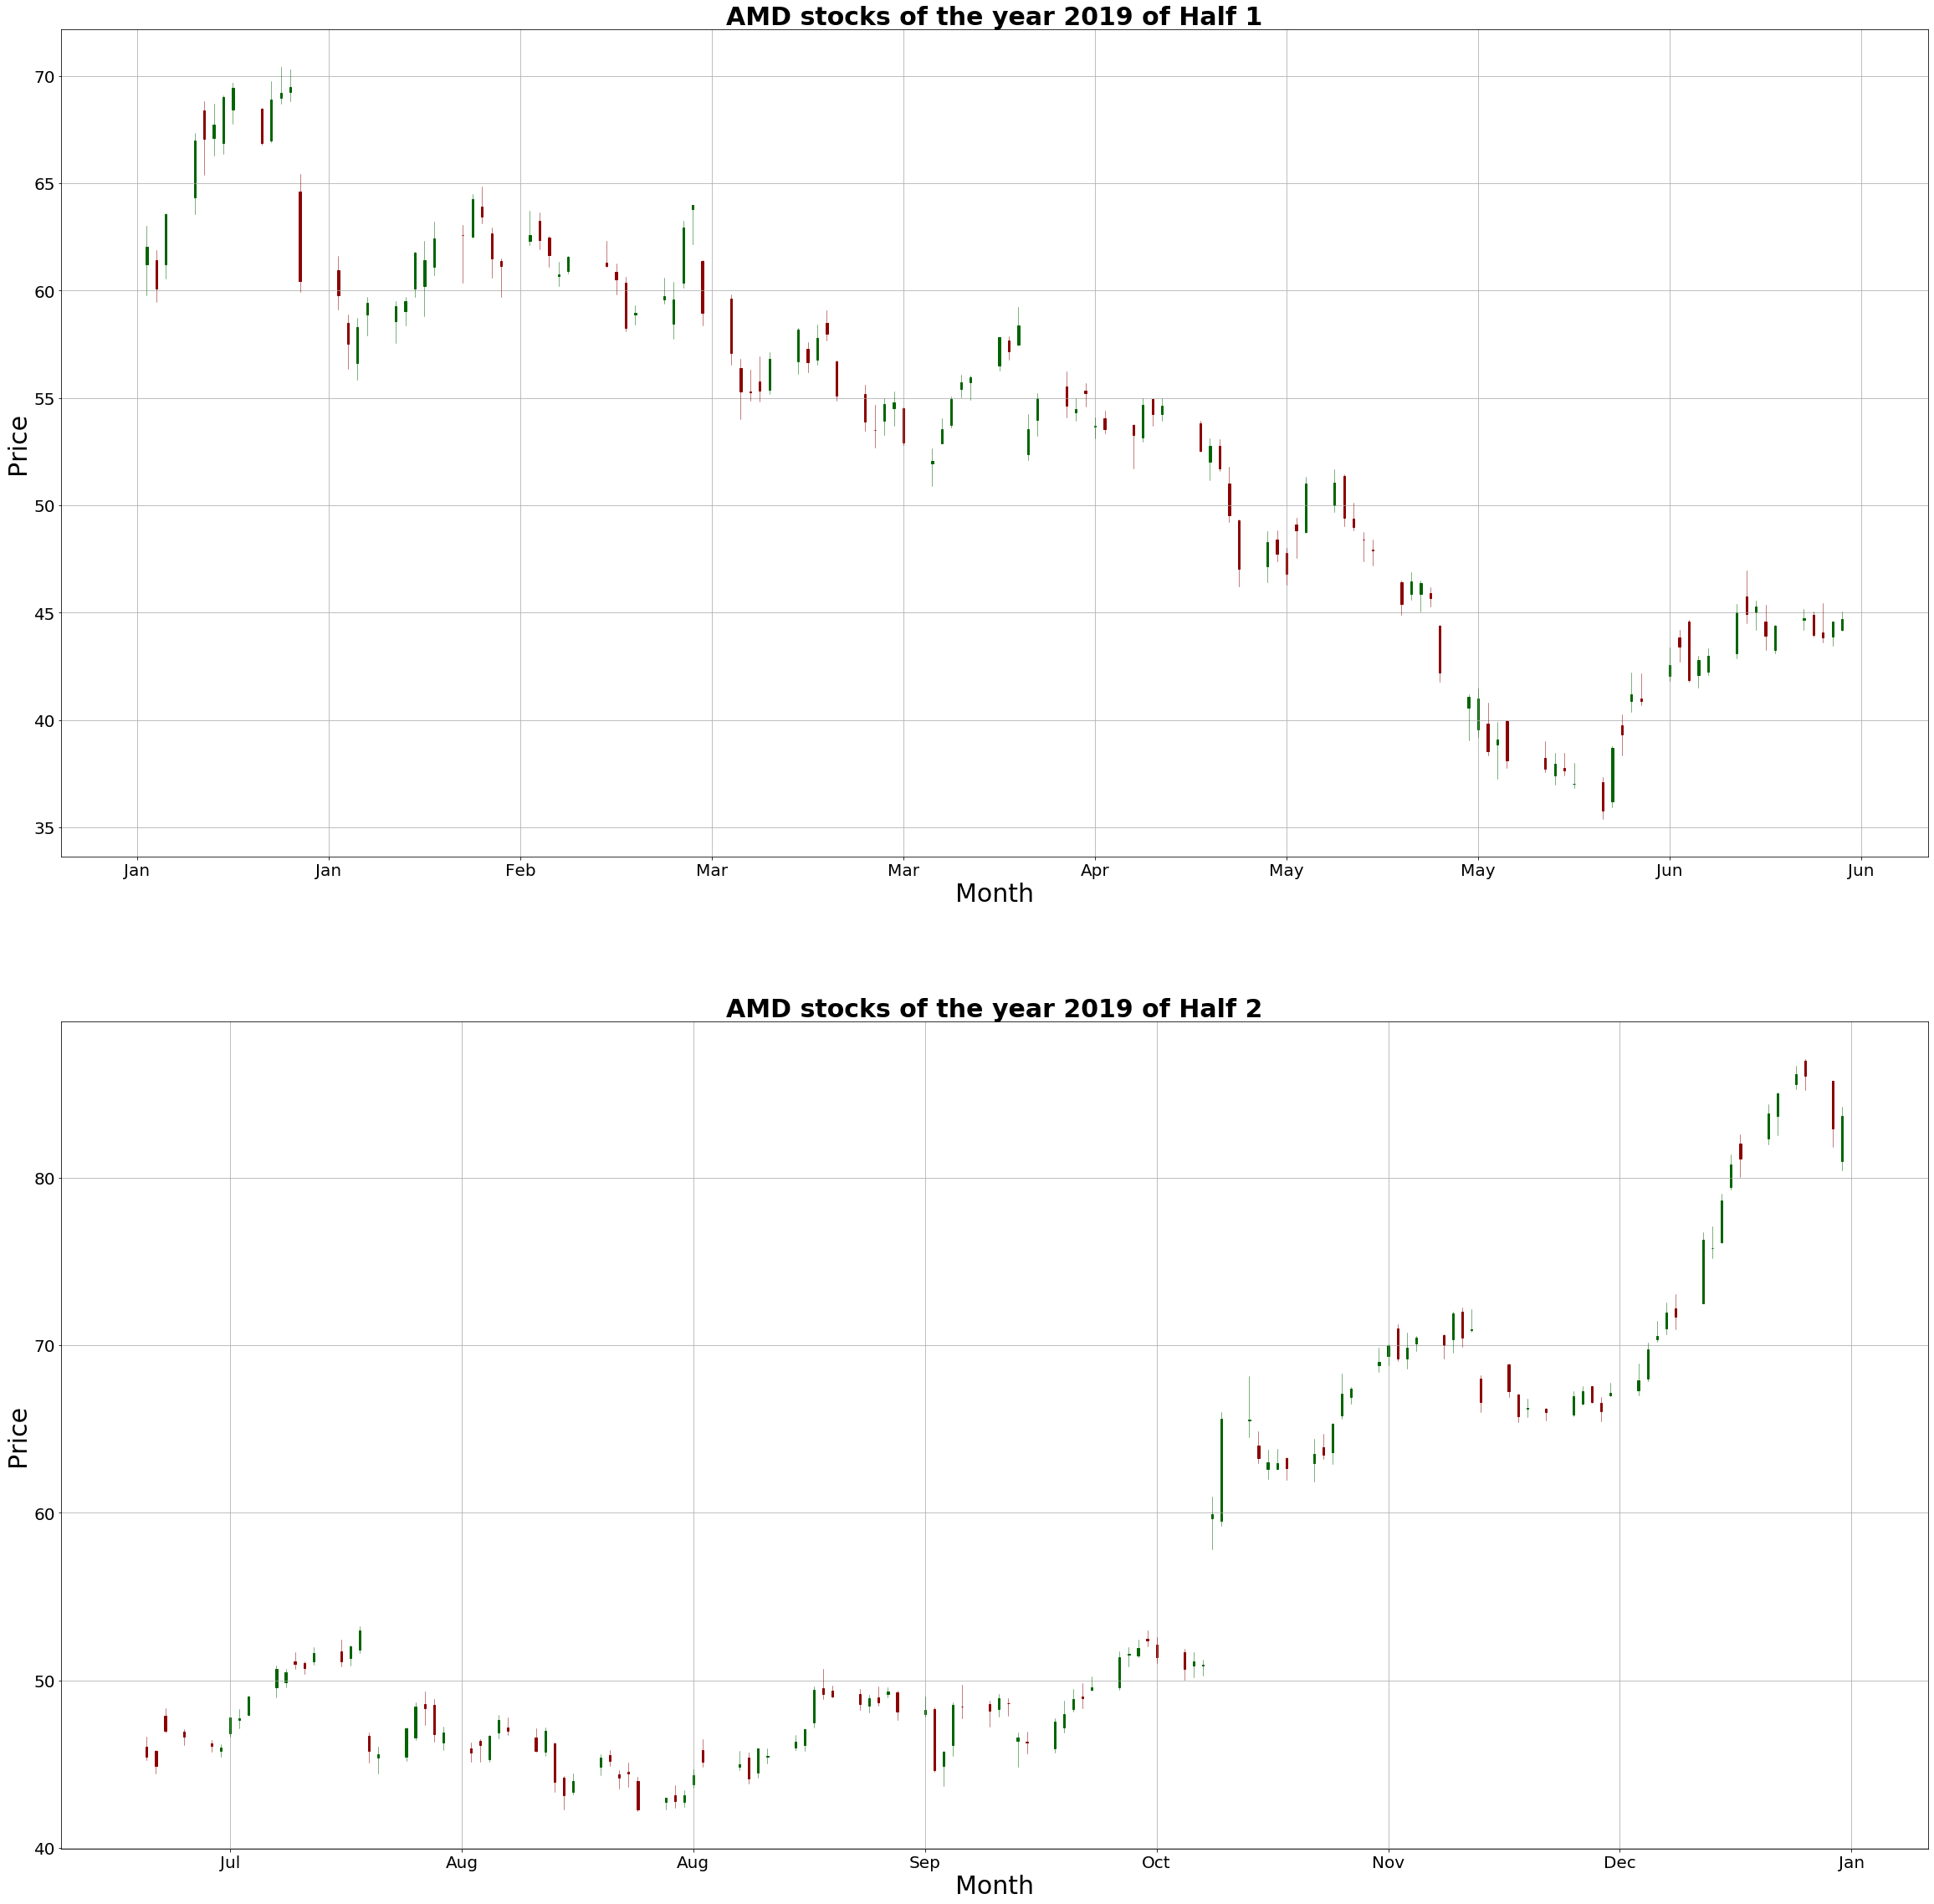

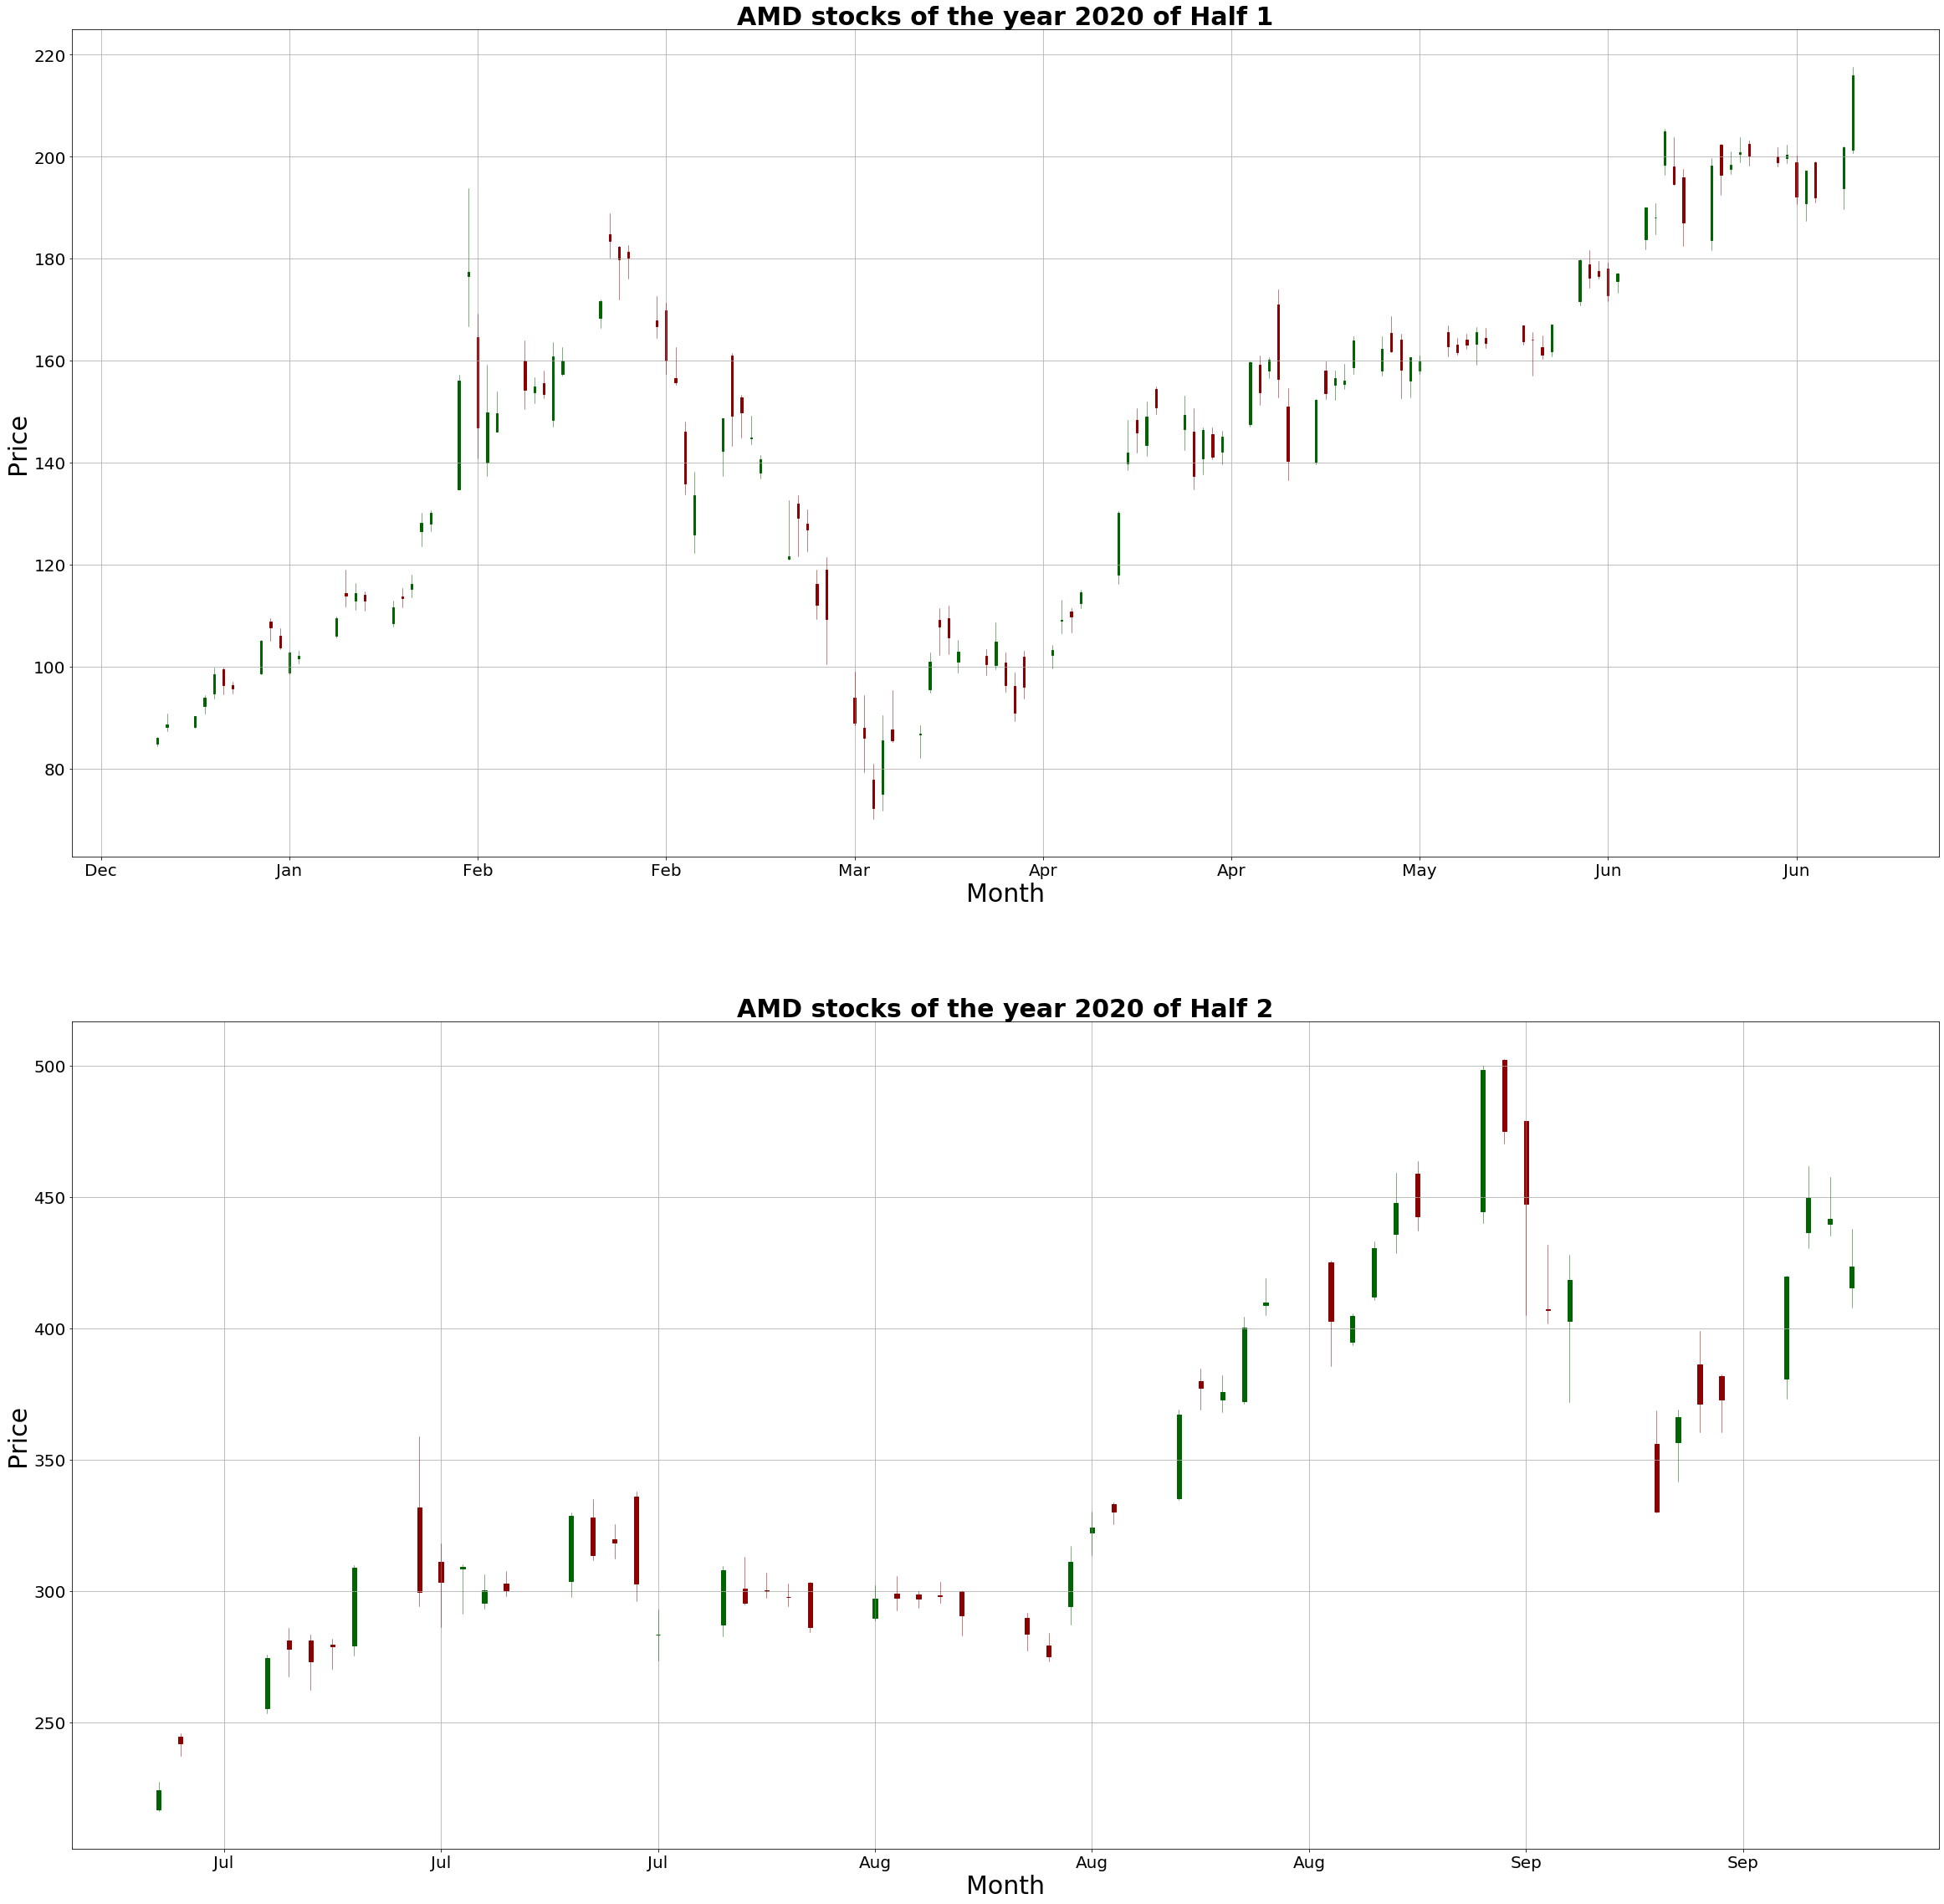

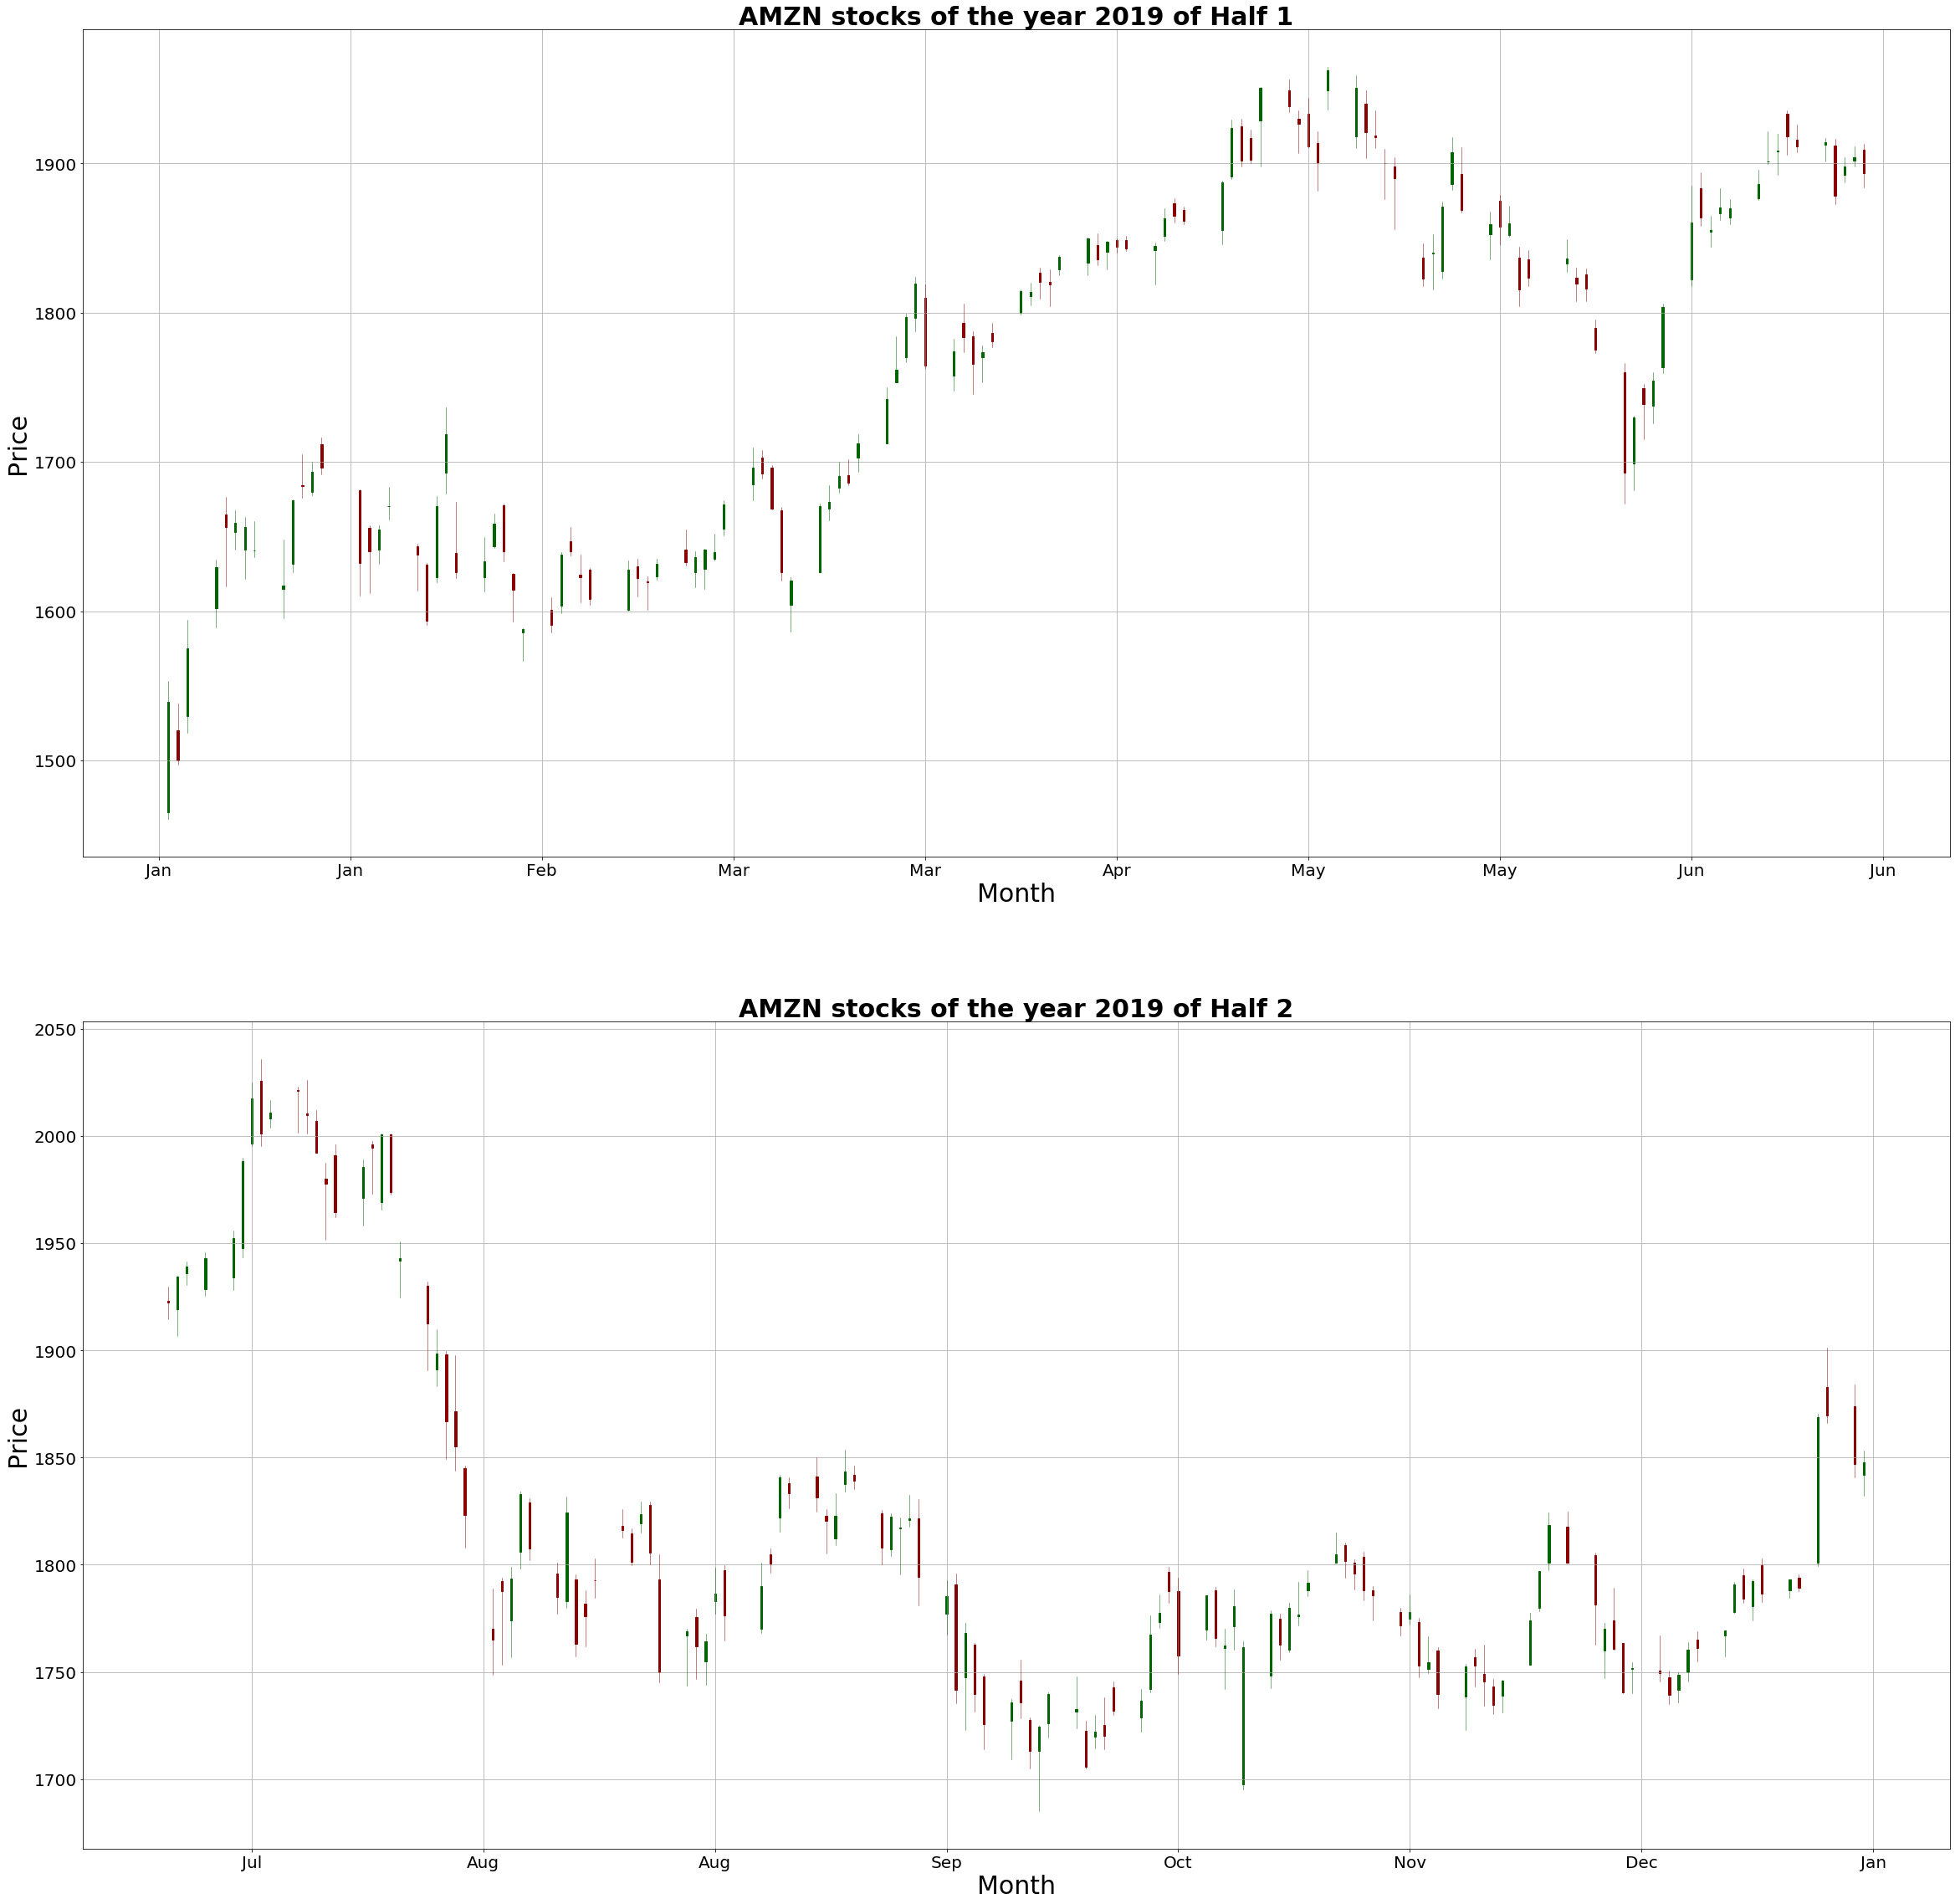

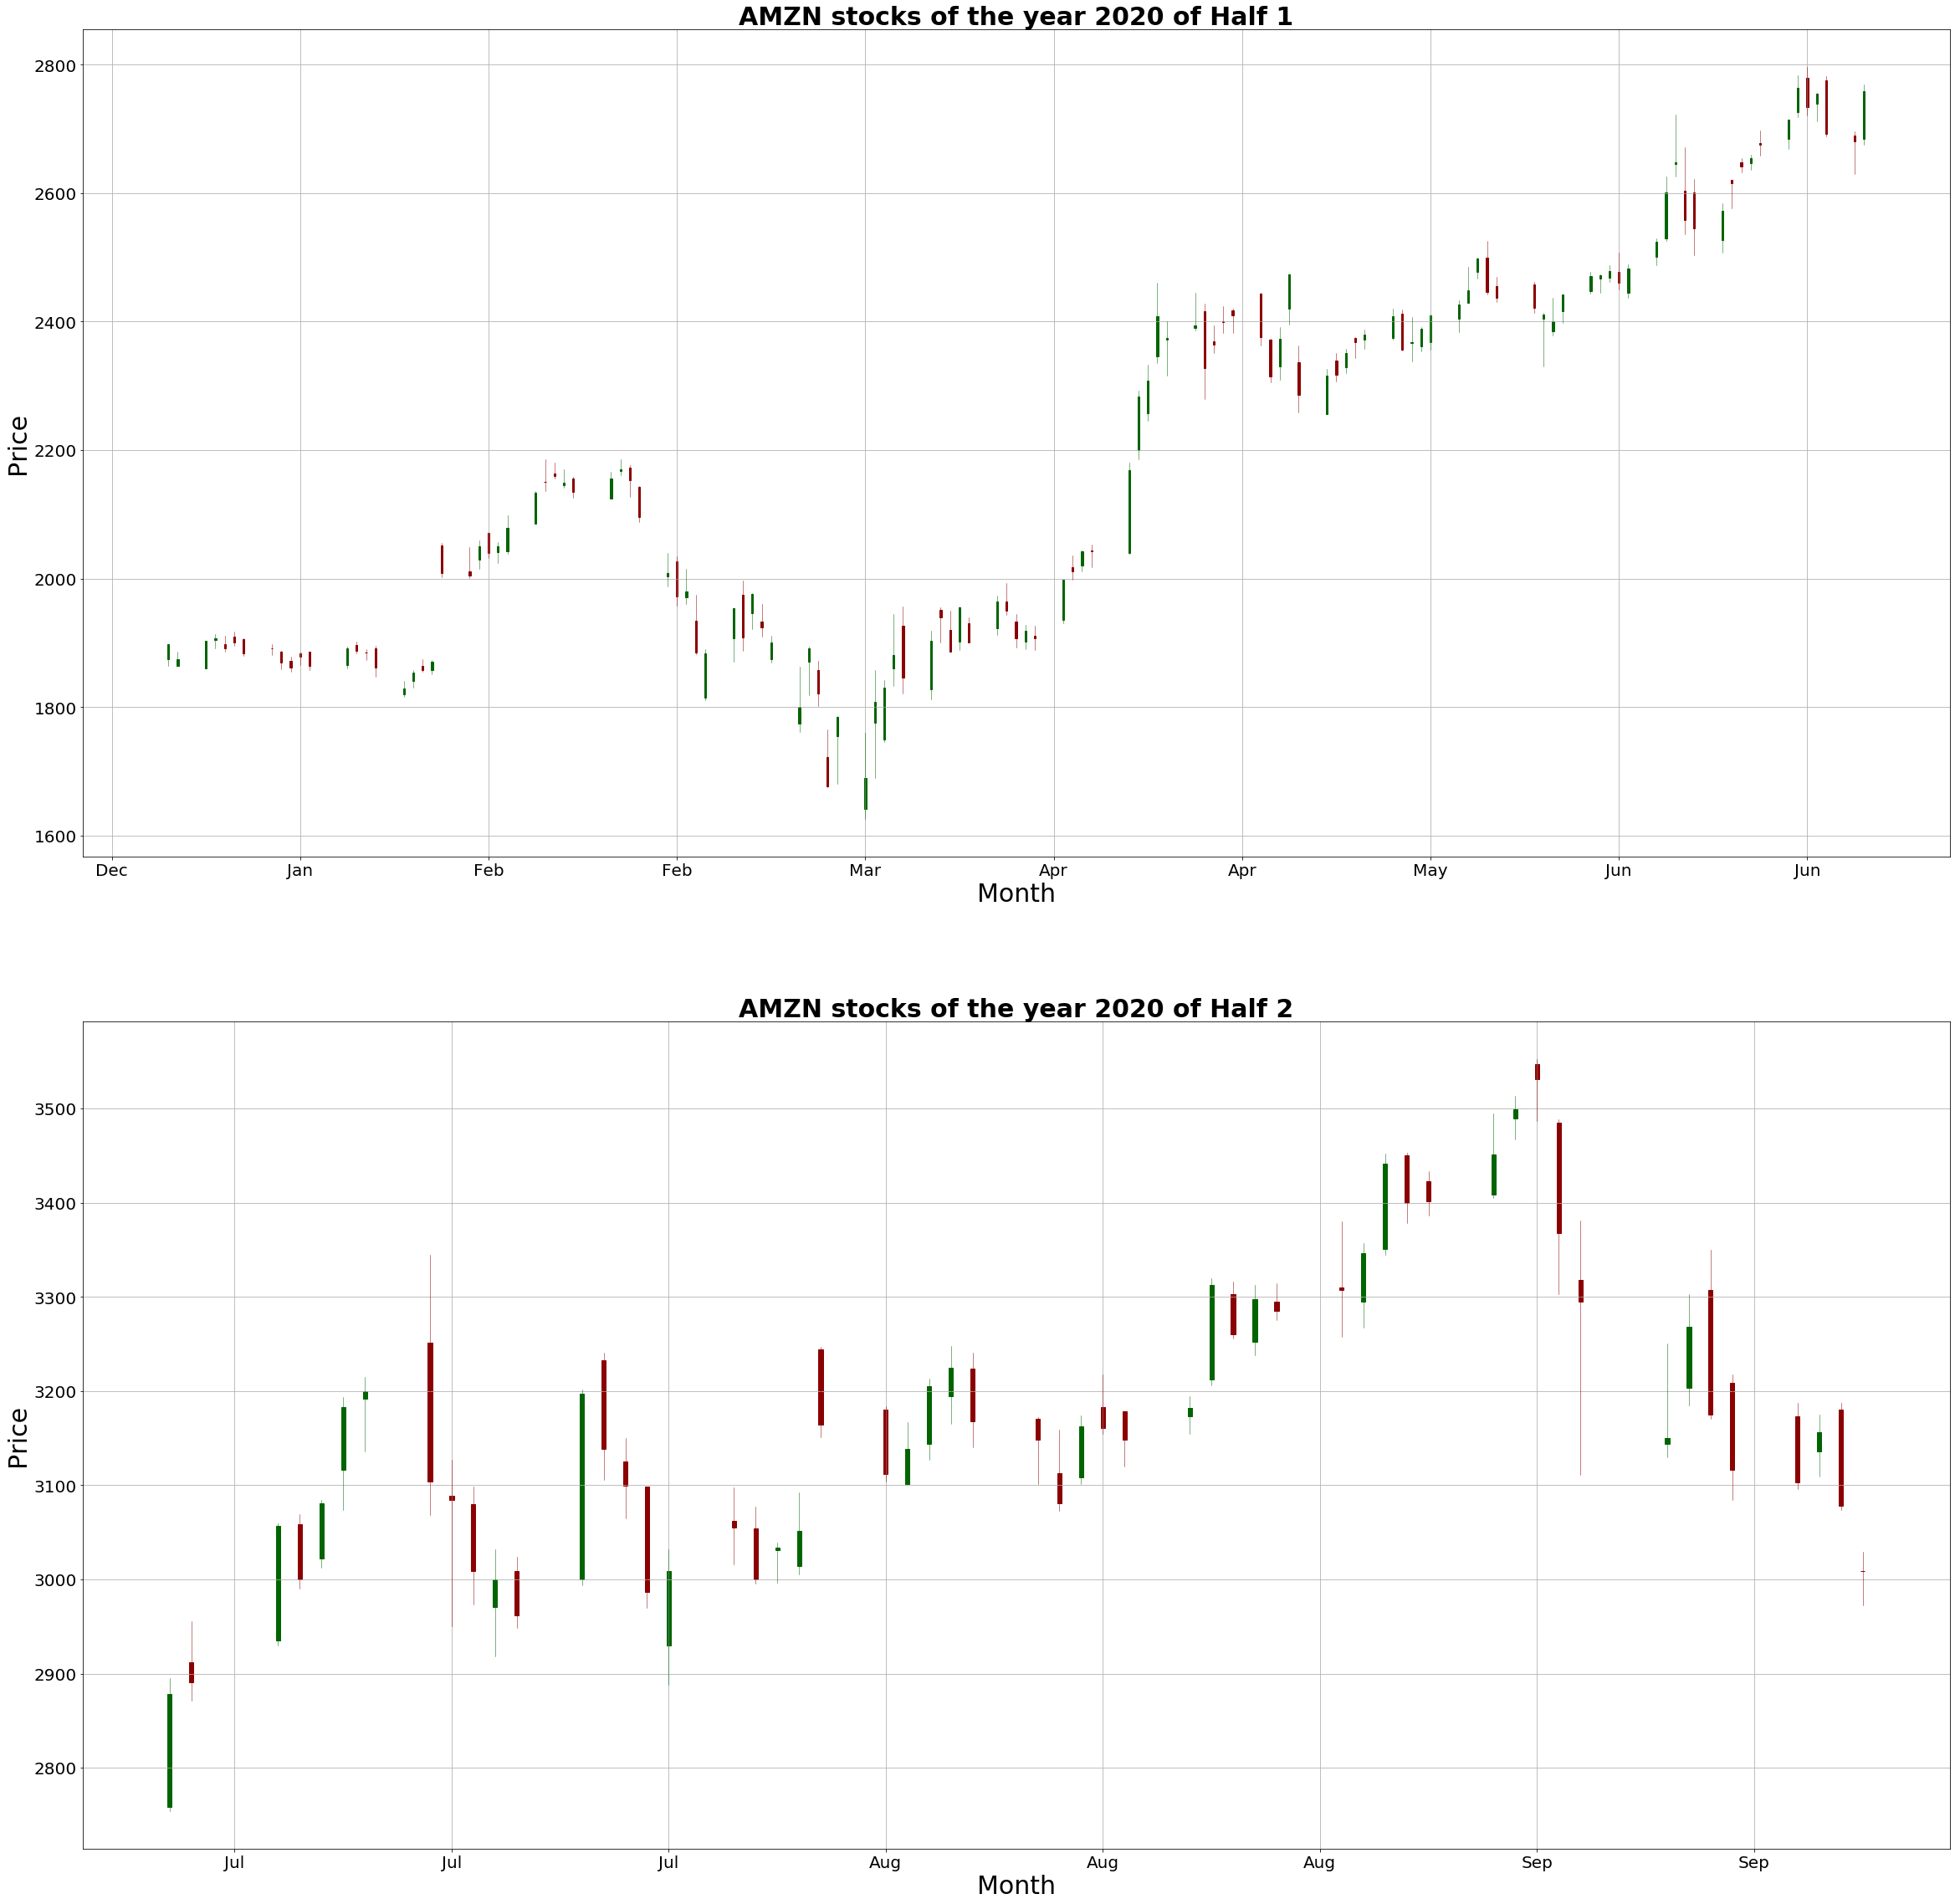

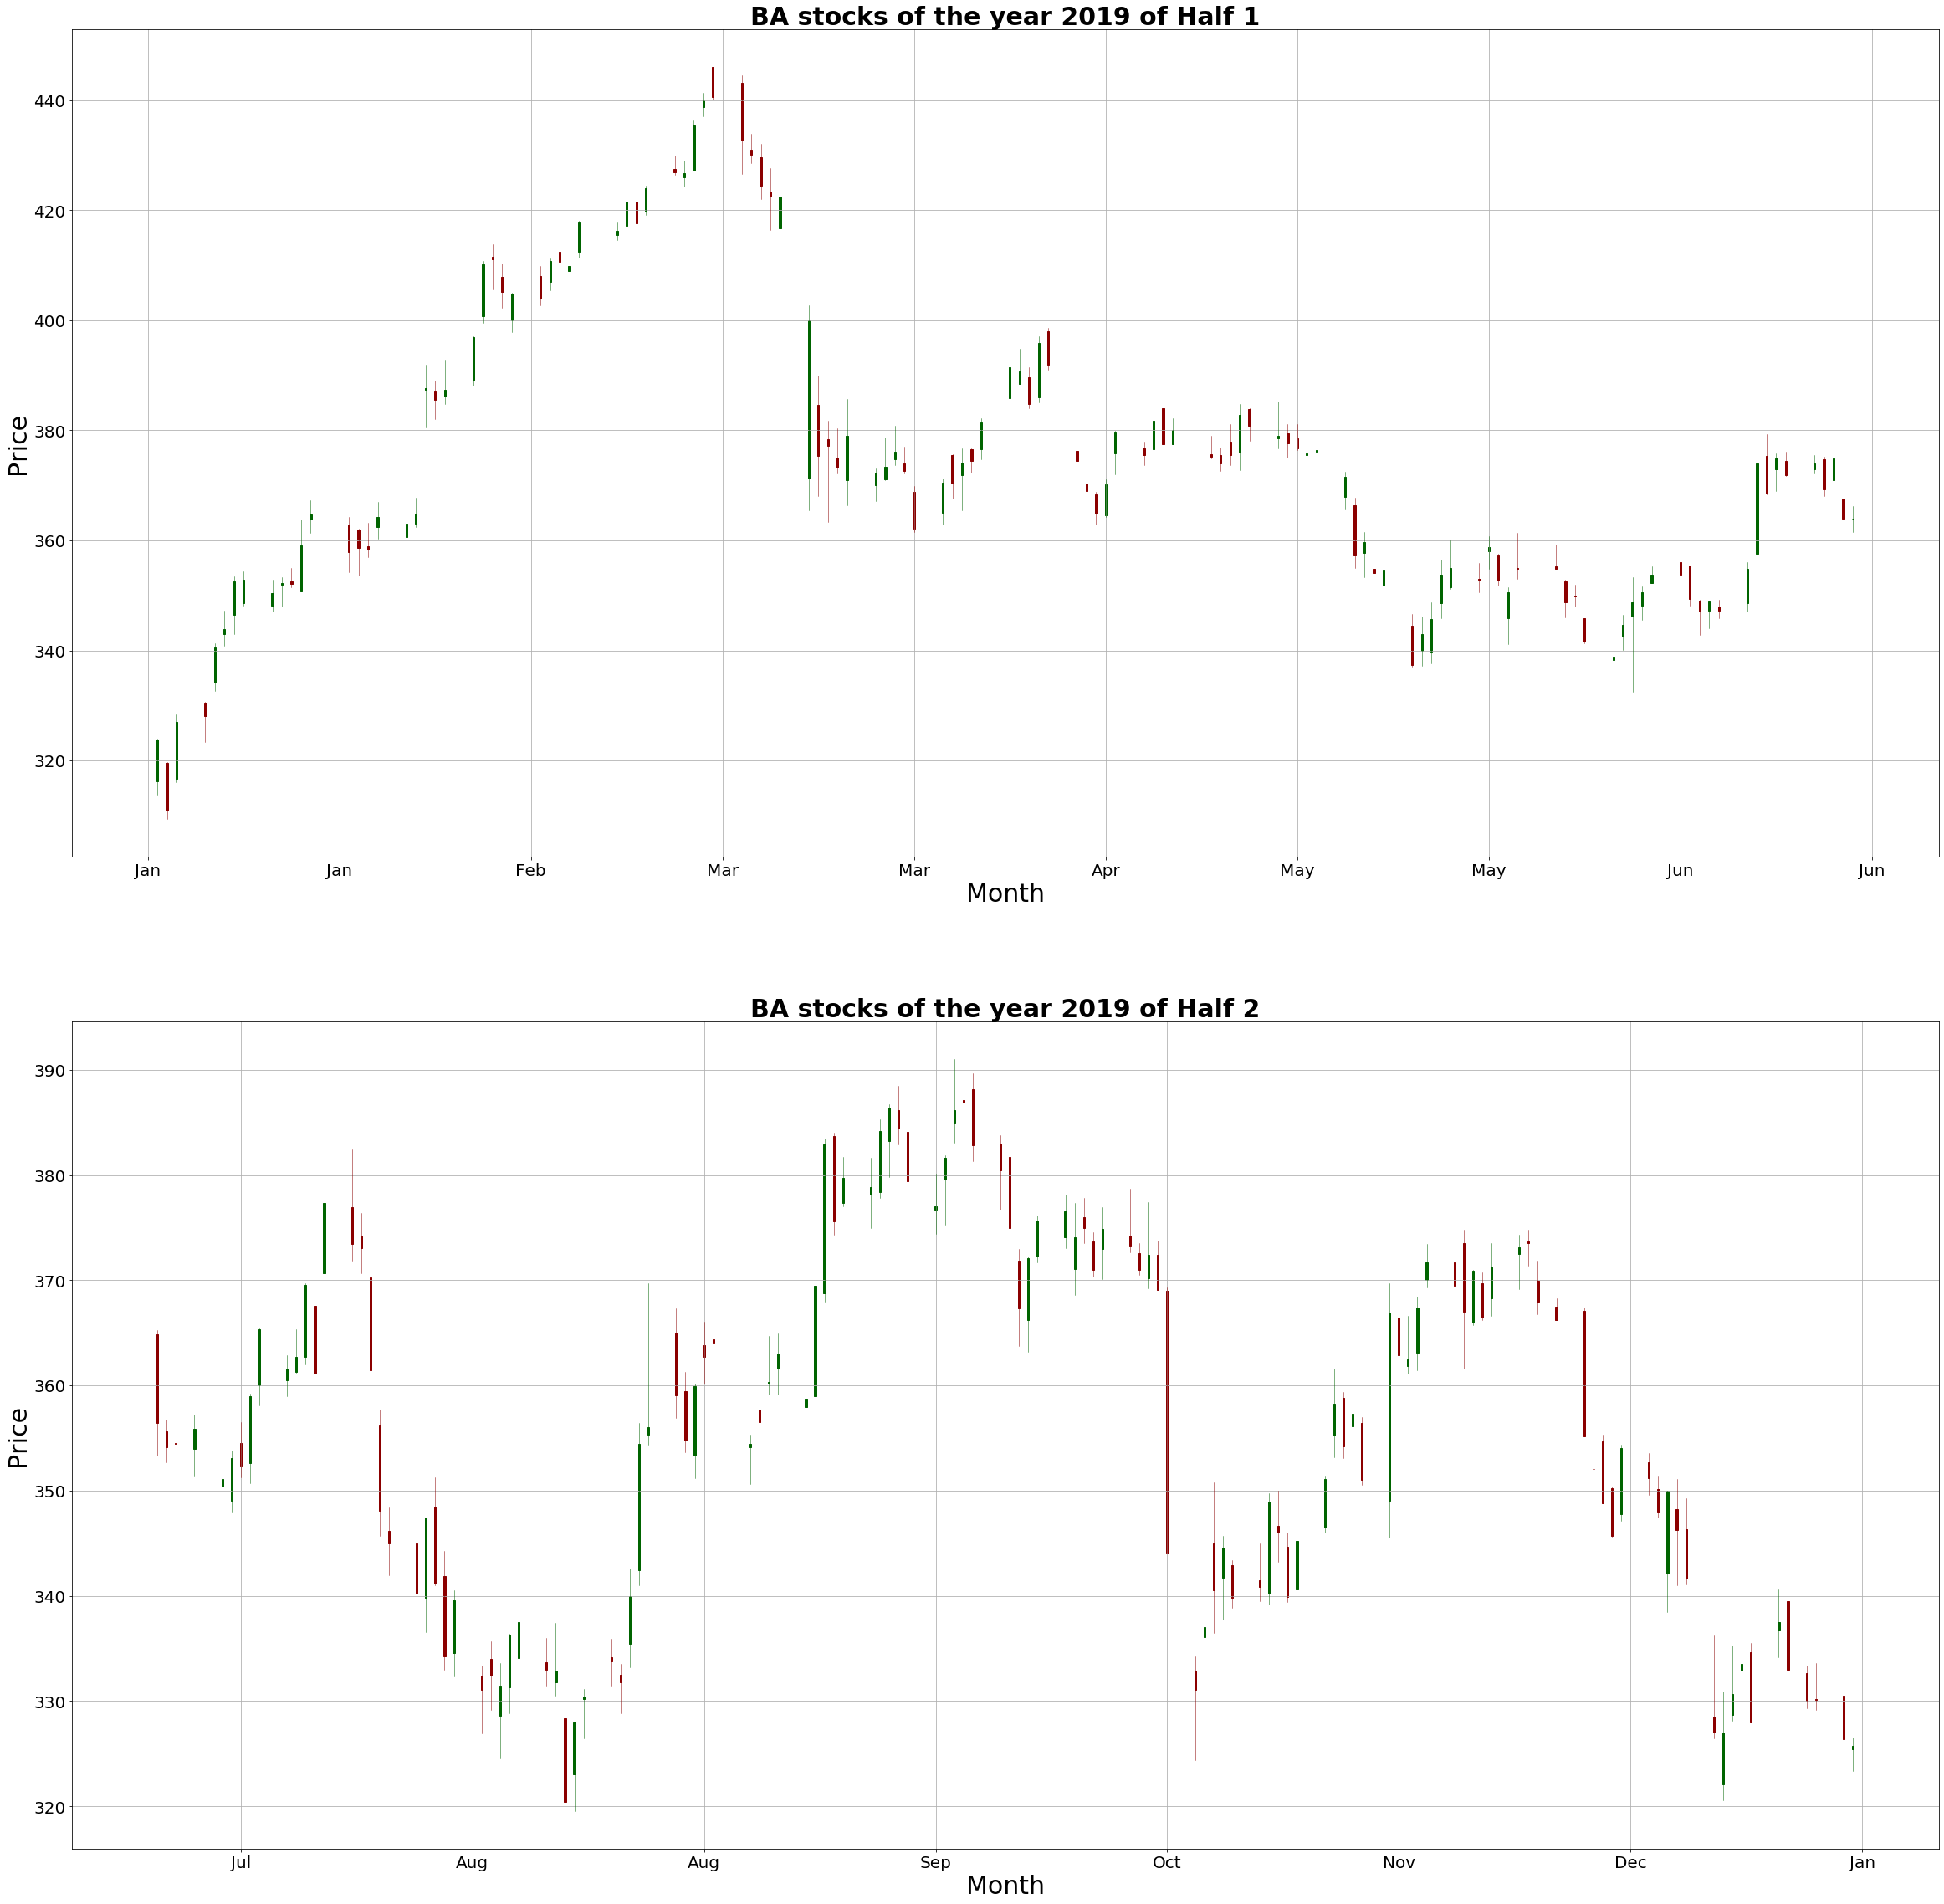

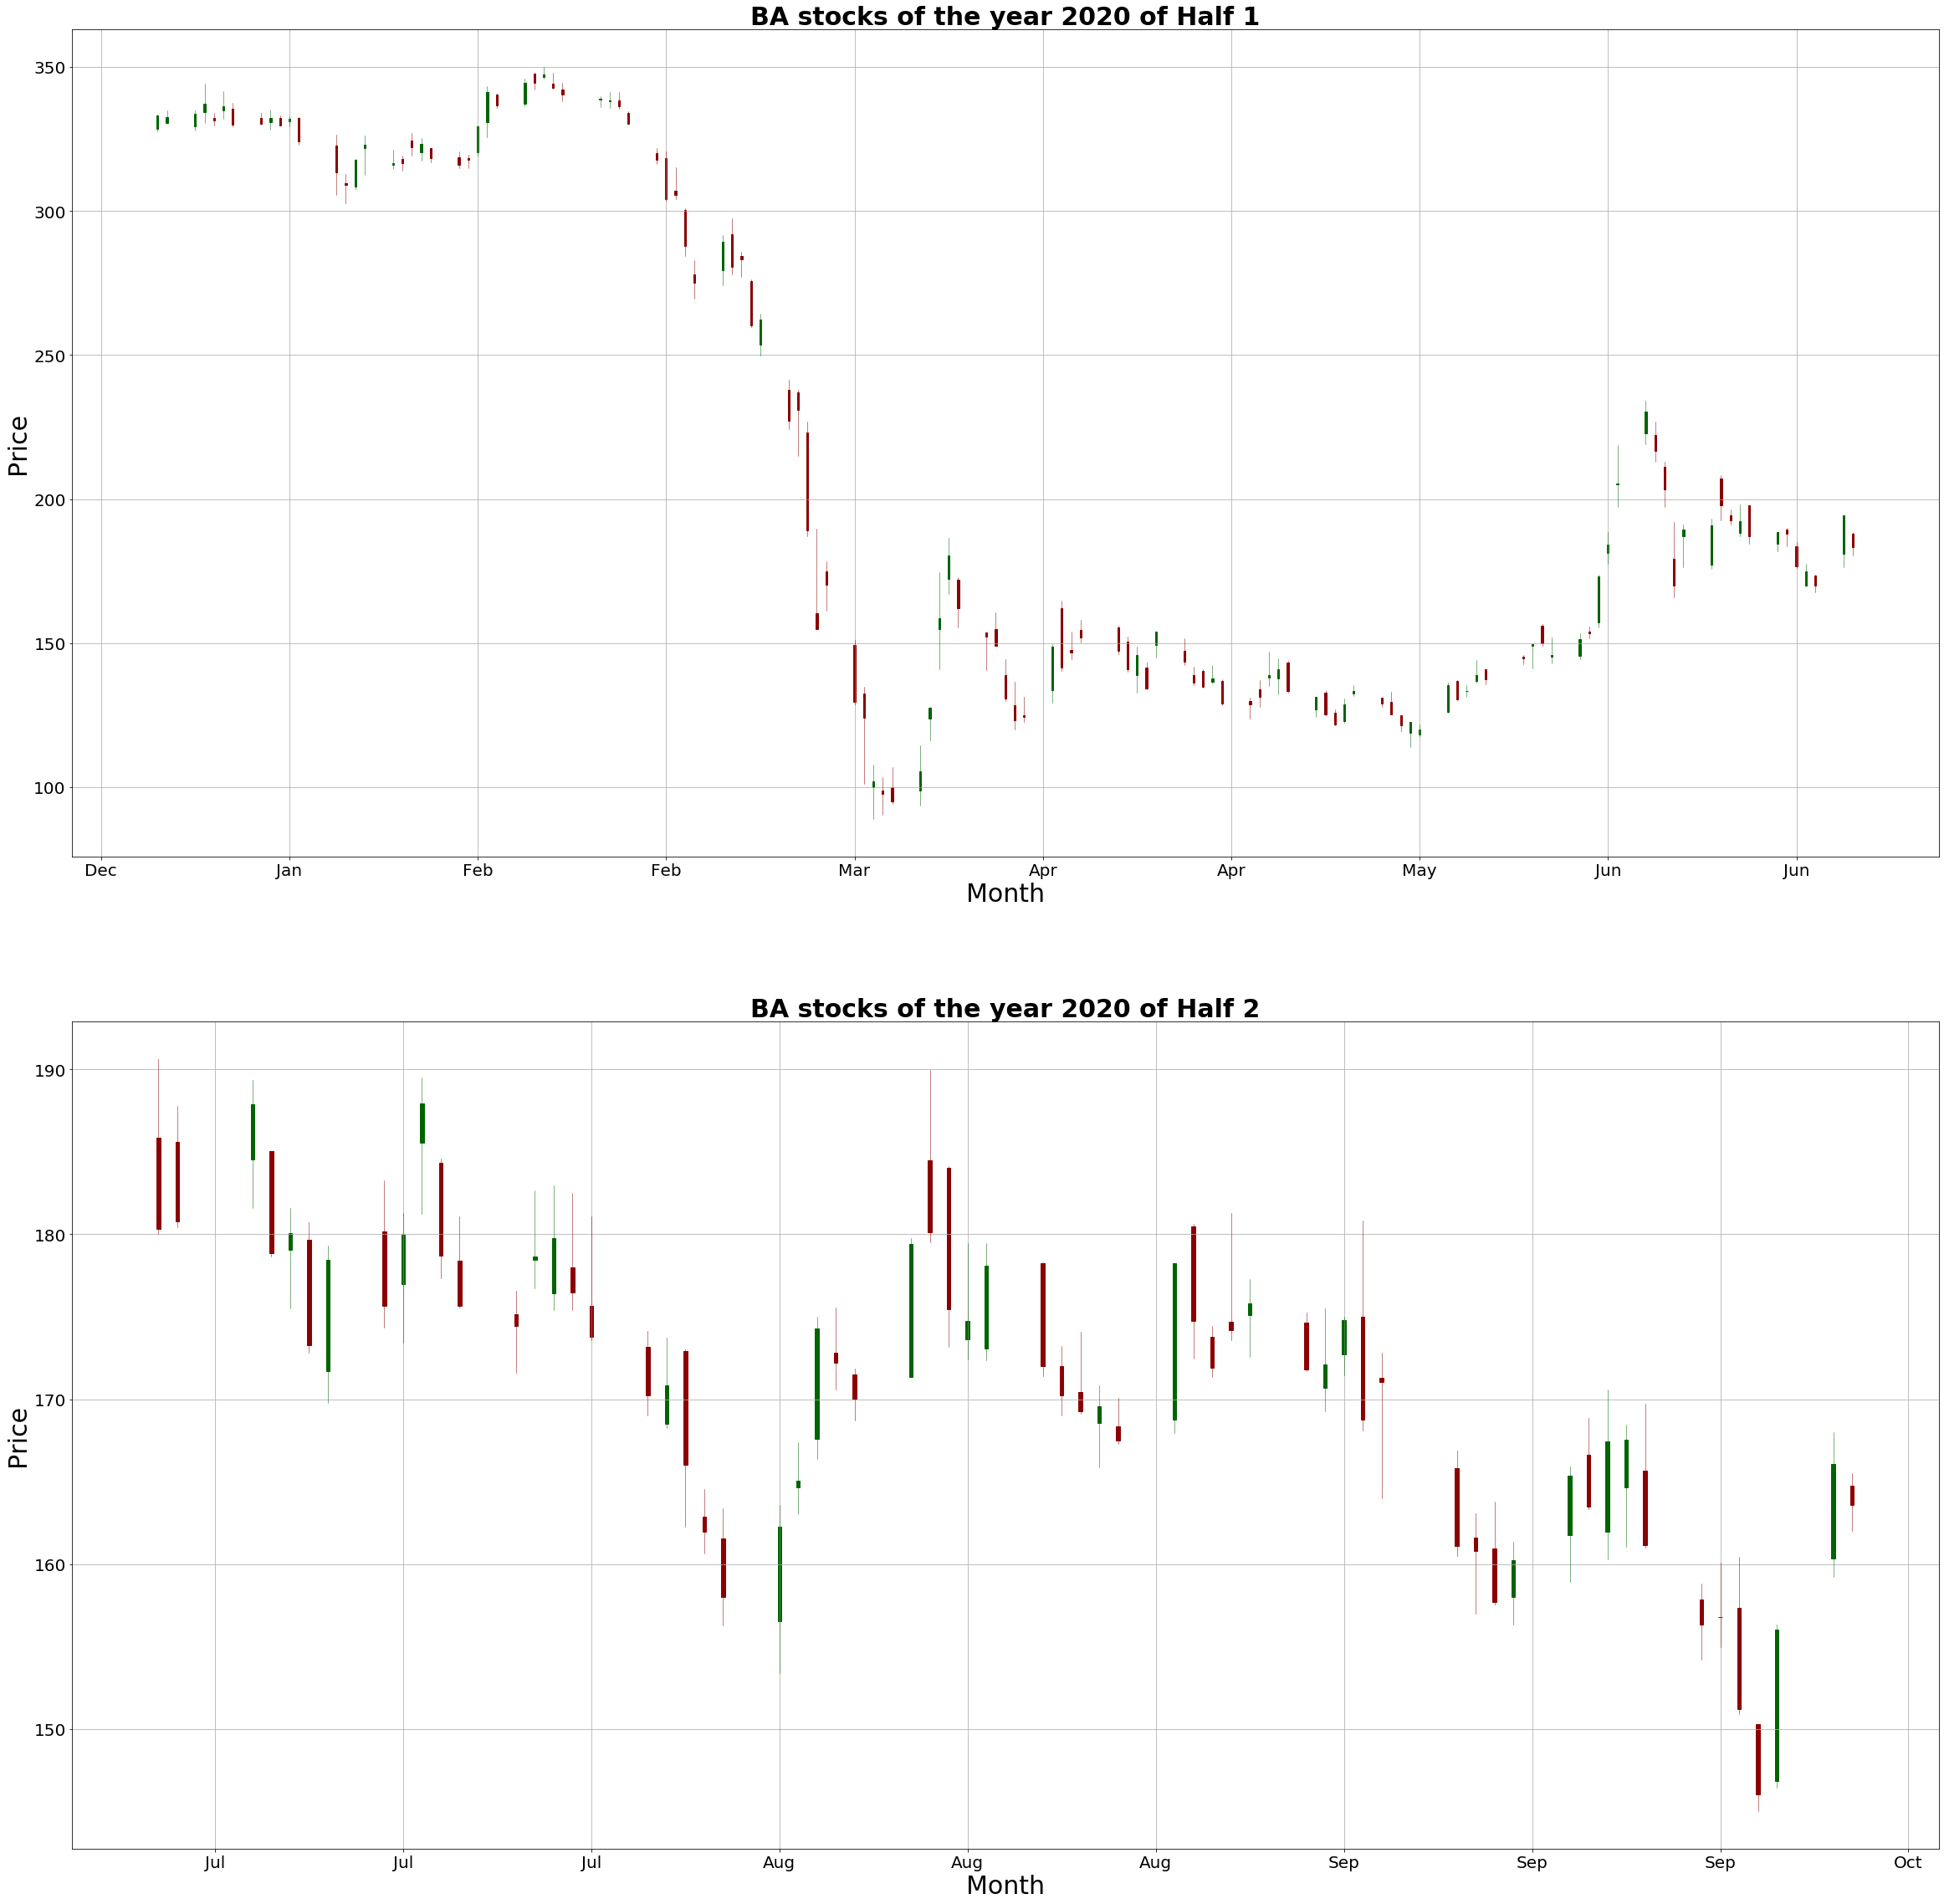

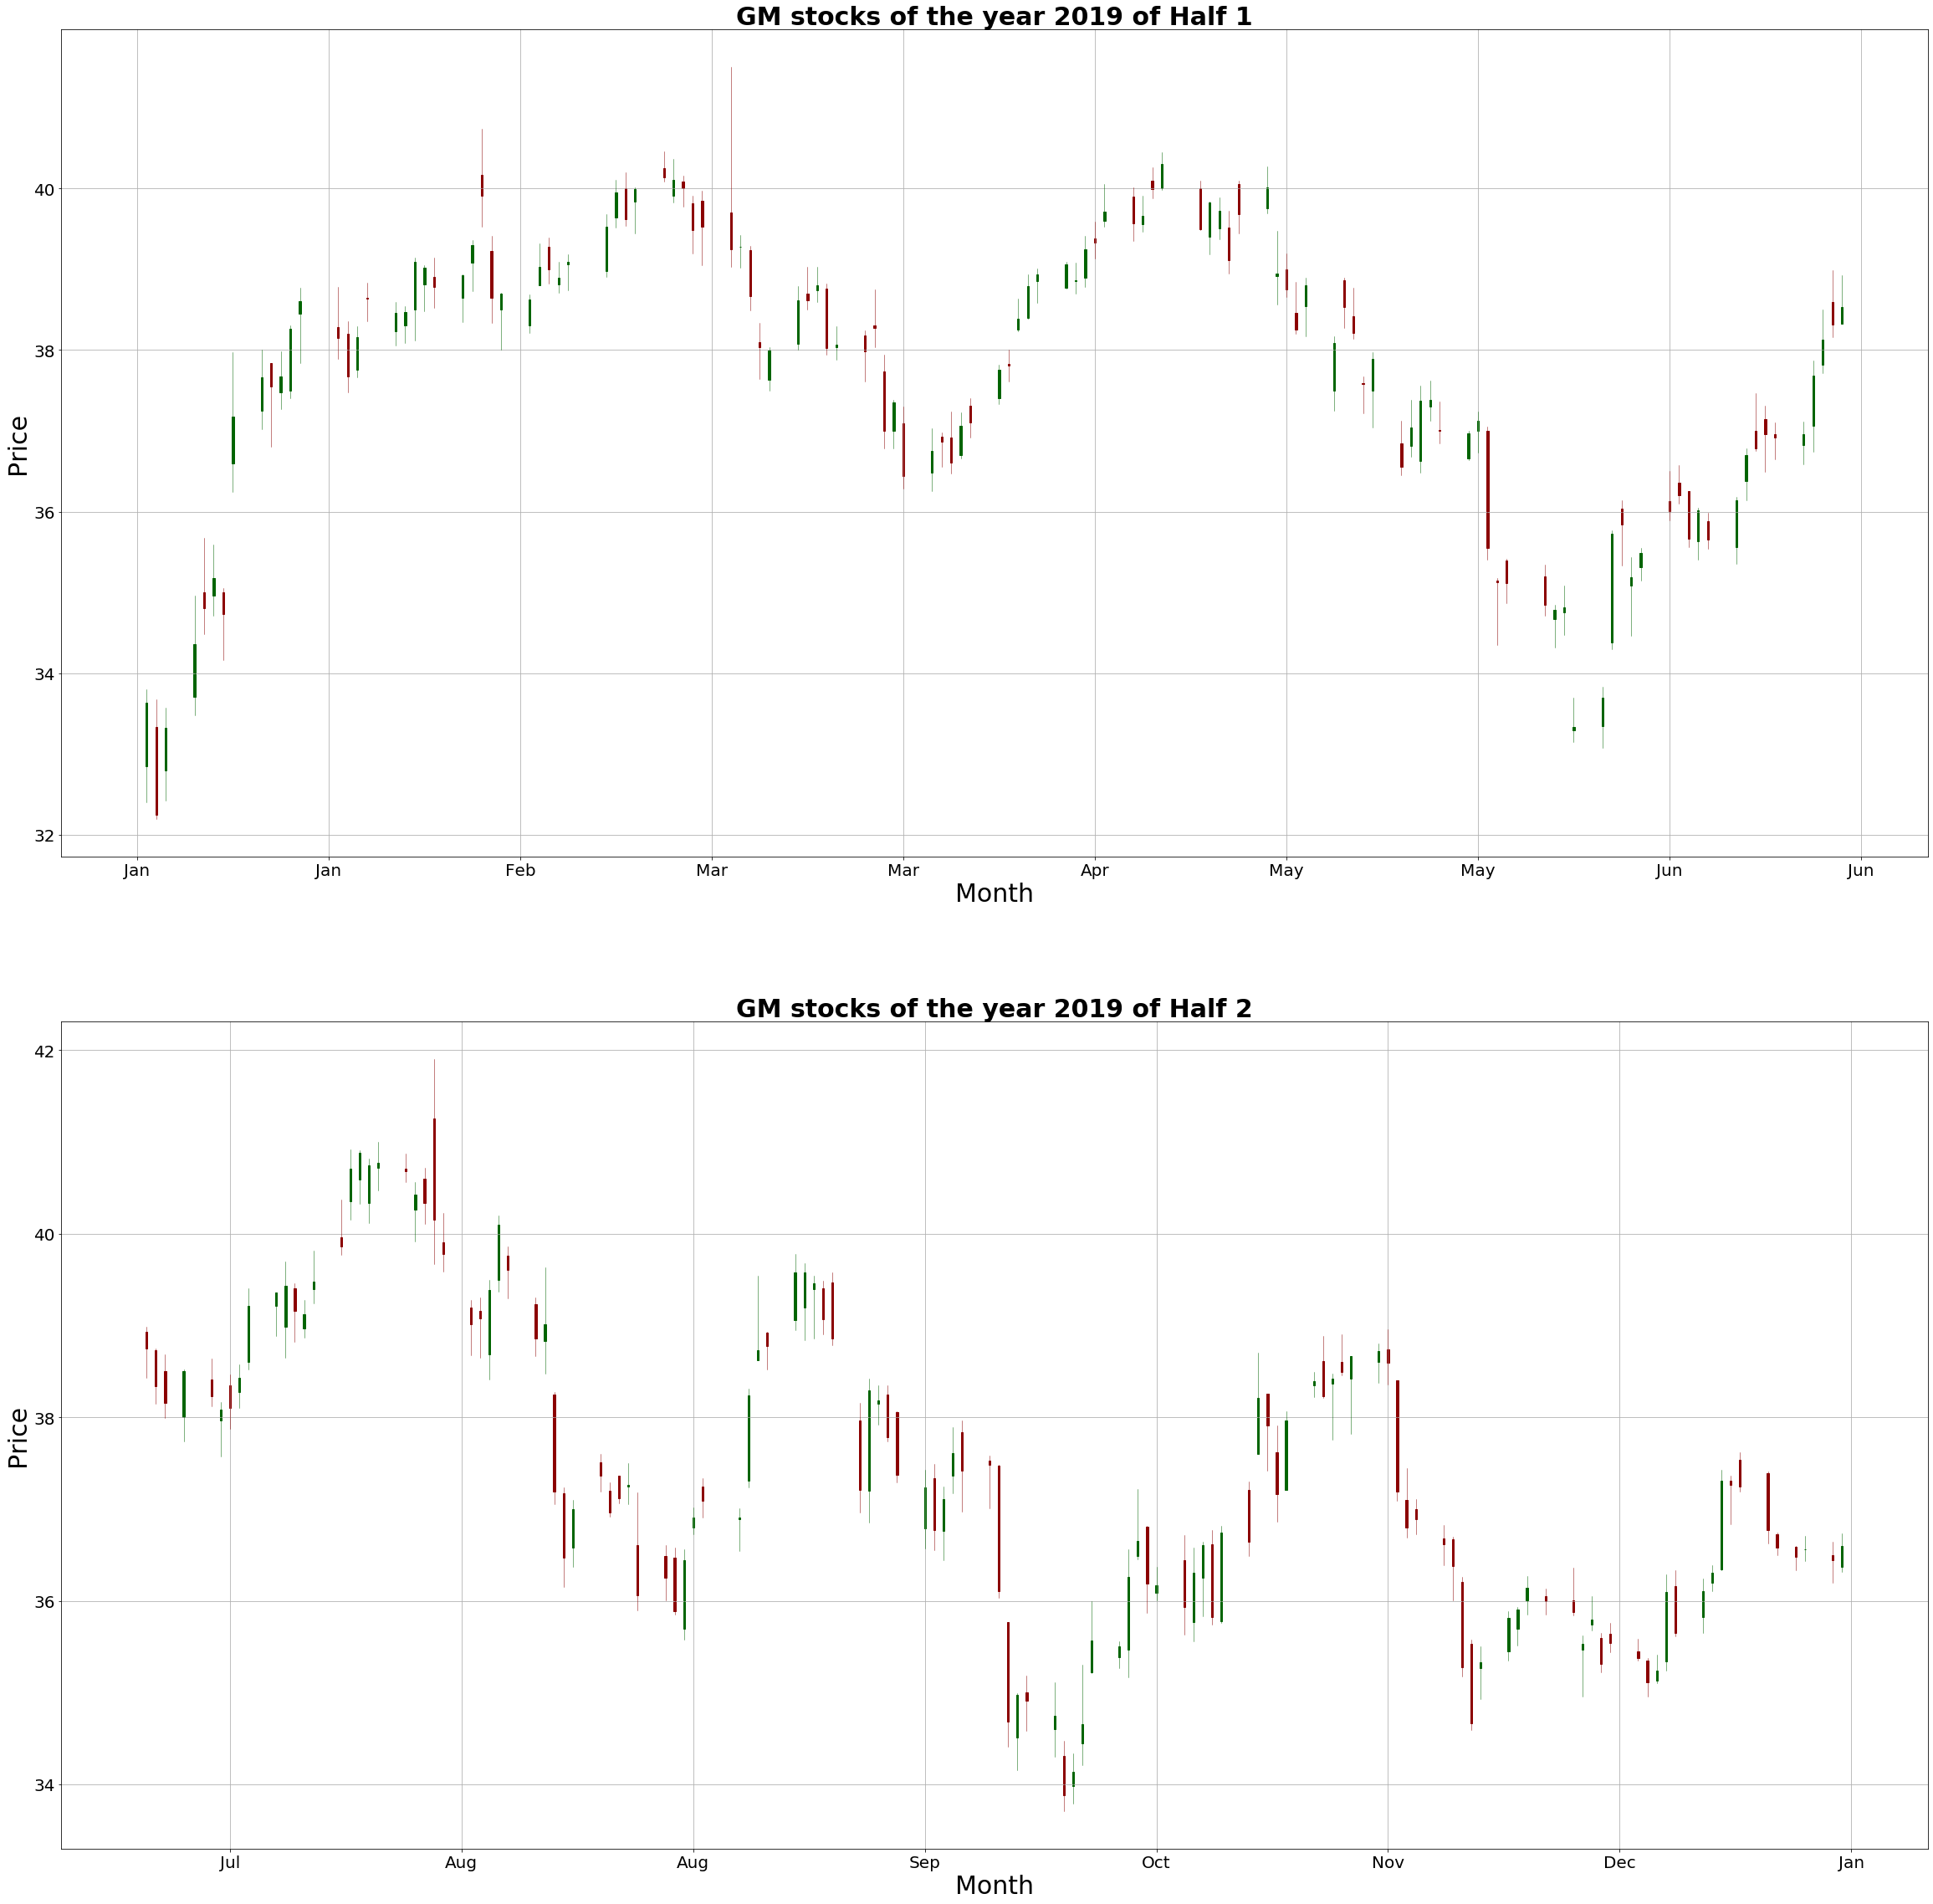

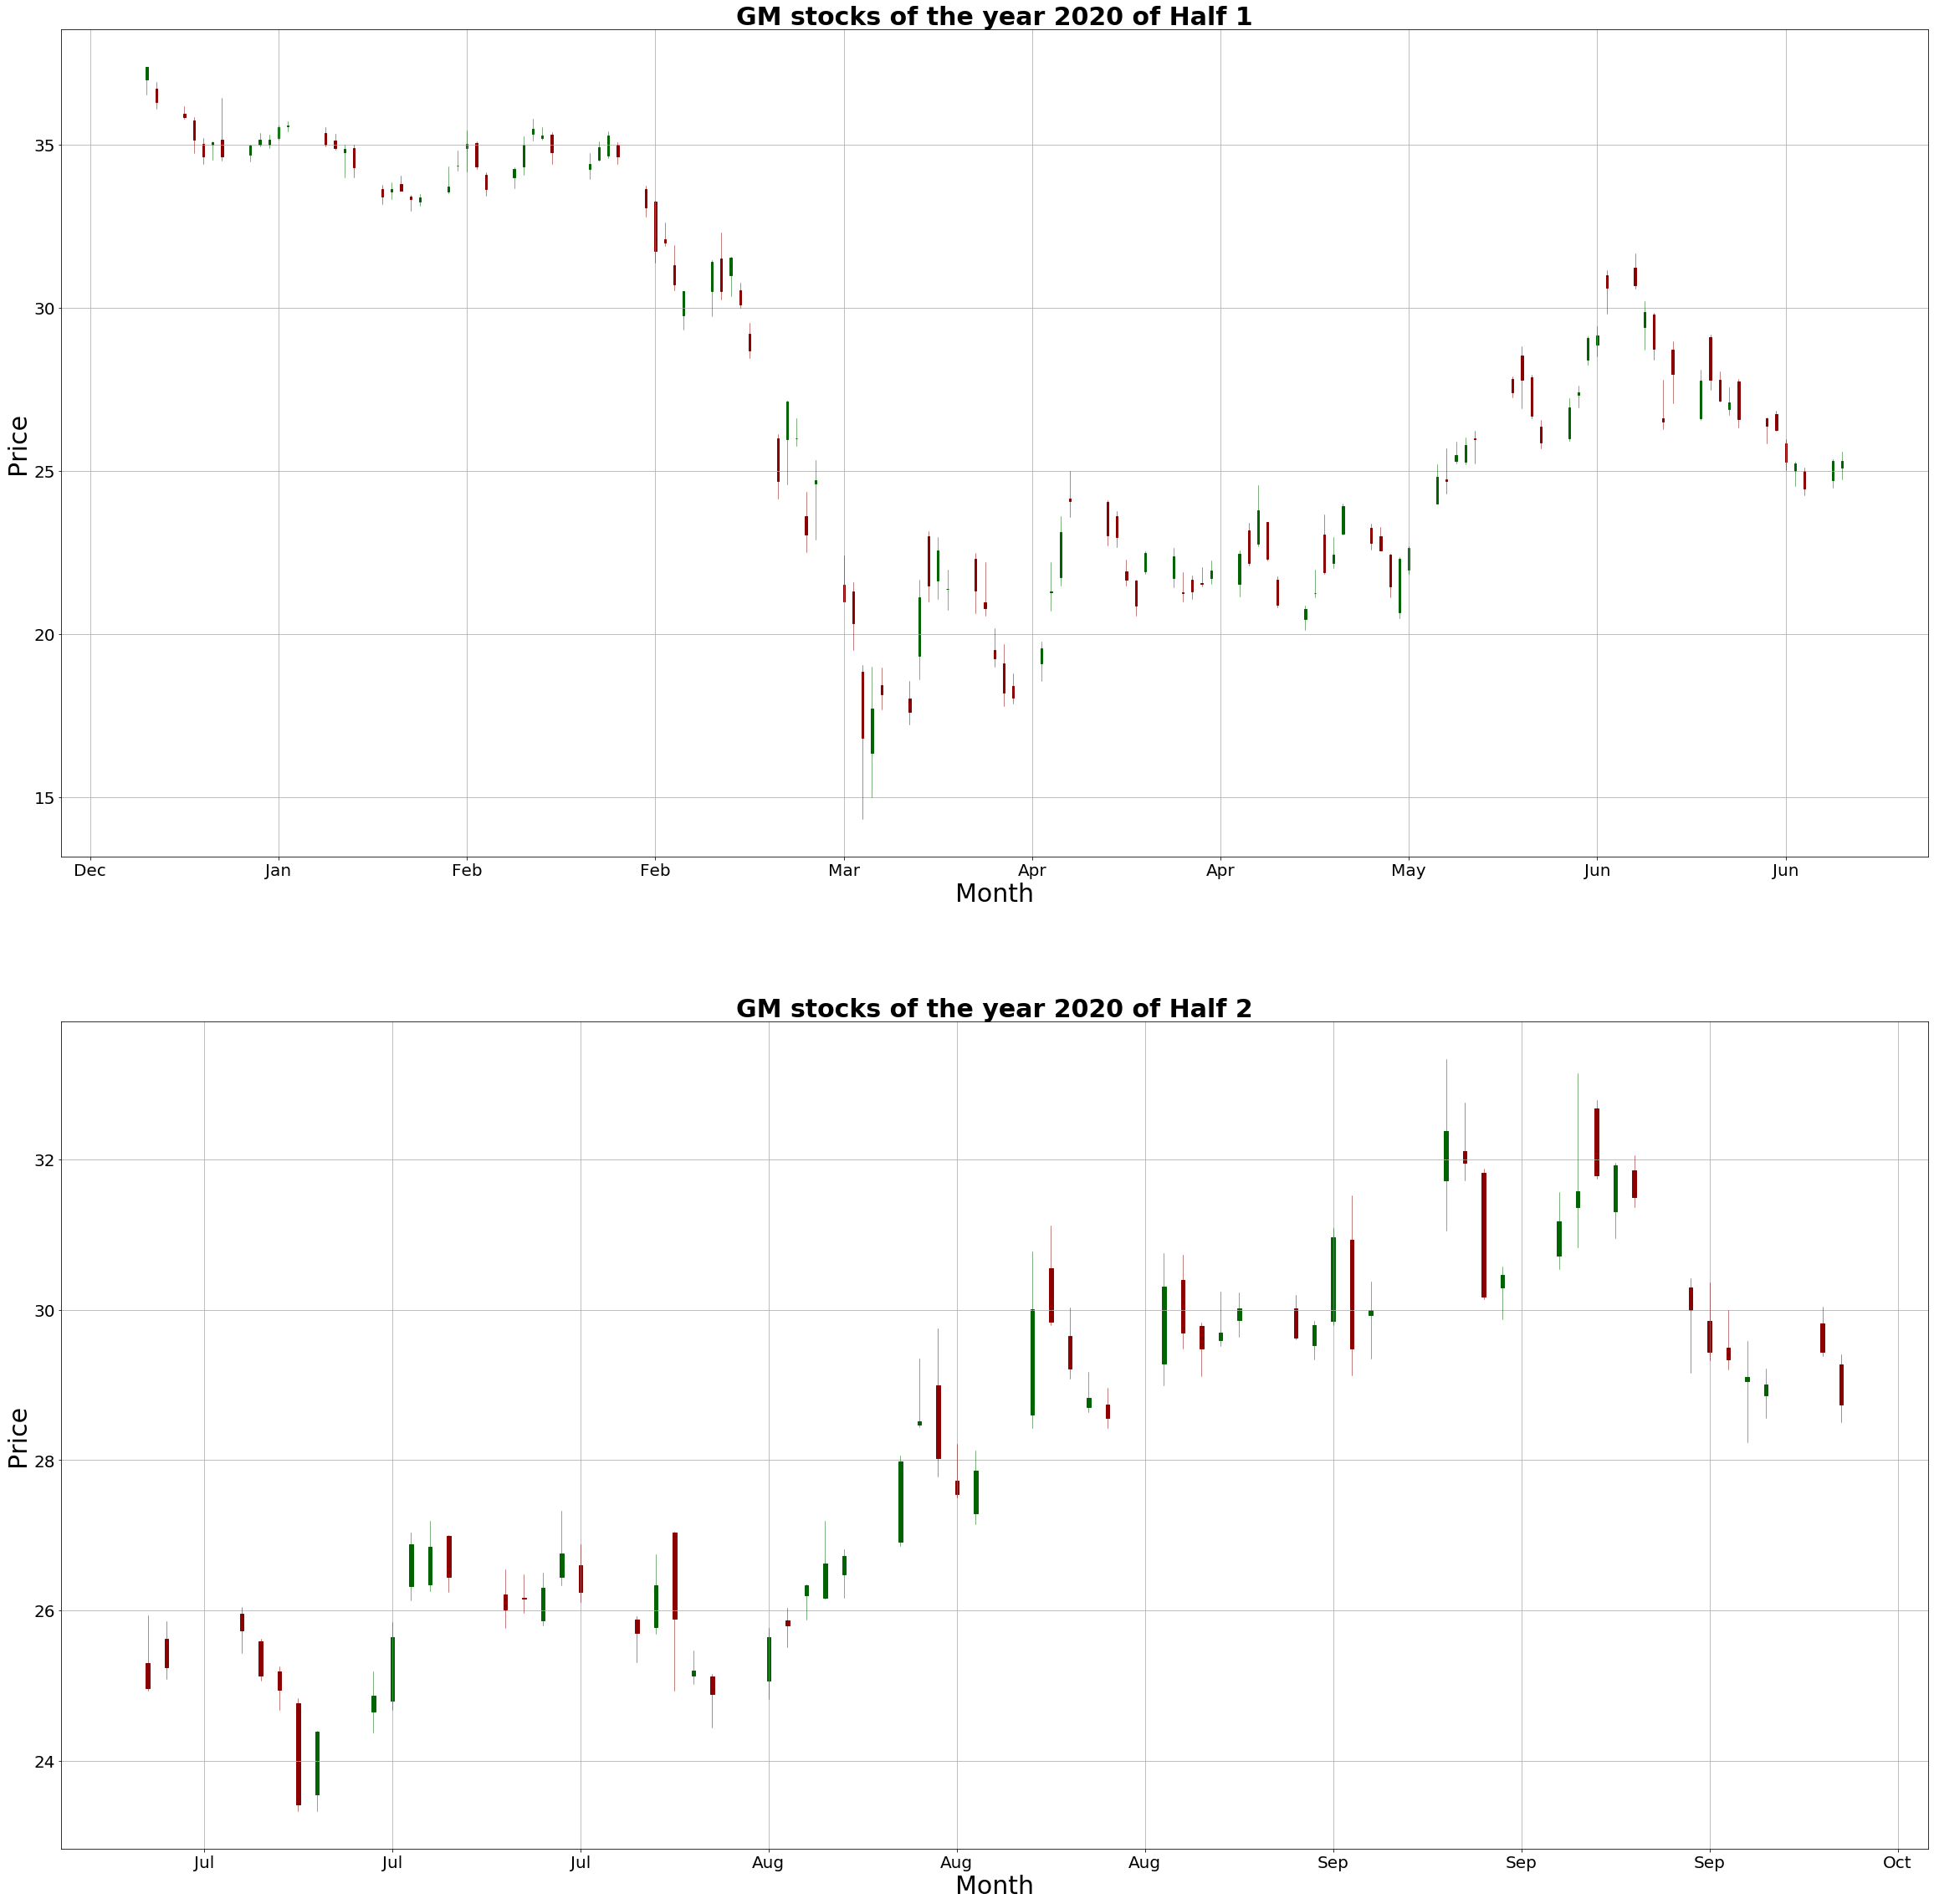

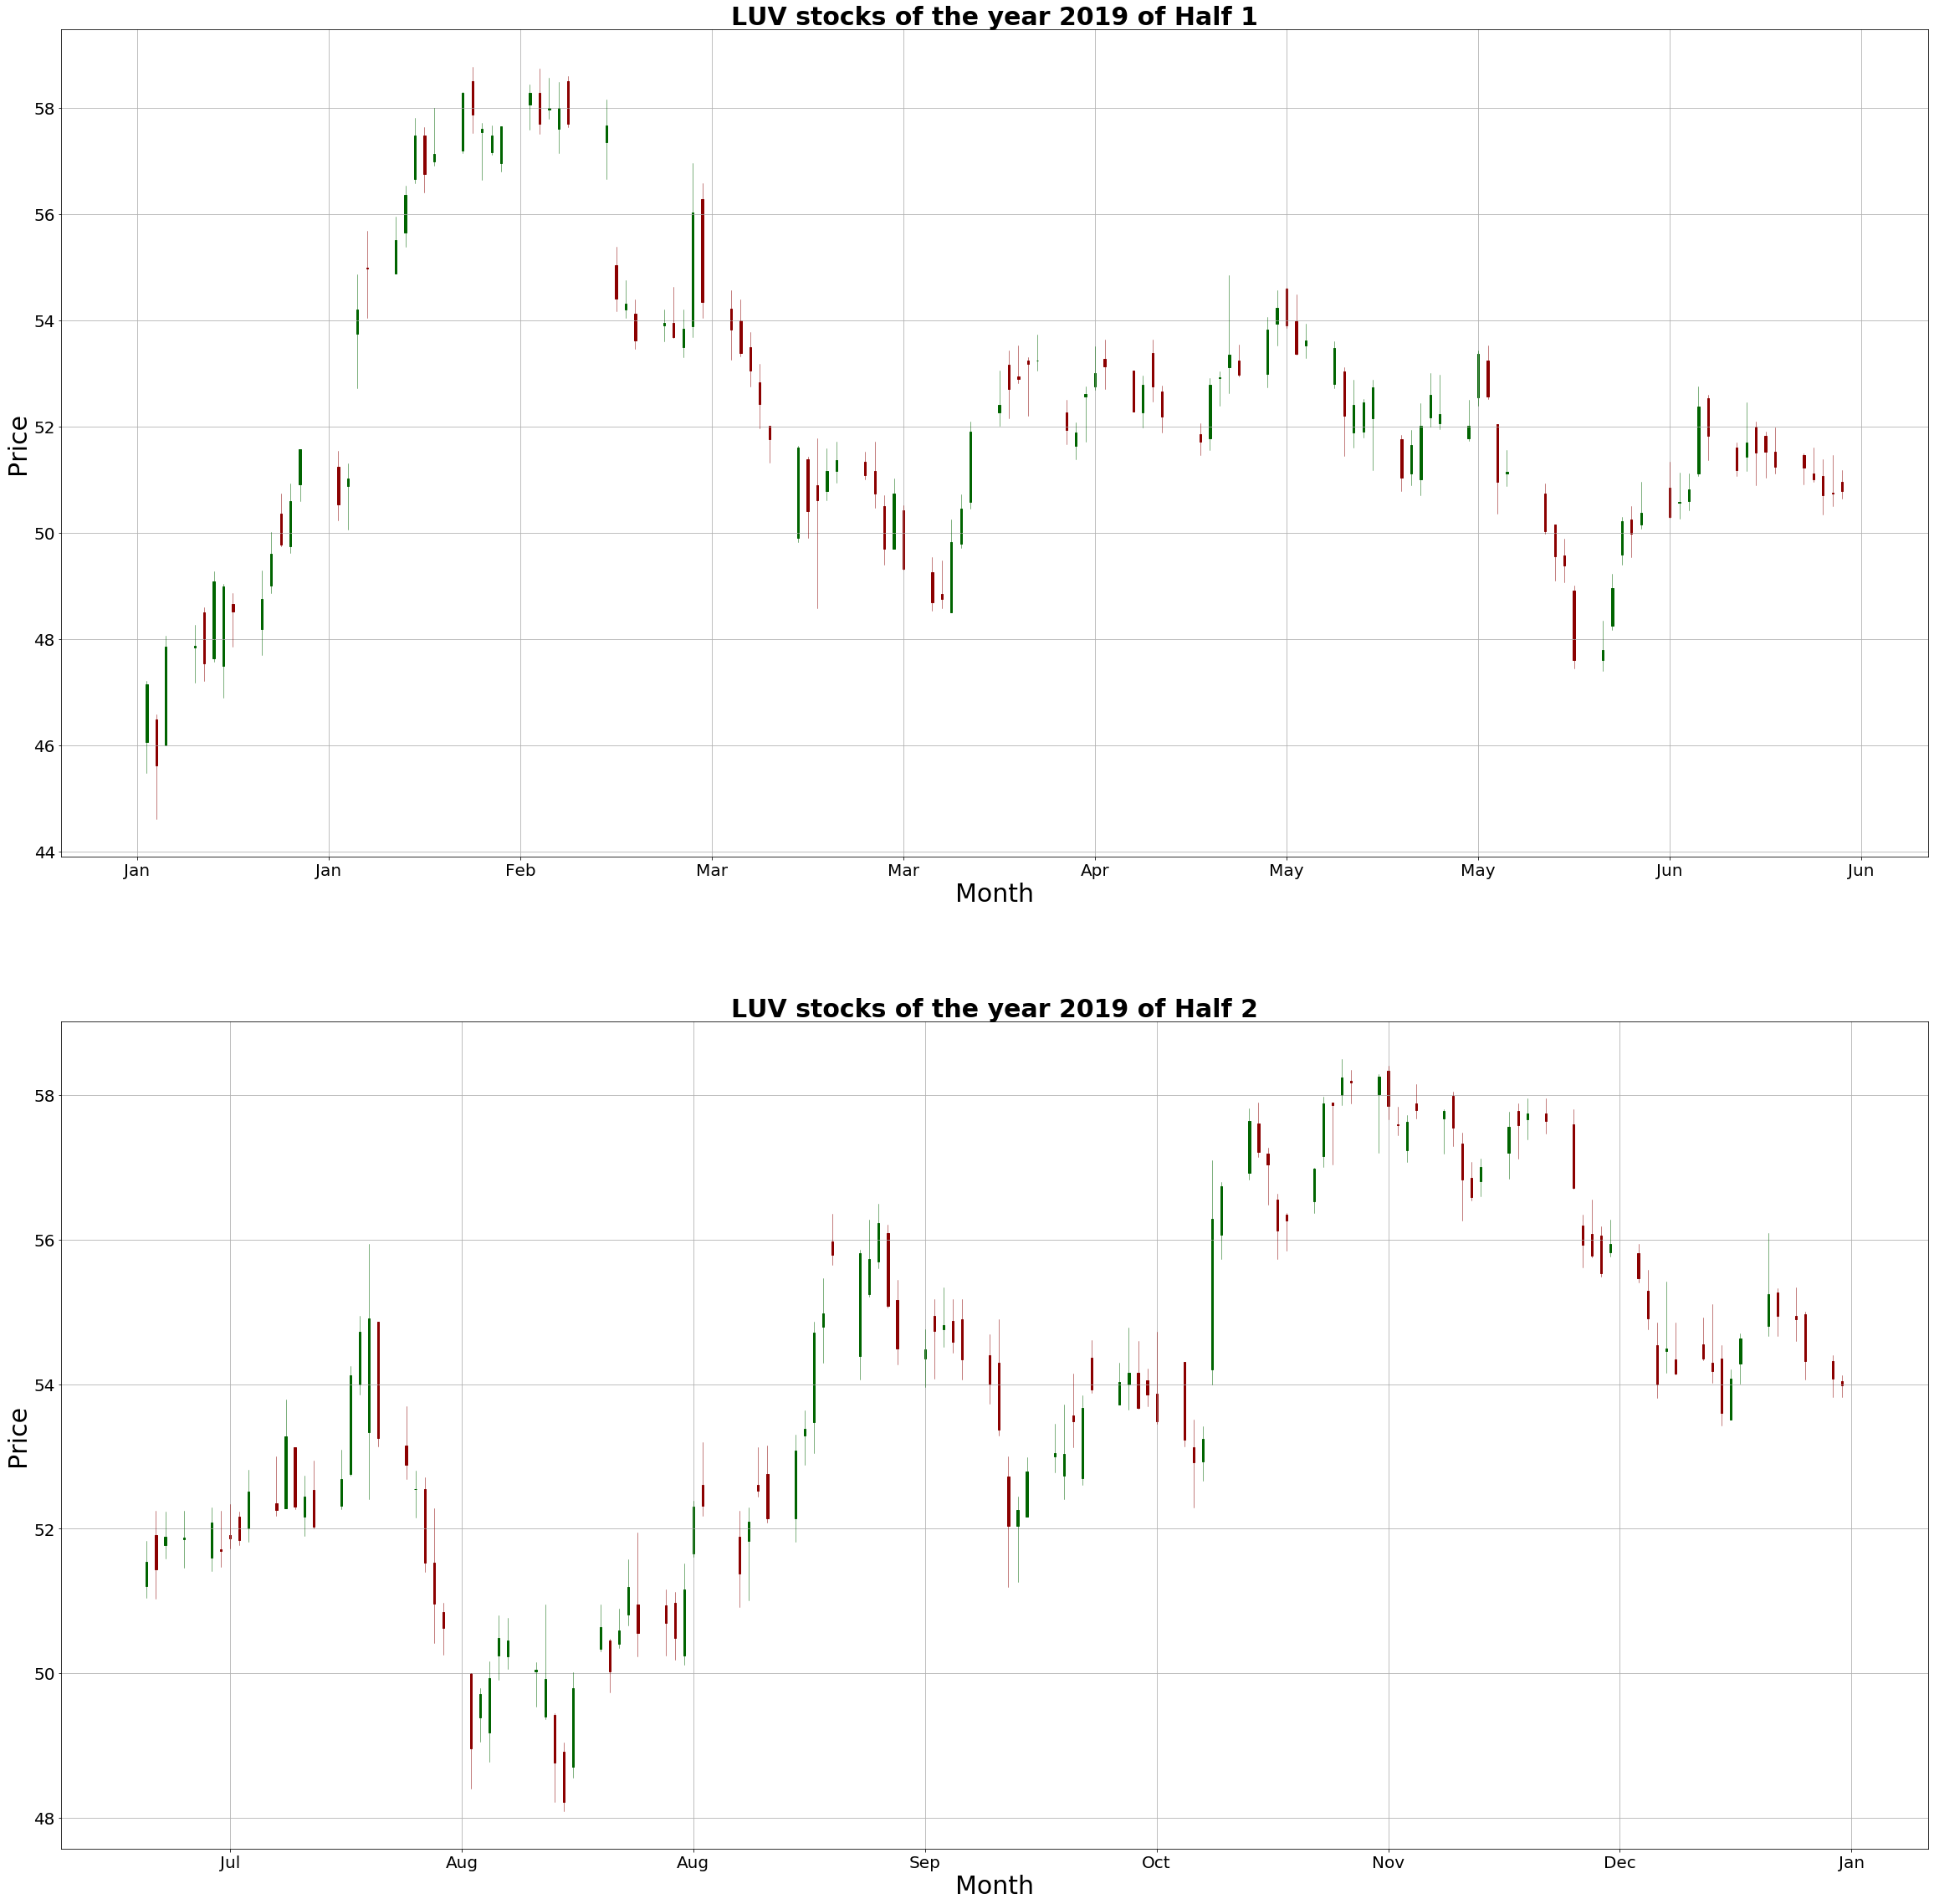

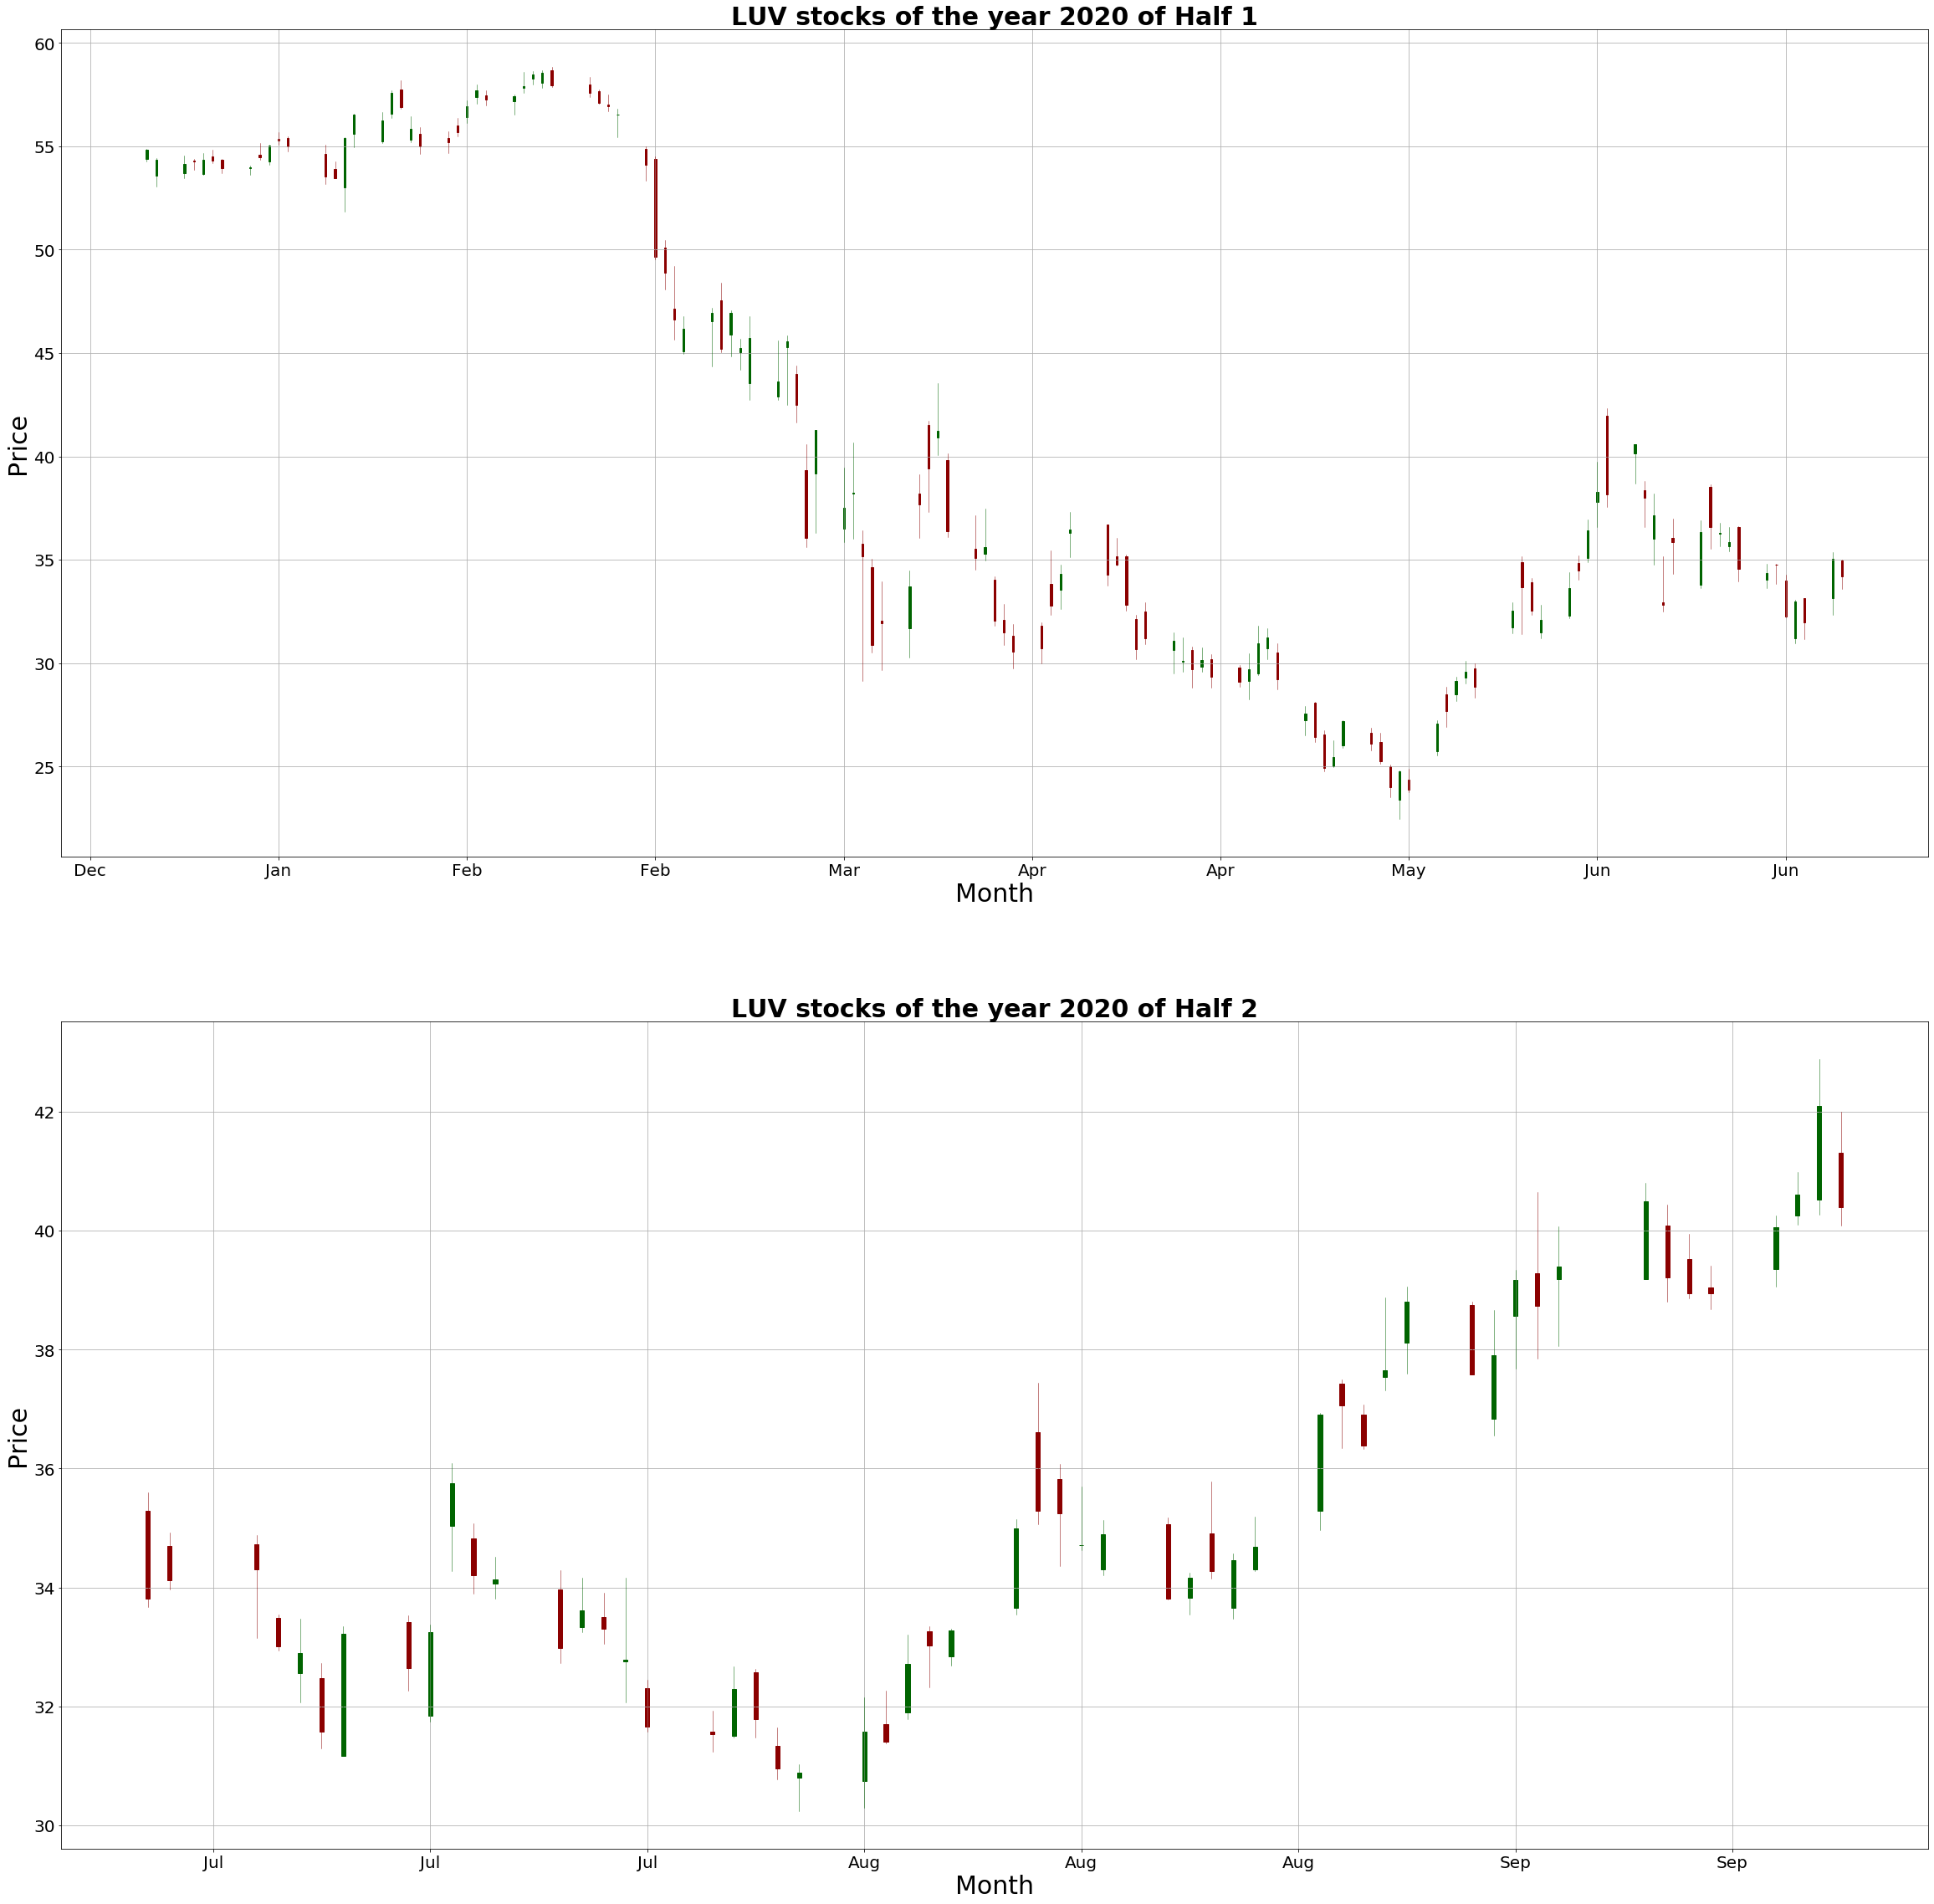

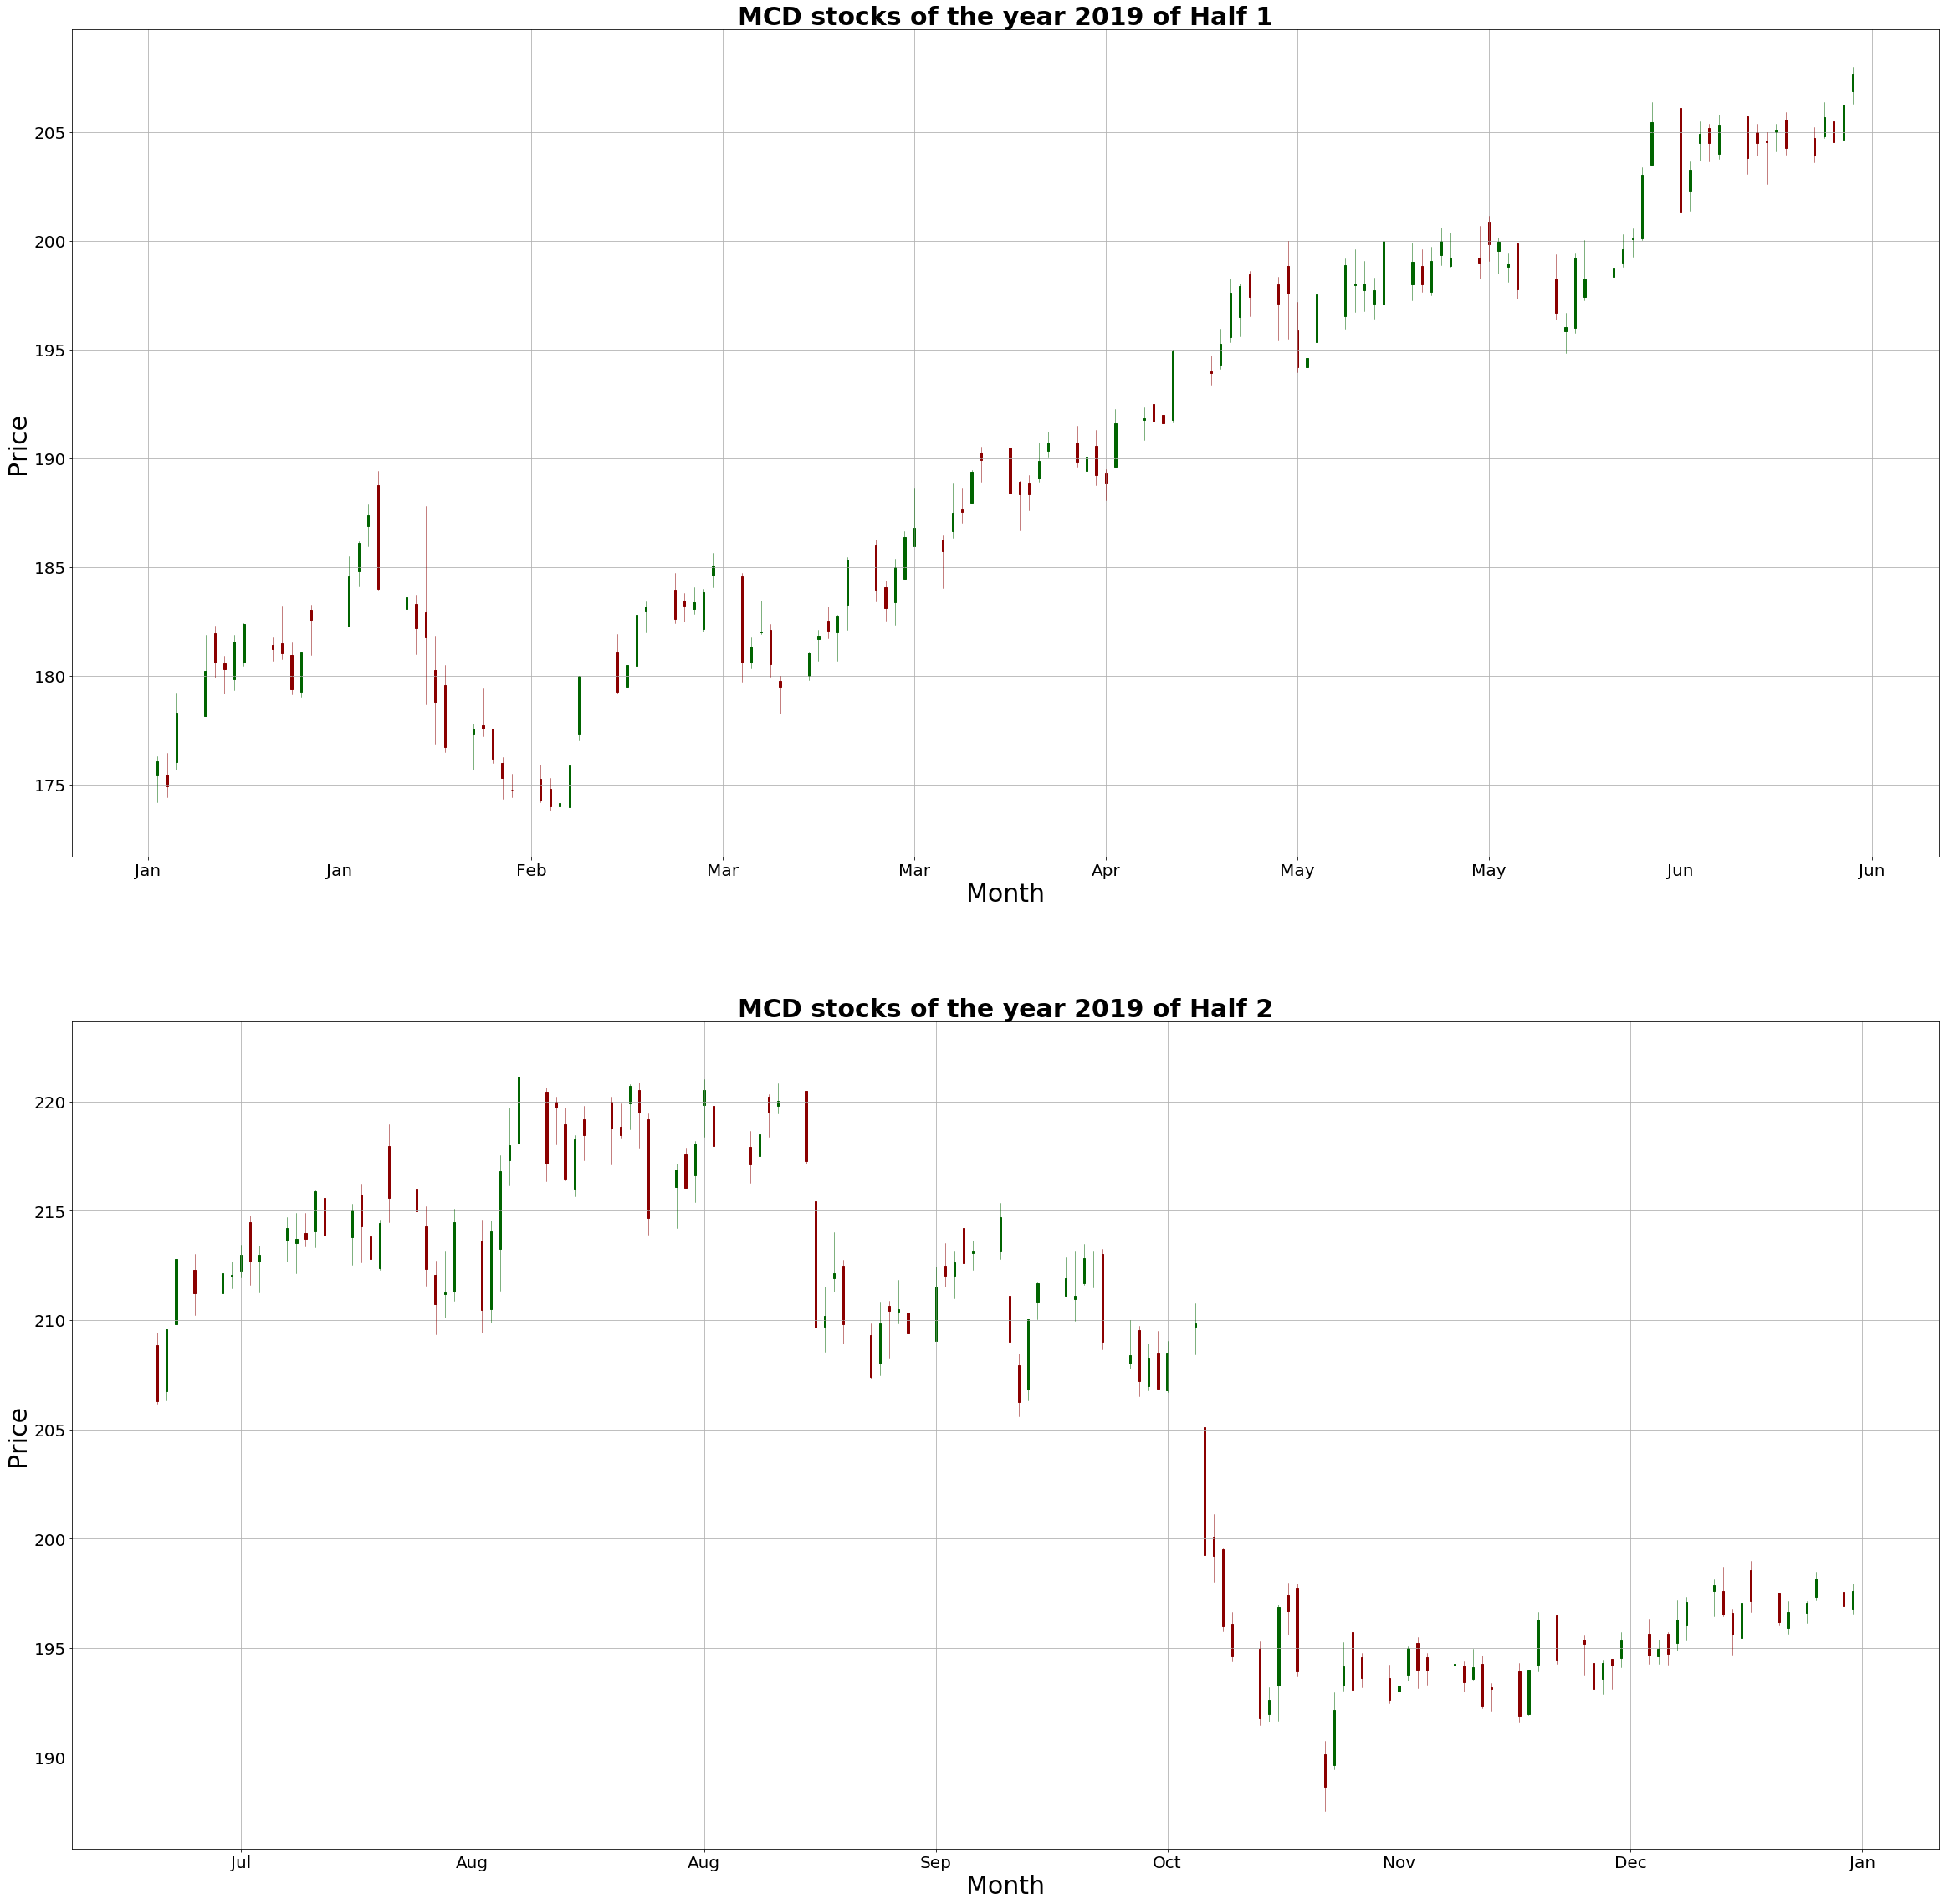

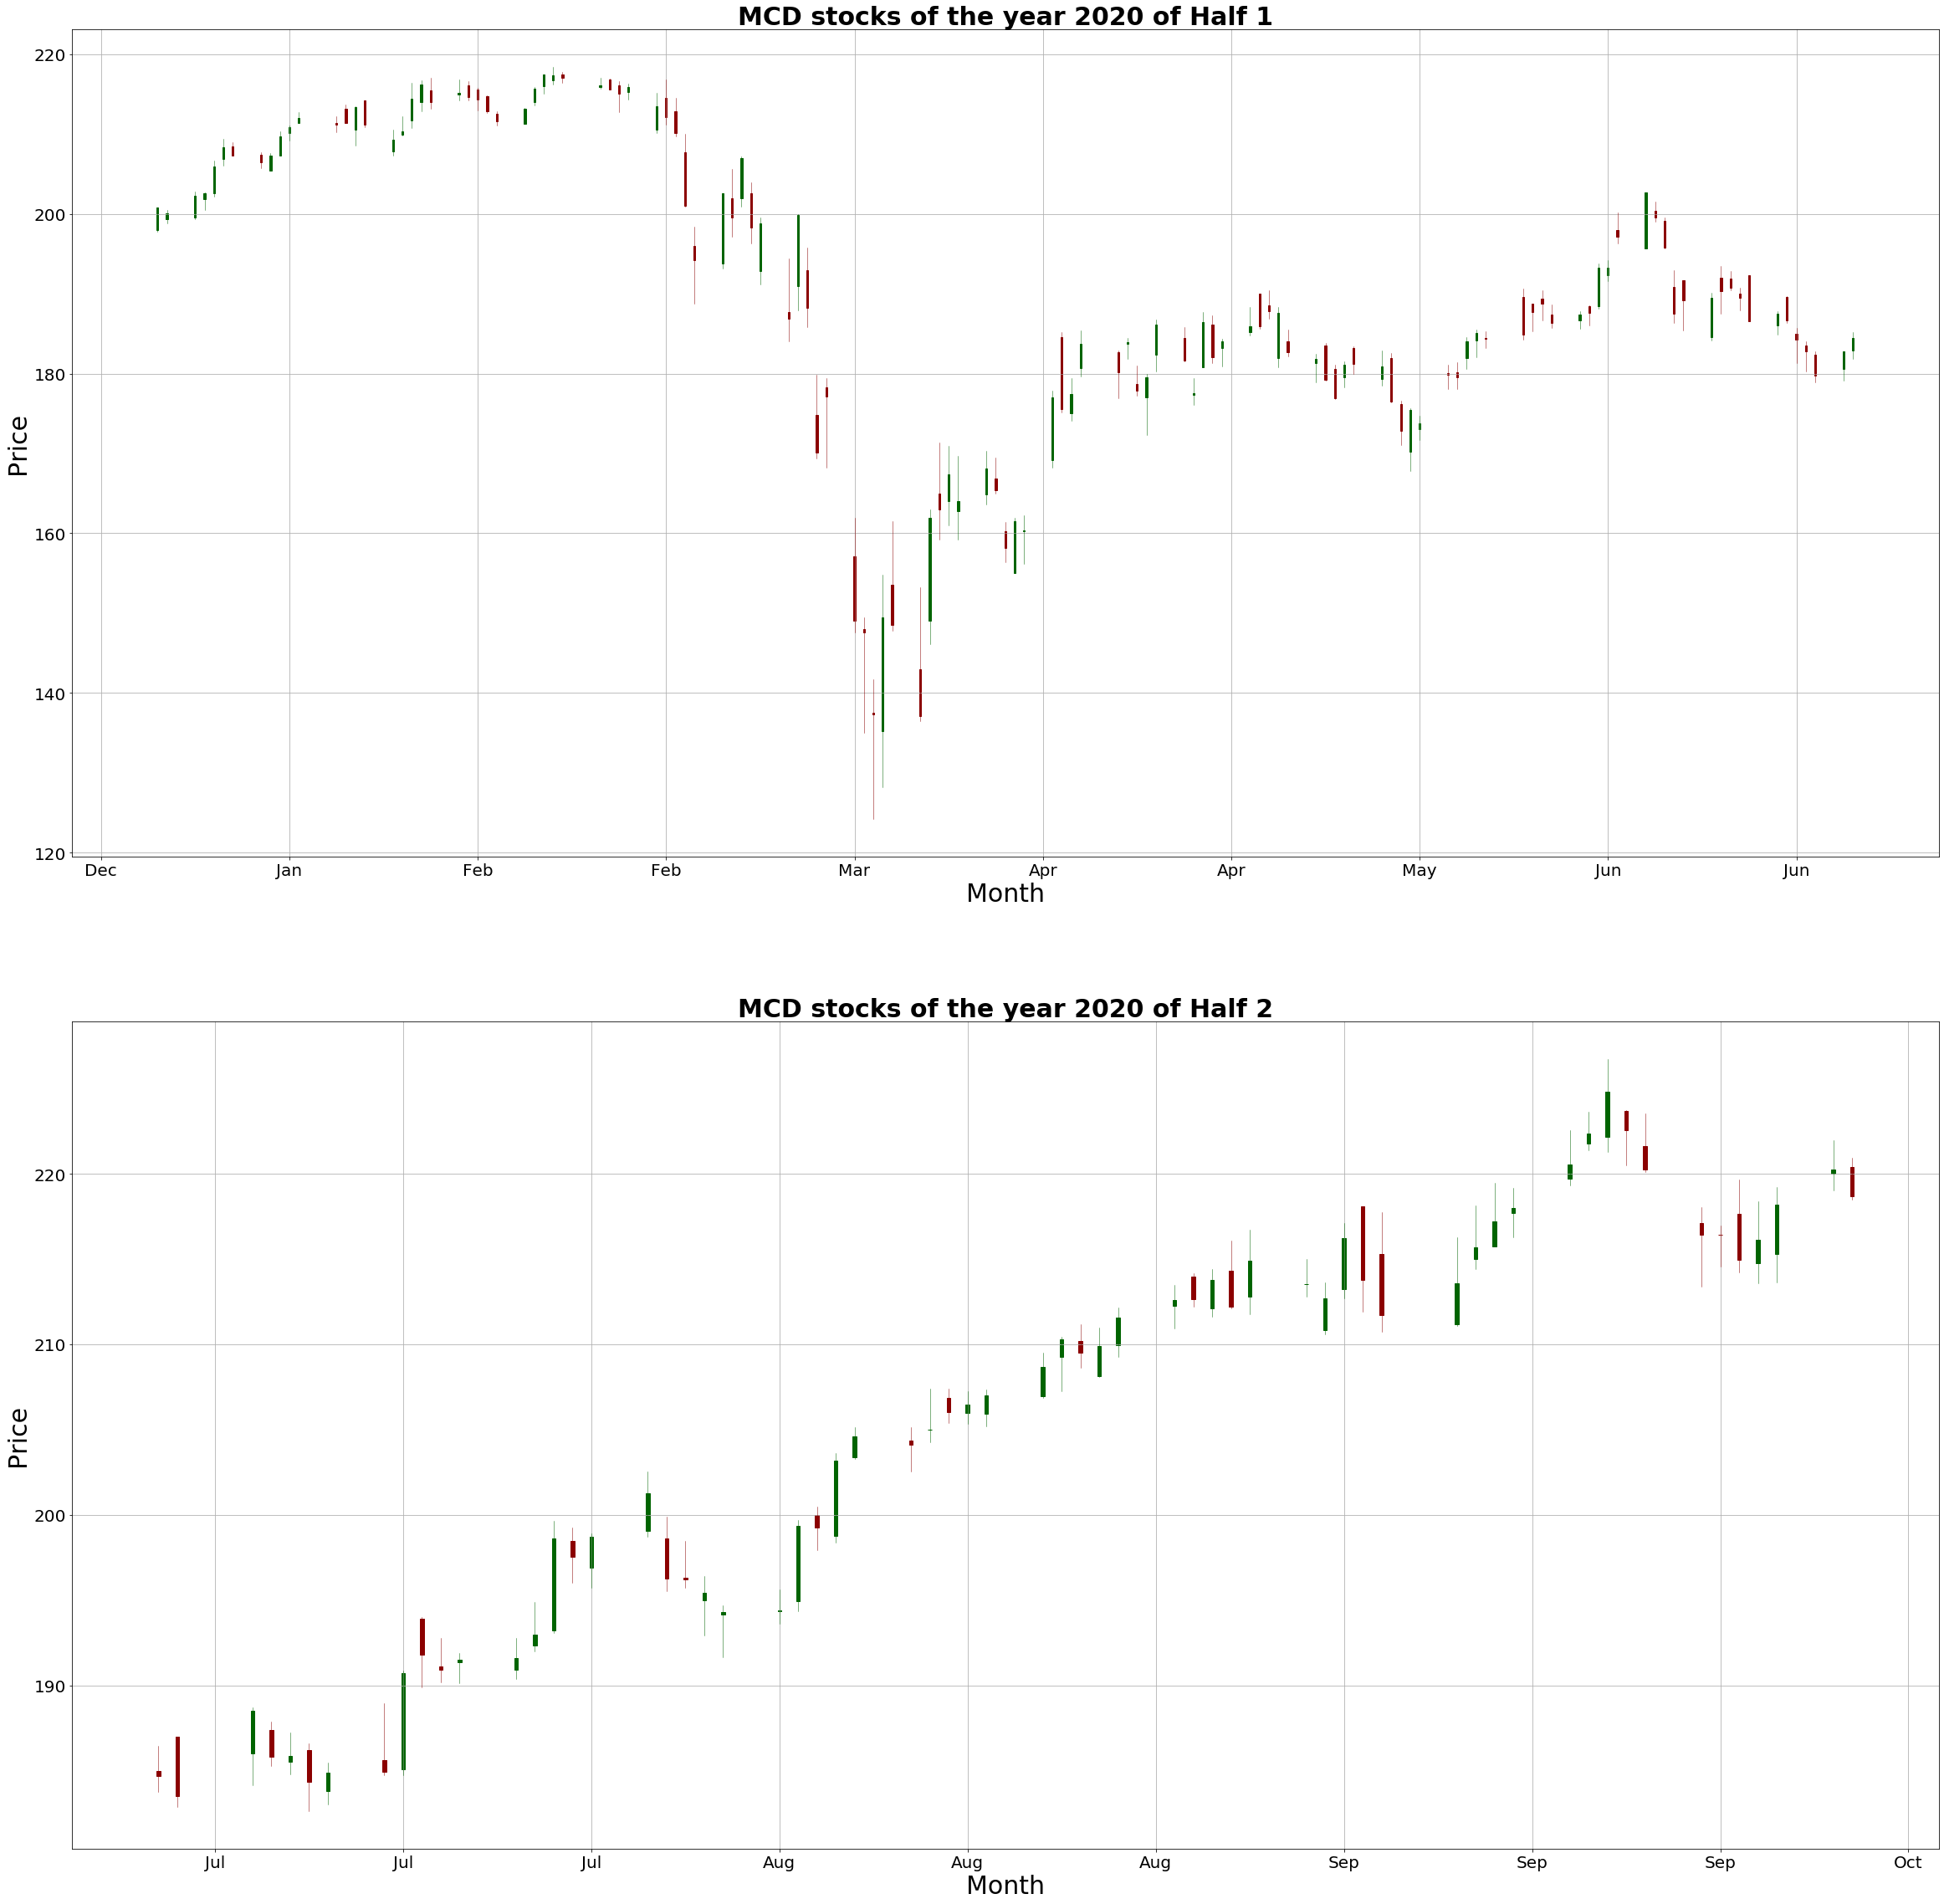

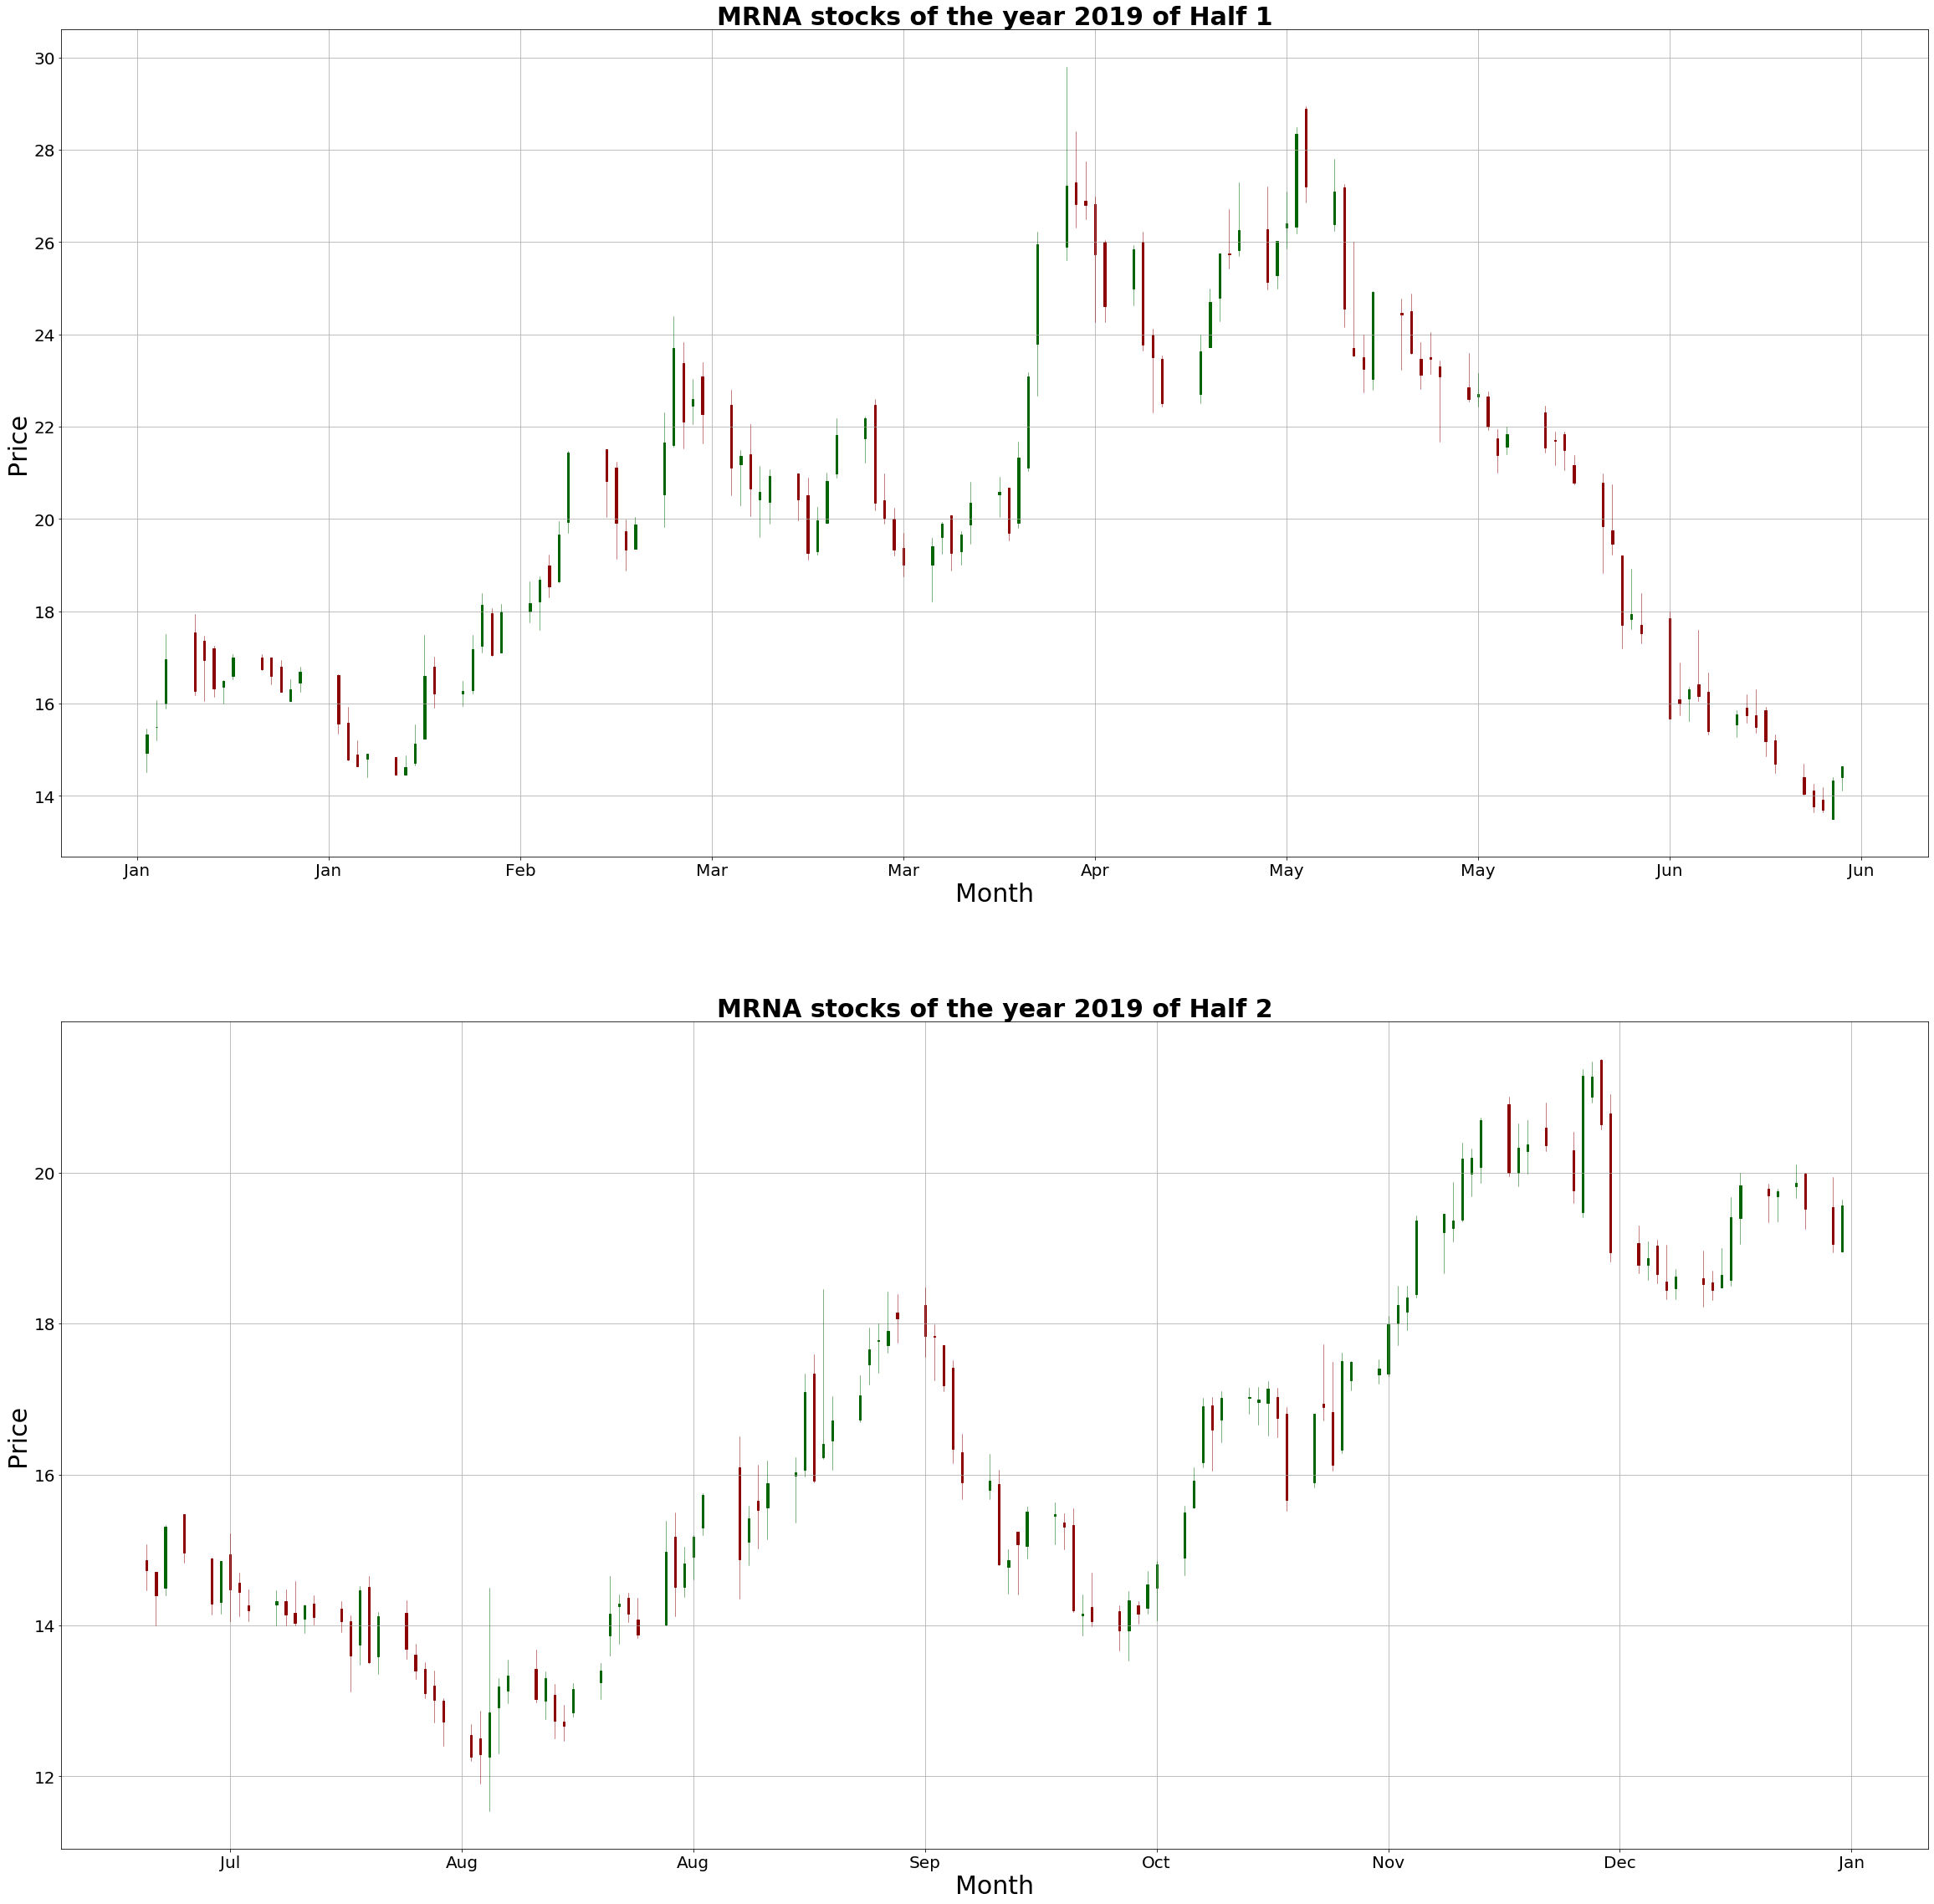

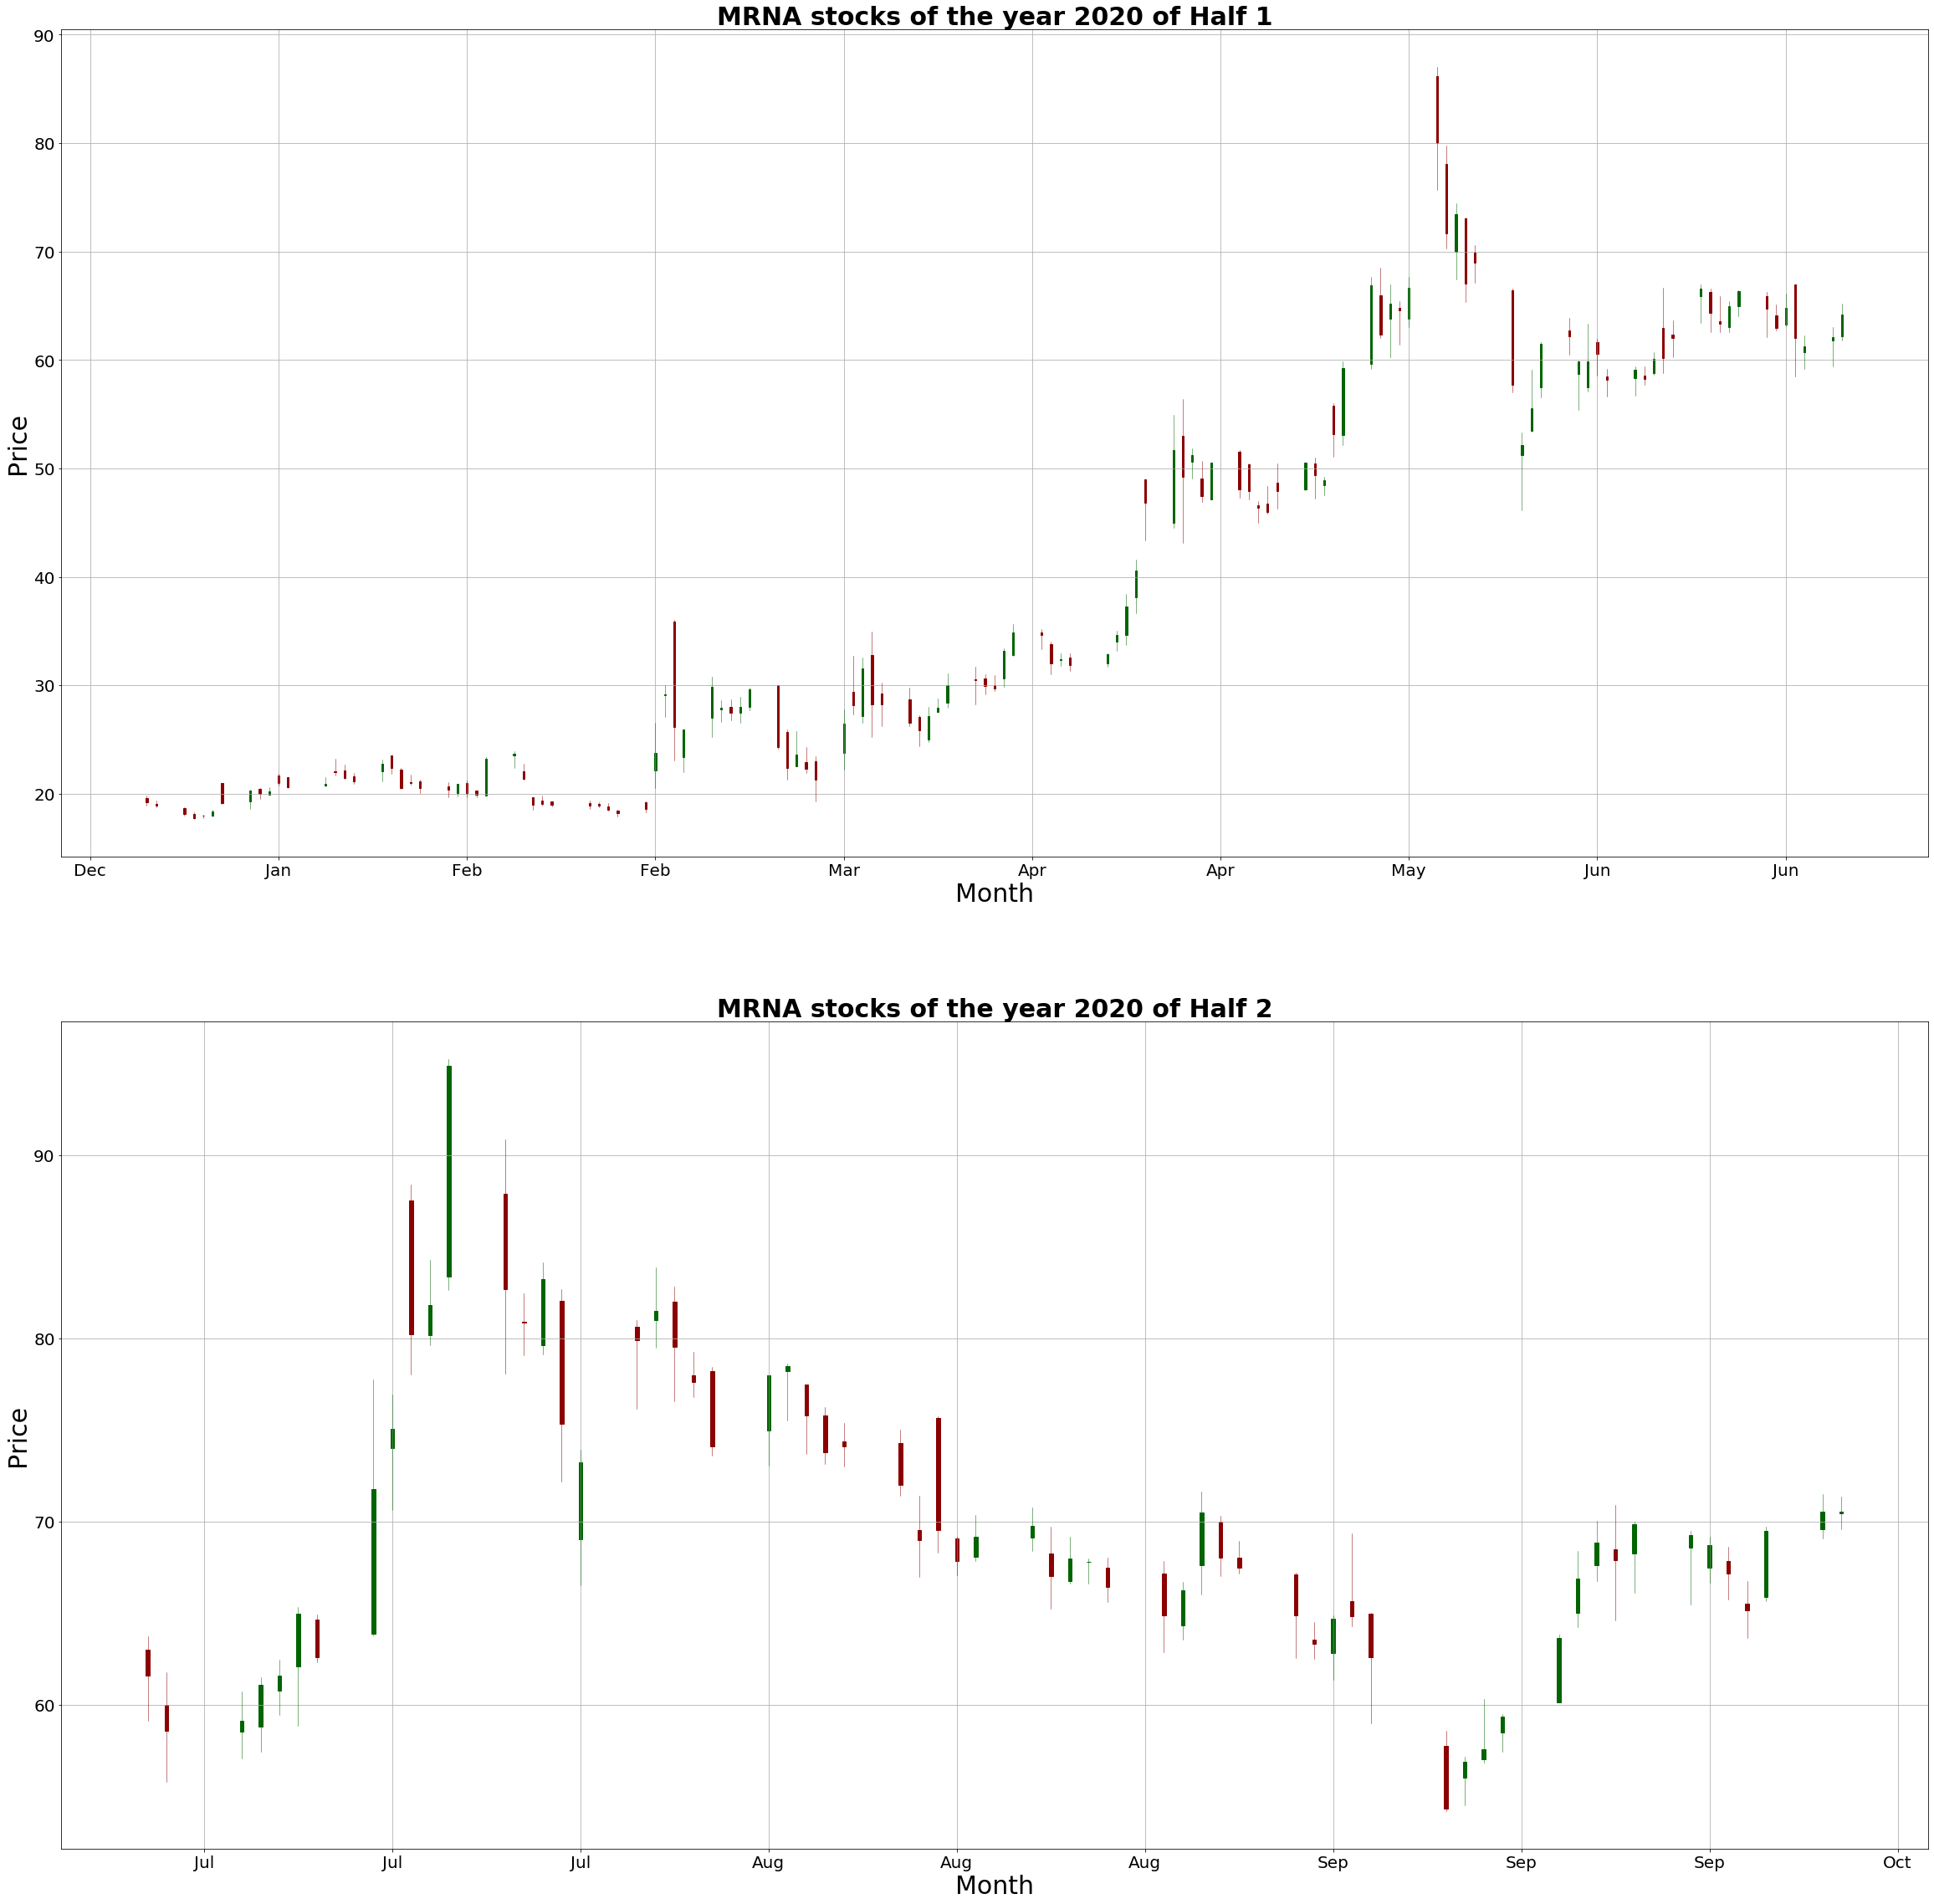

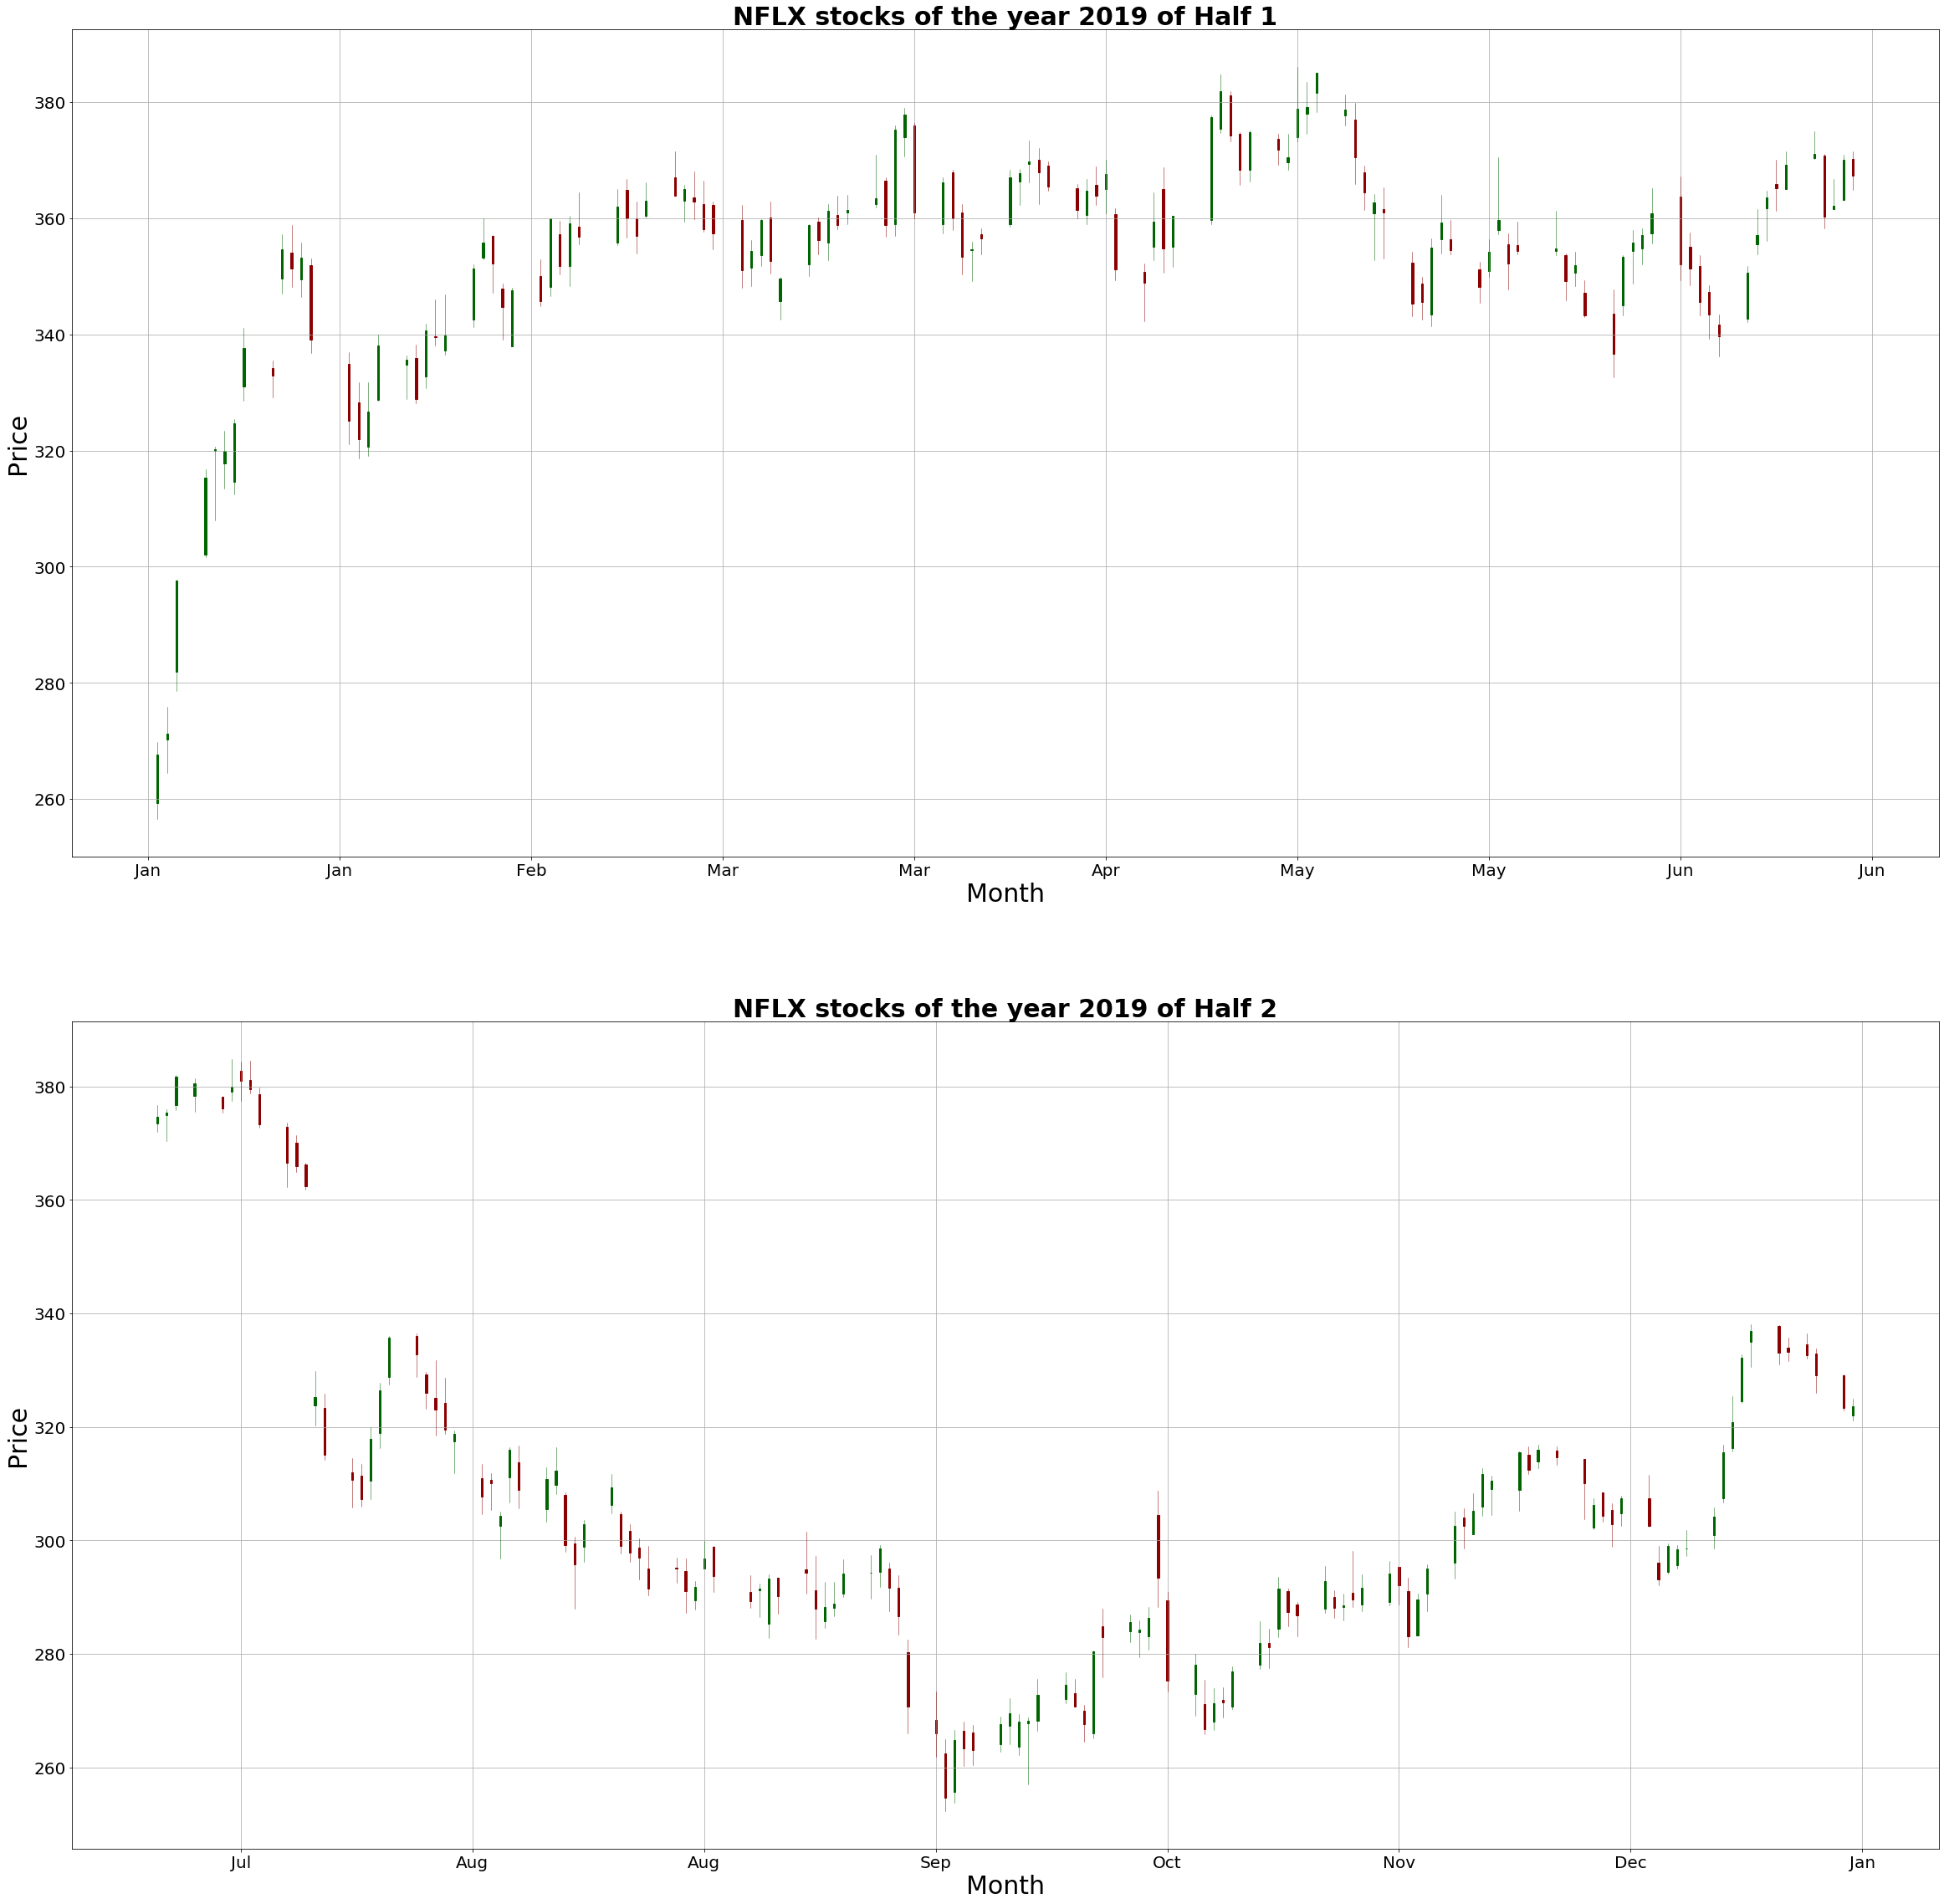

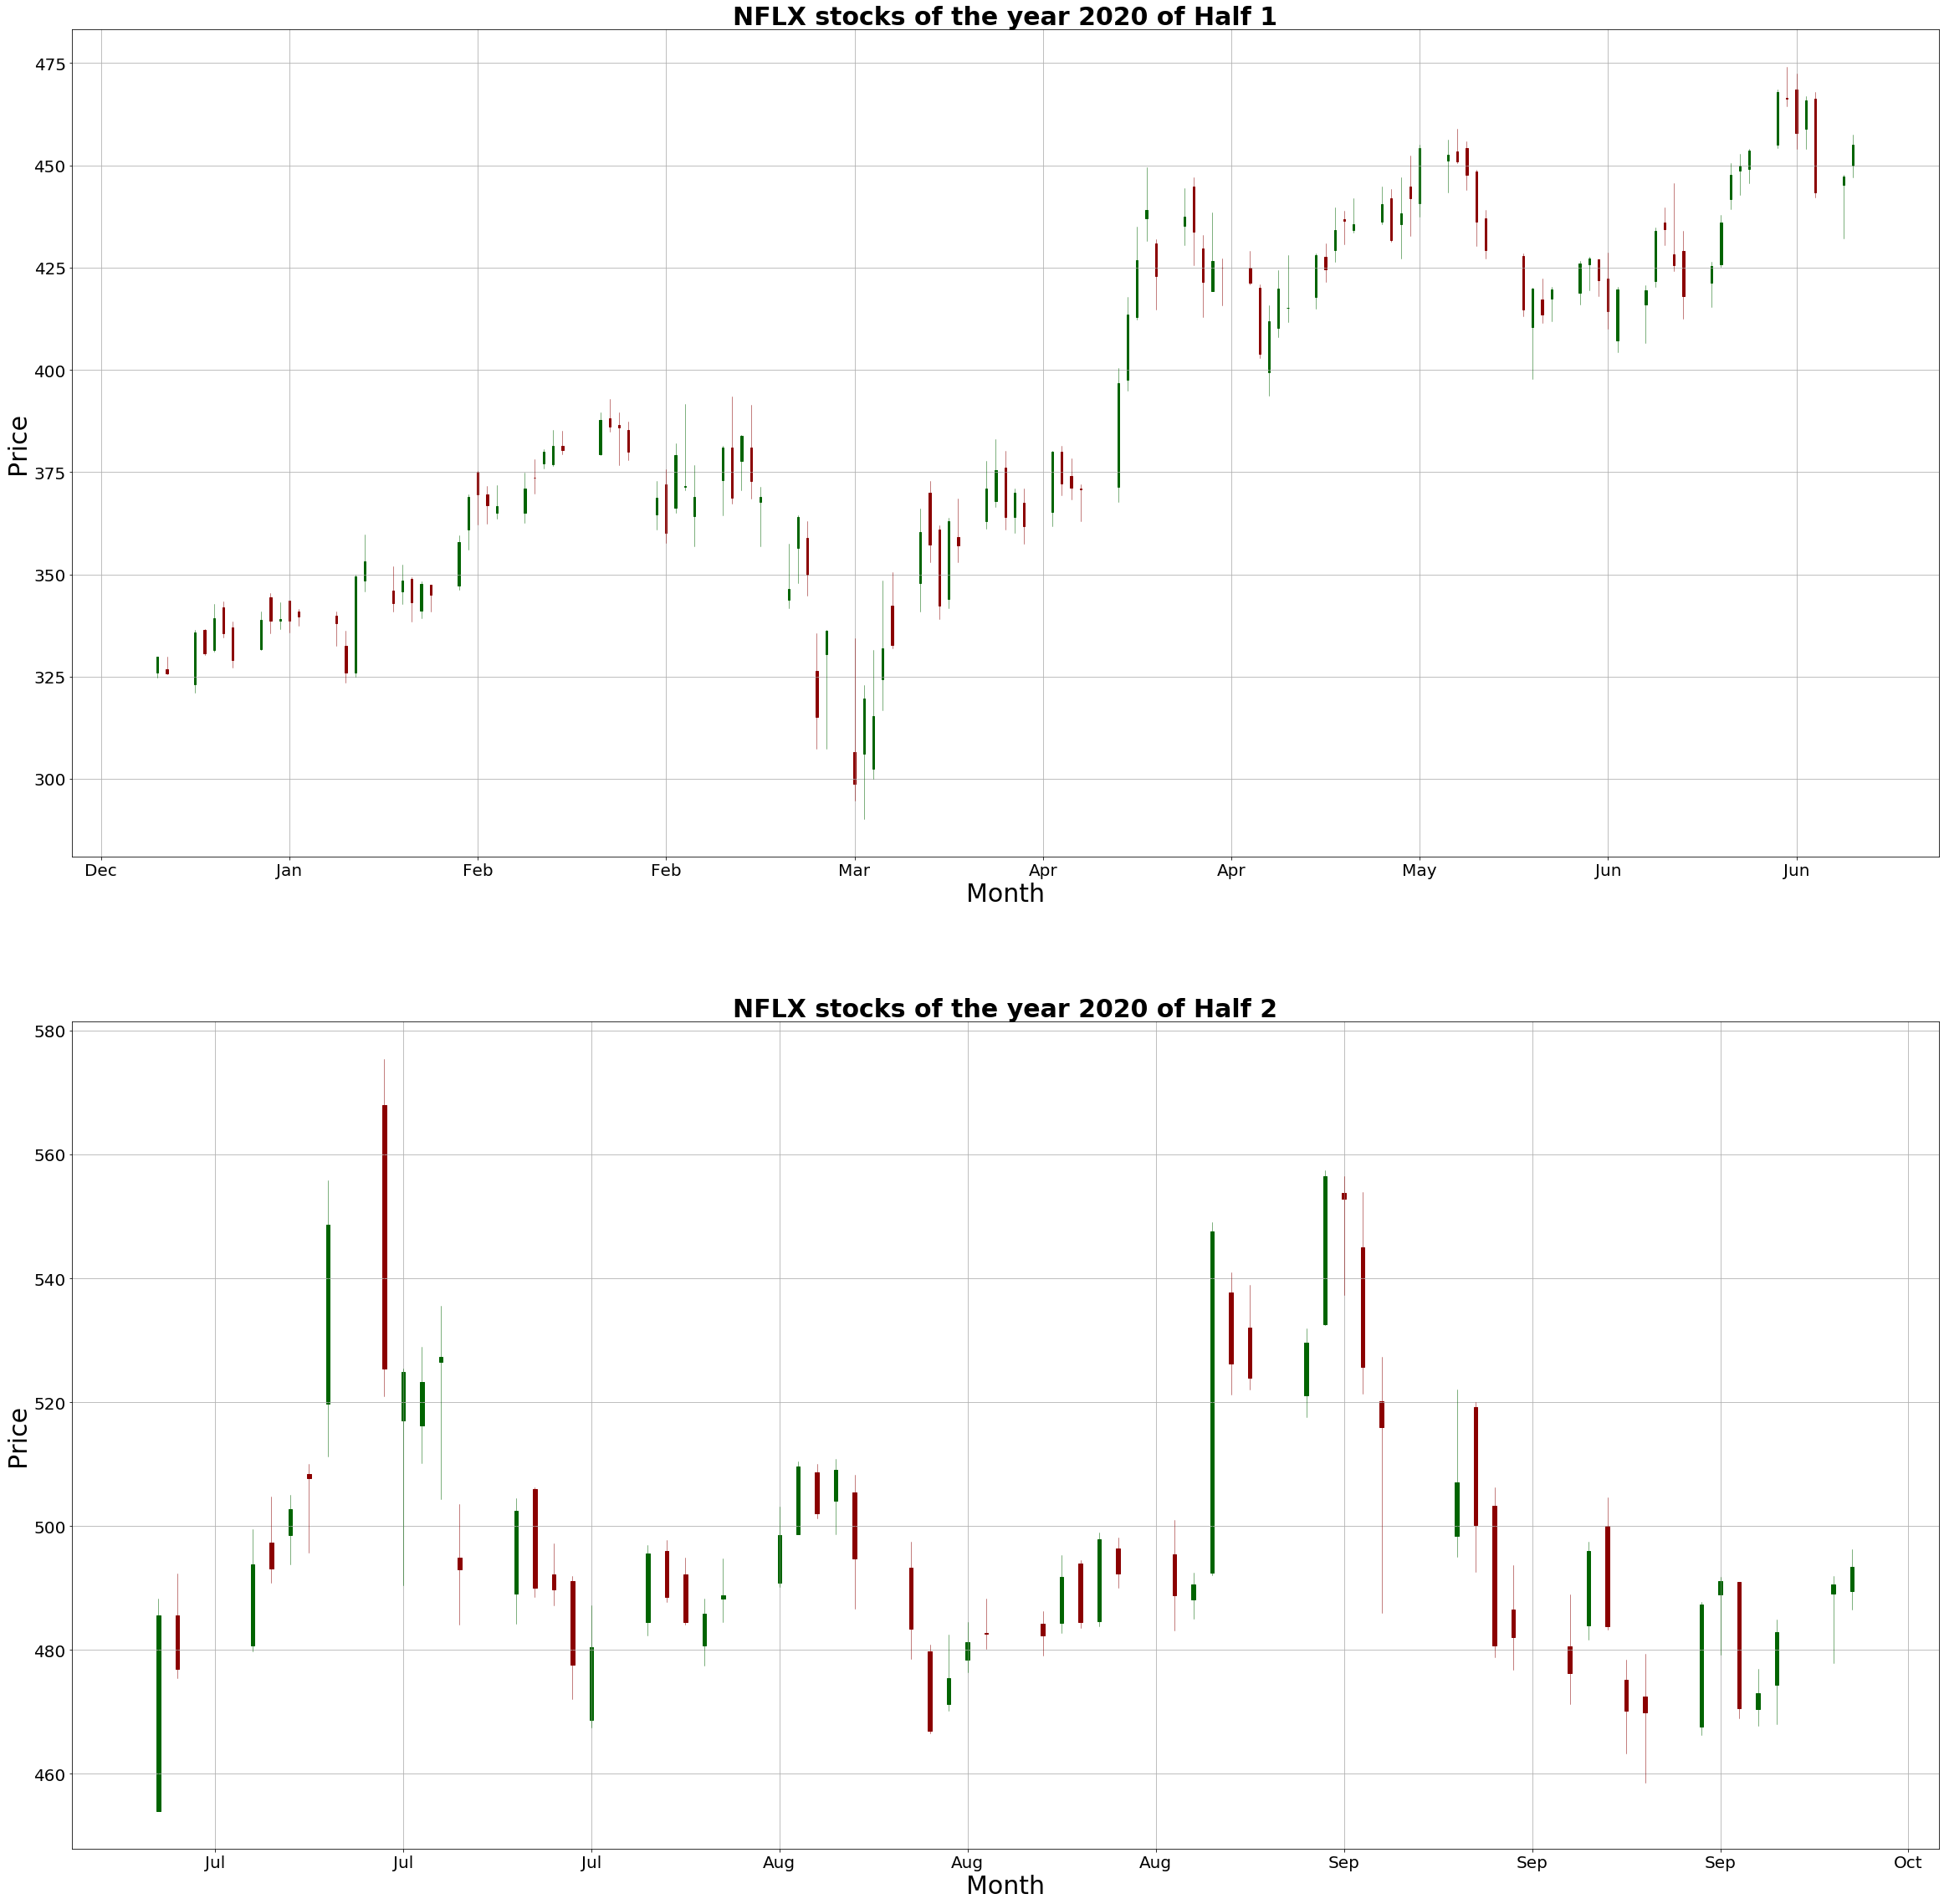

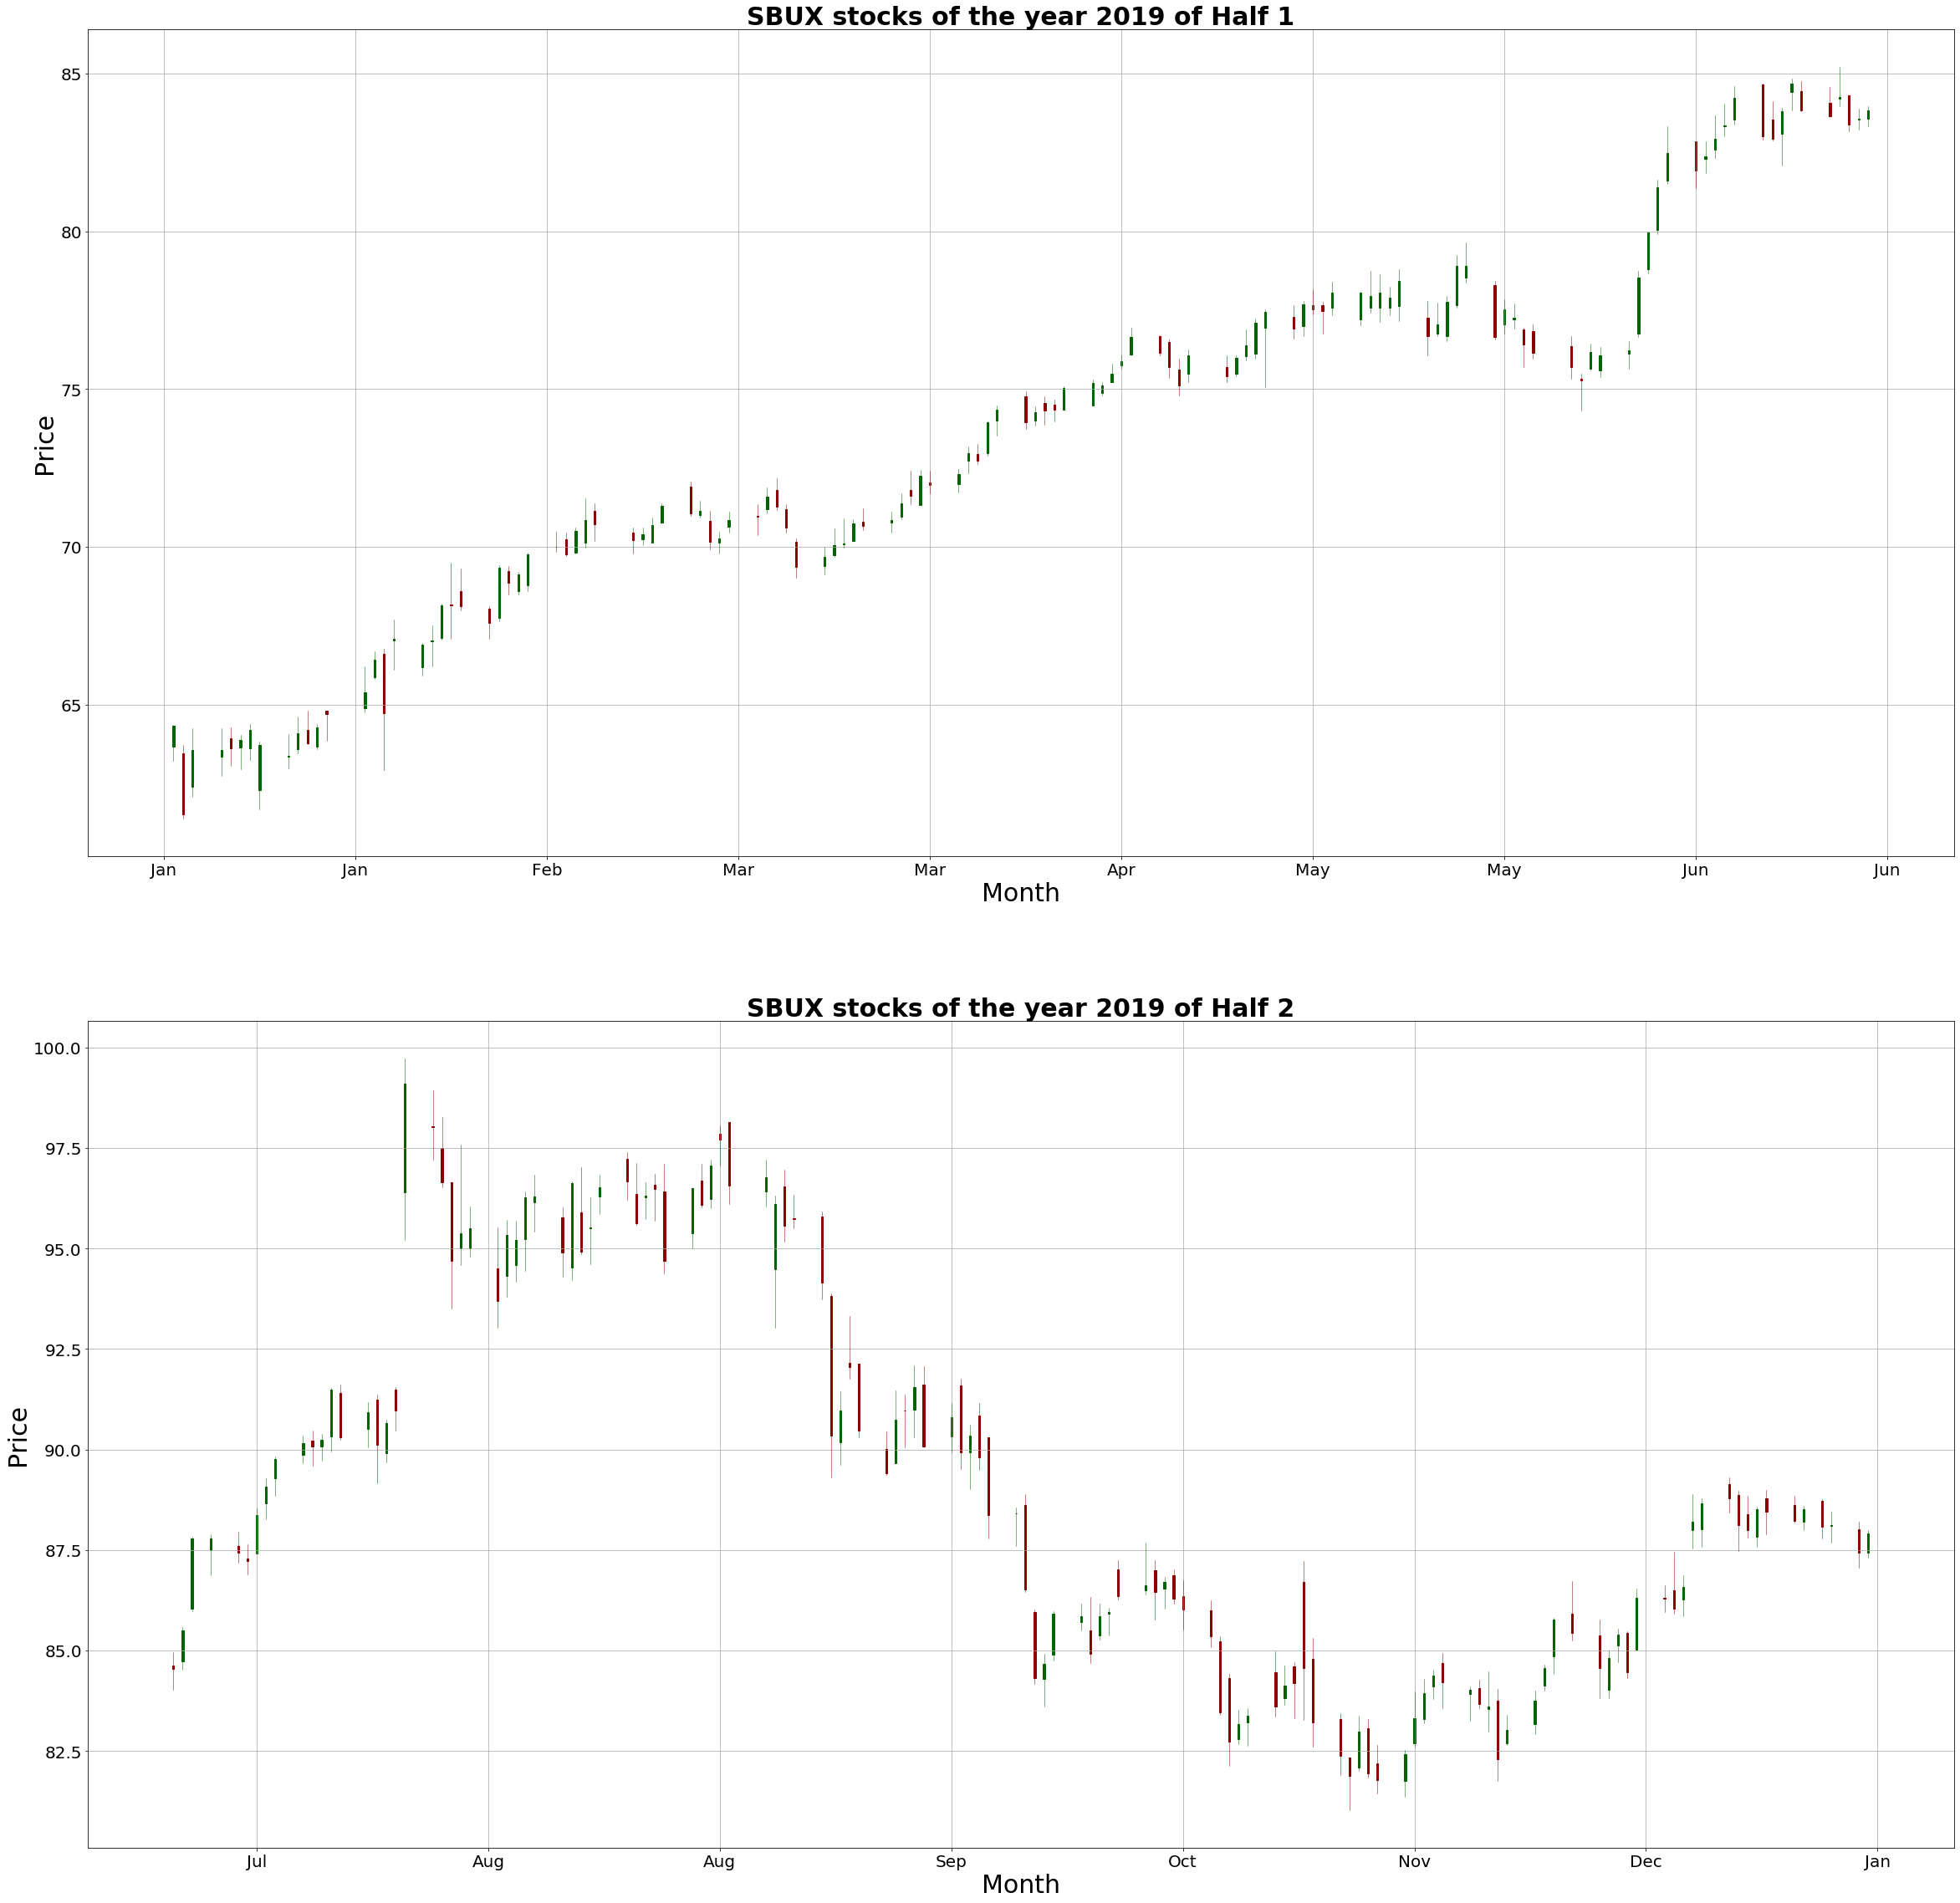

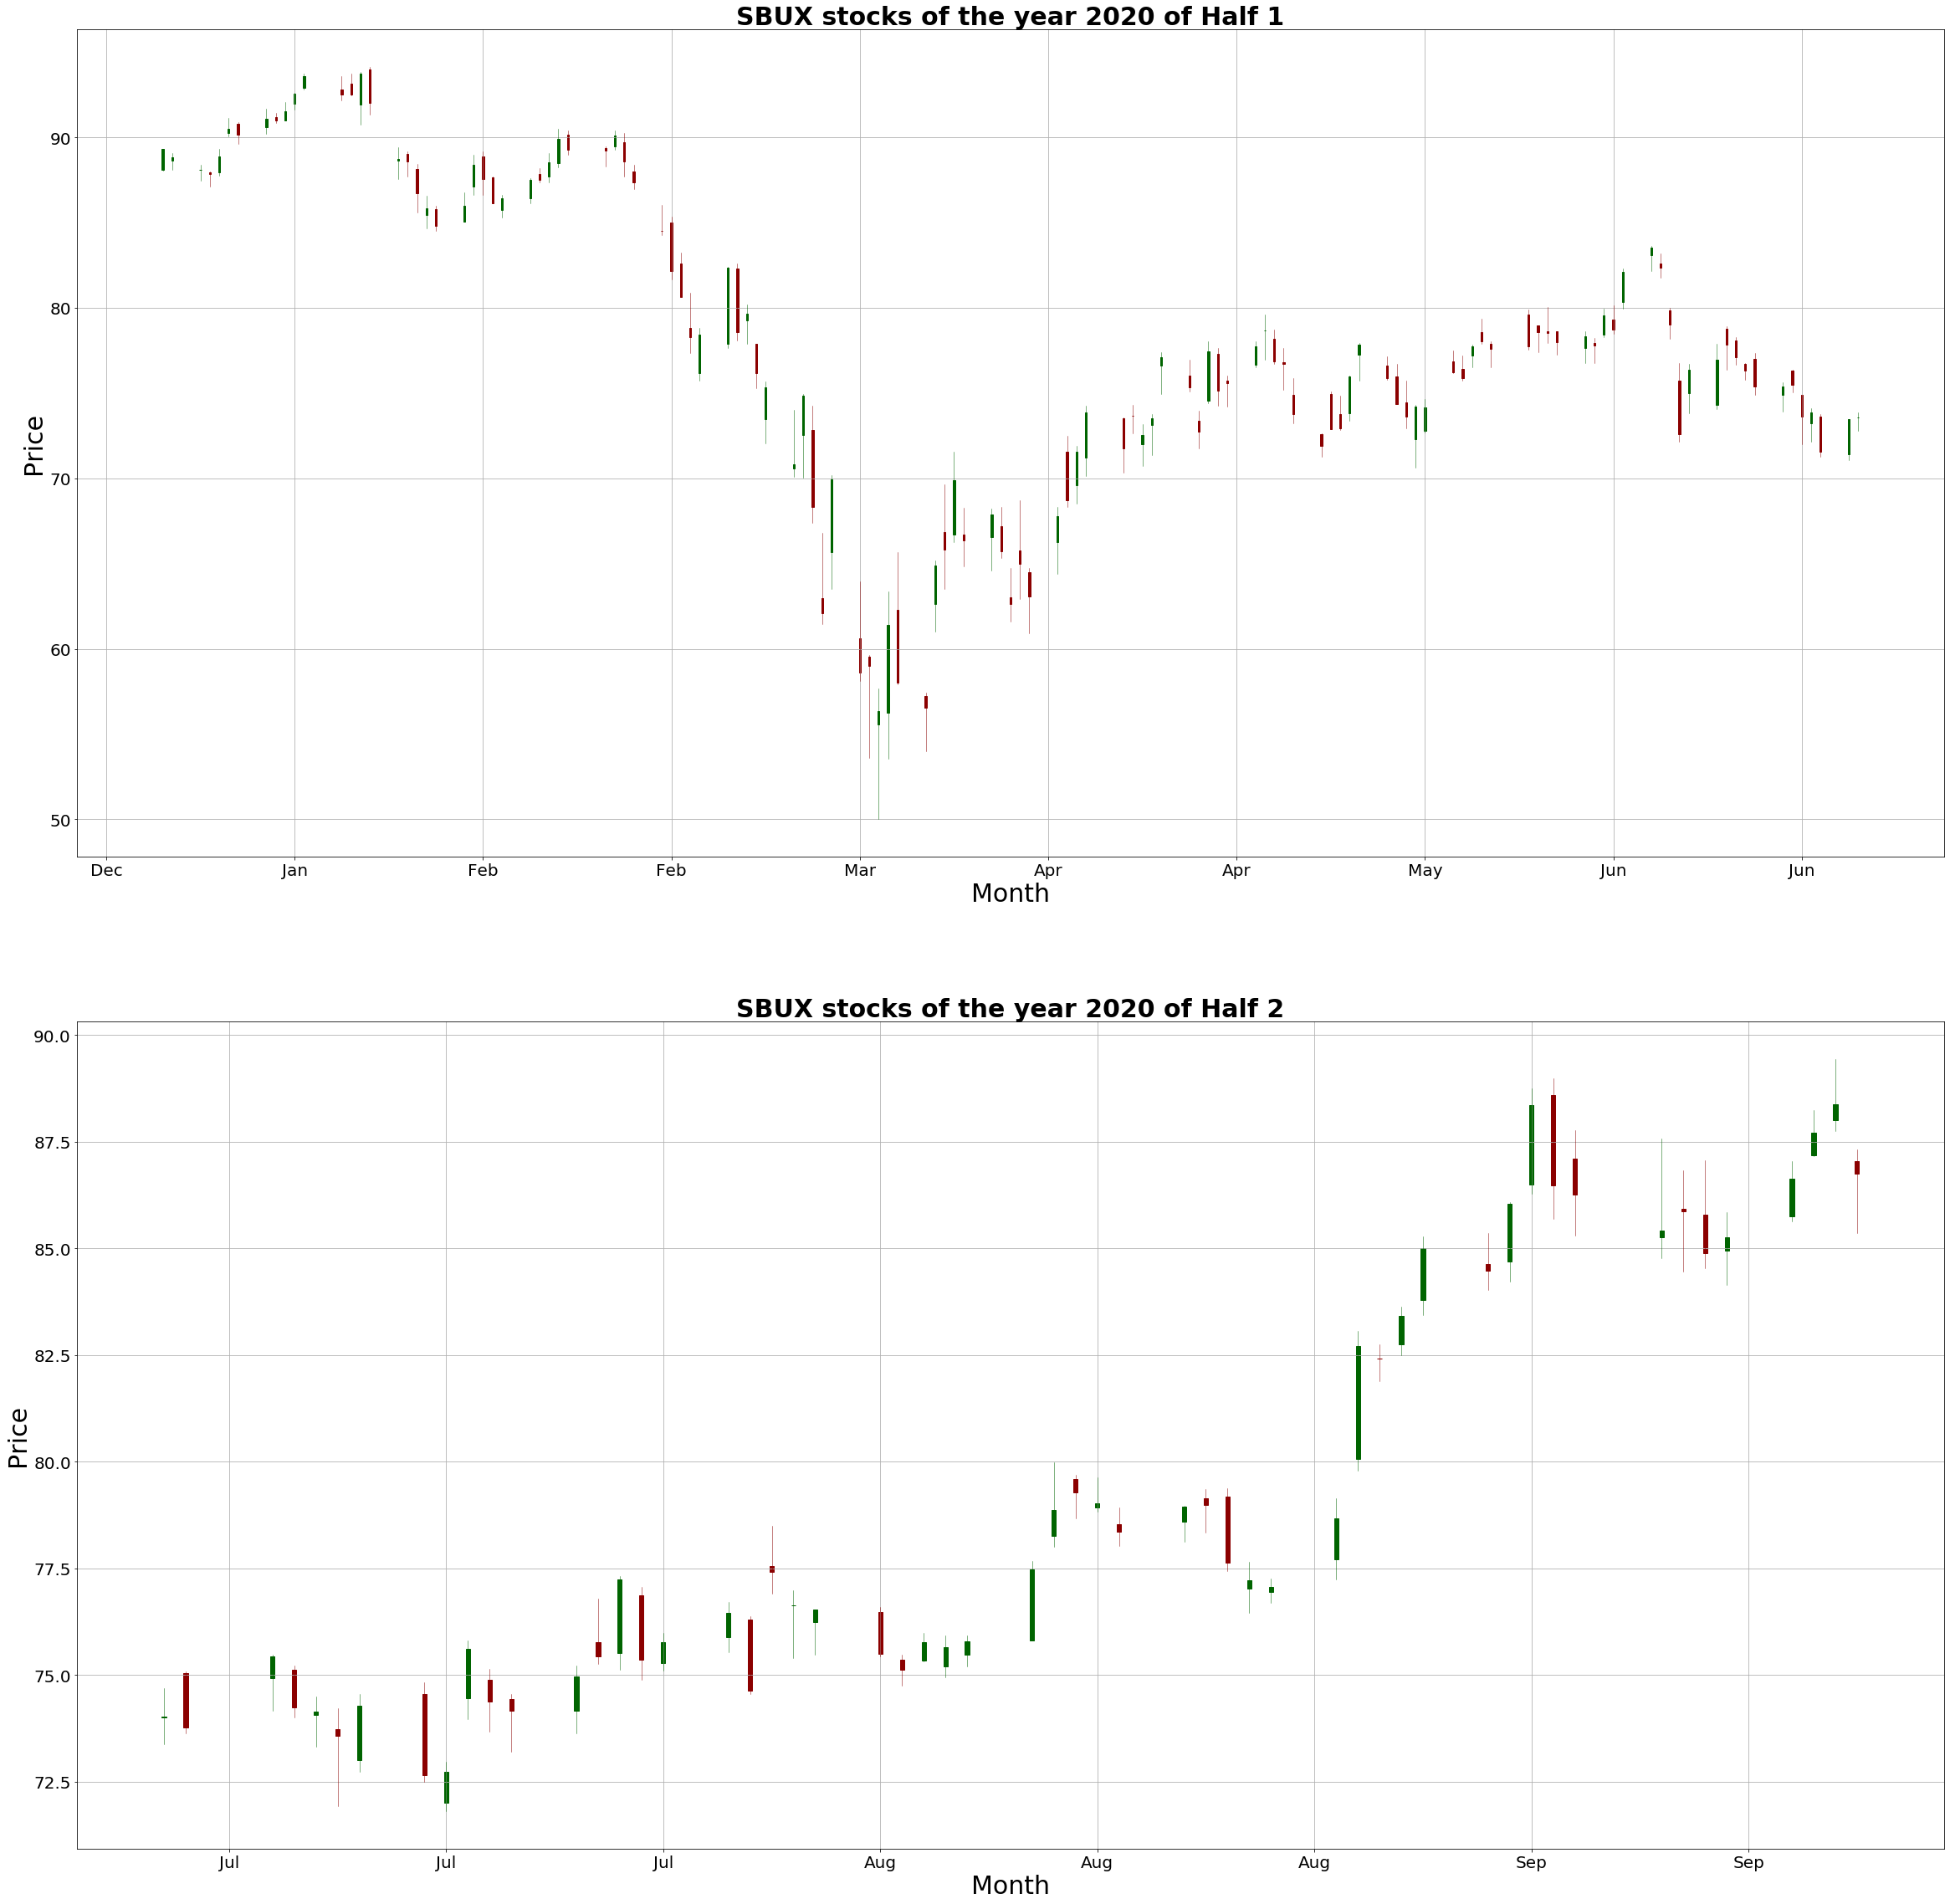

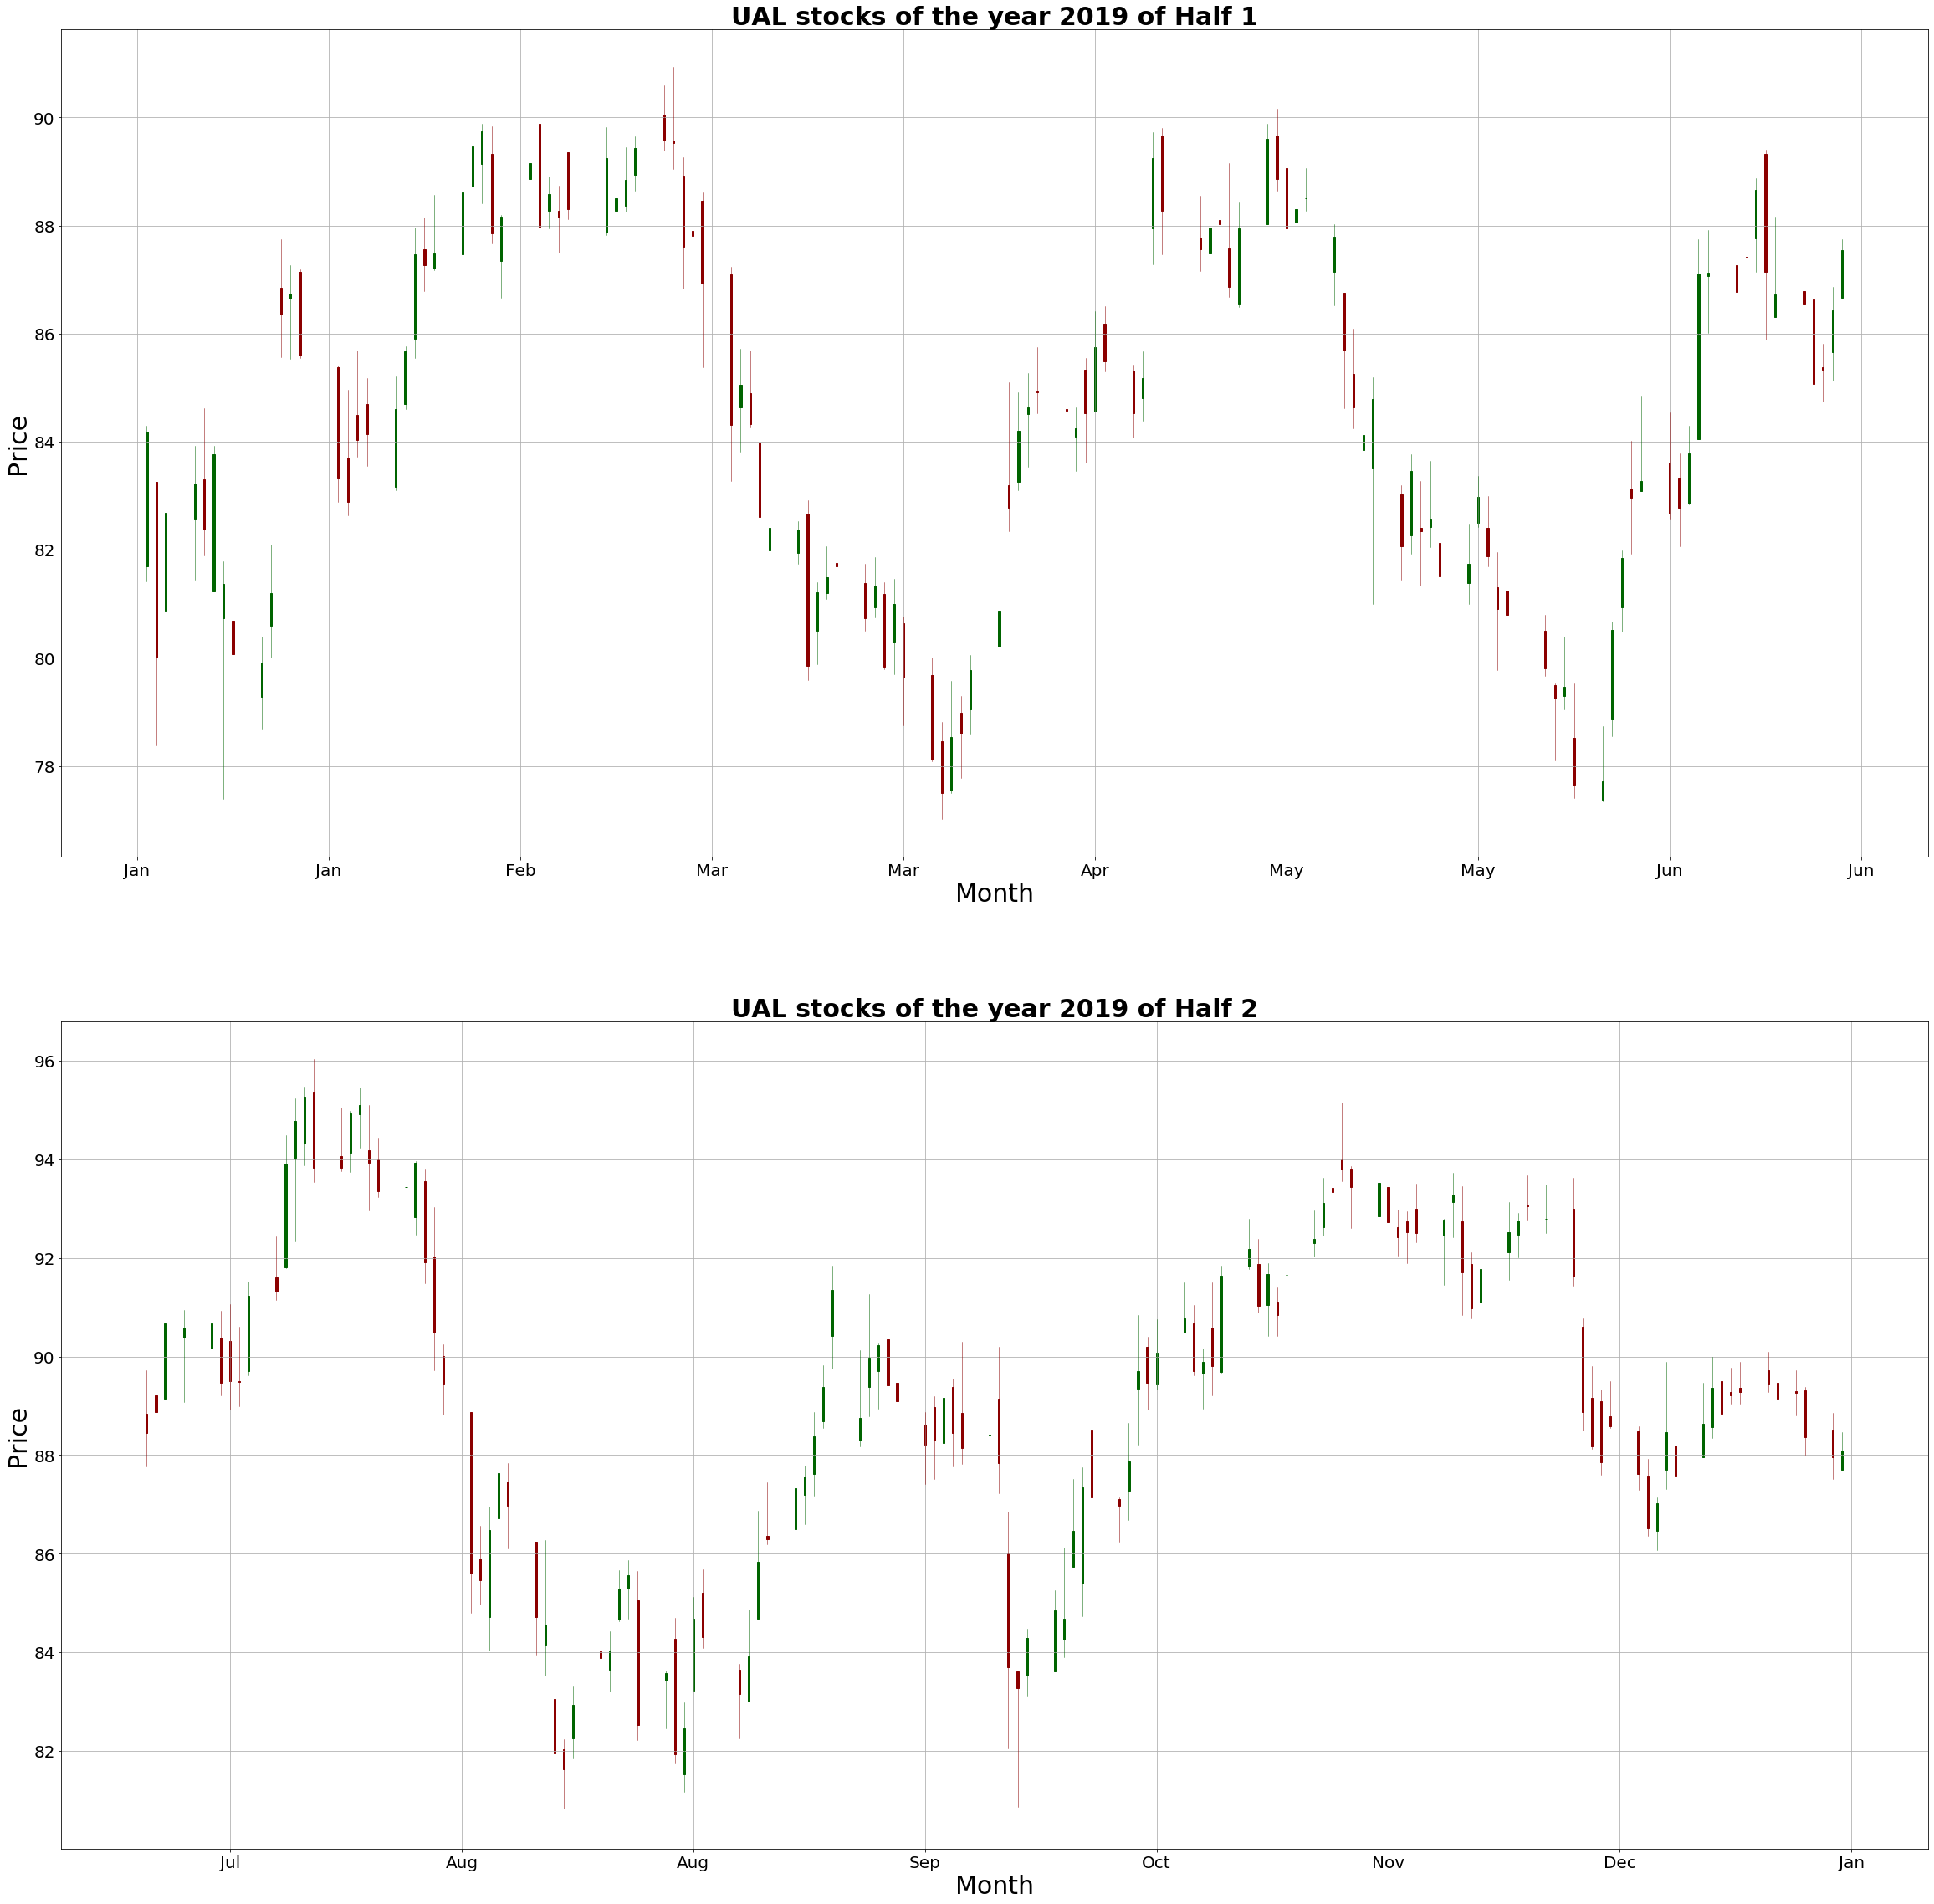

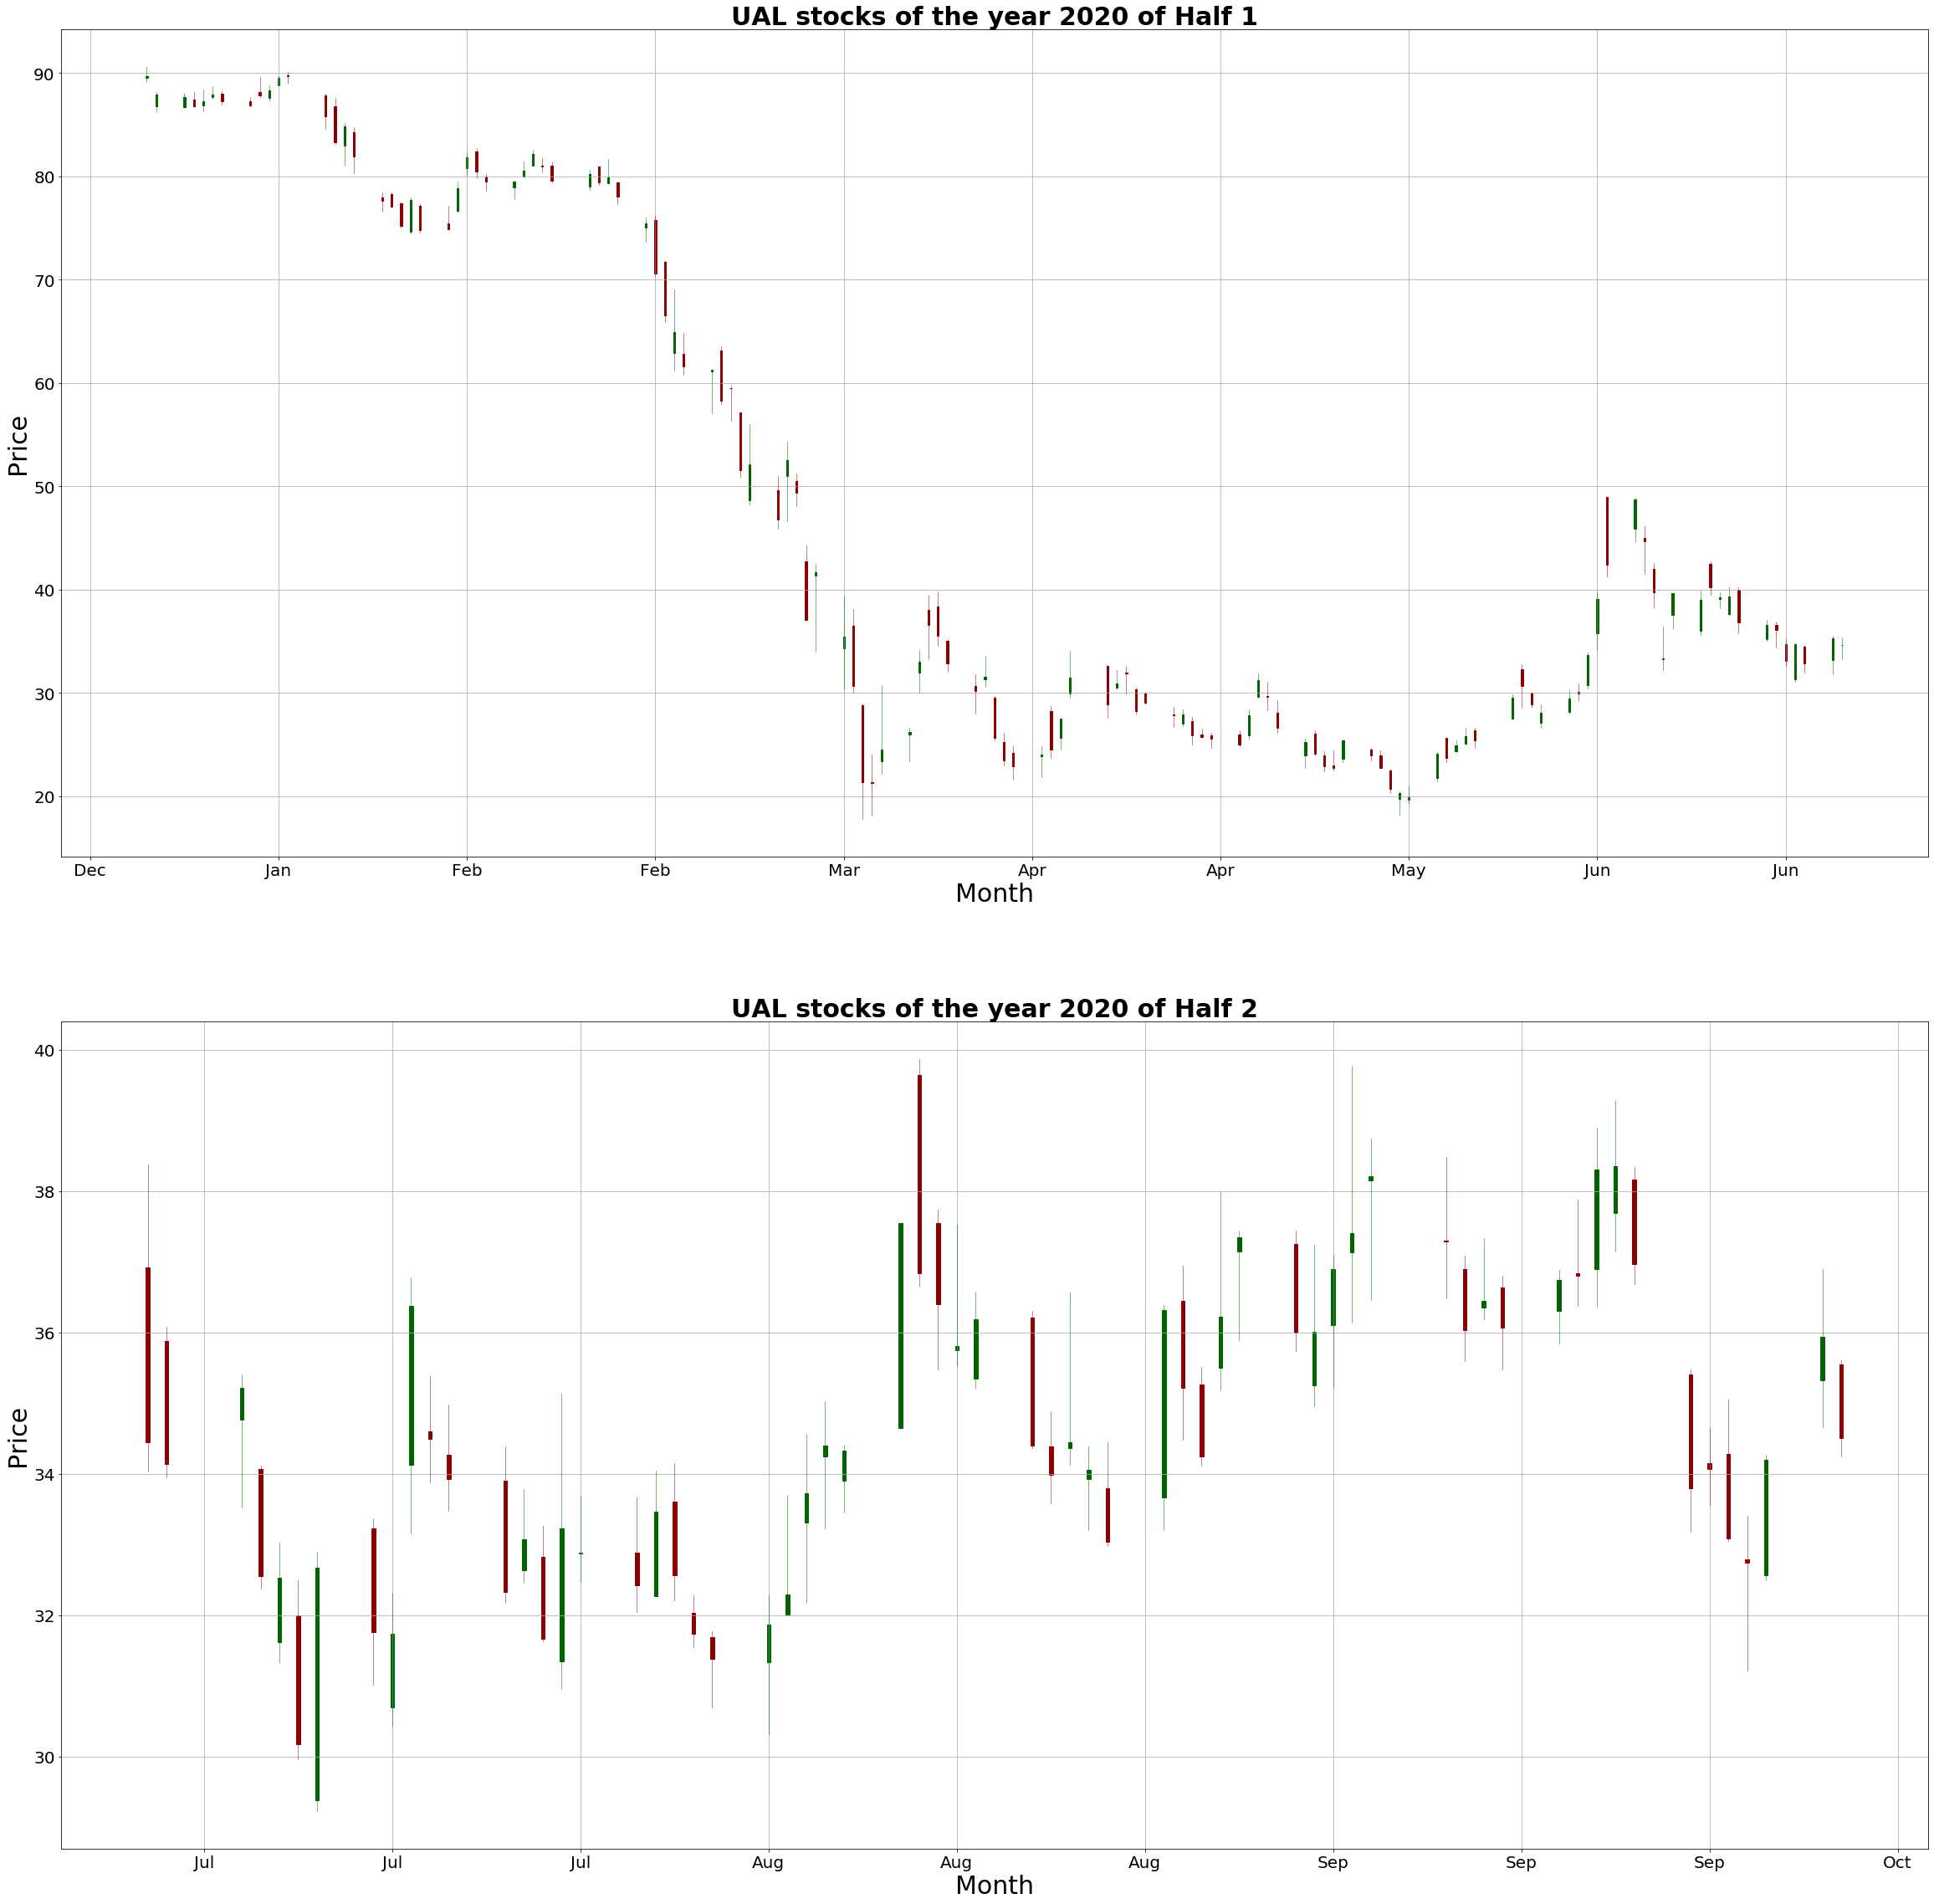

<Figure size 2880x2880 with 0 Axes>

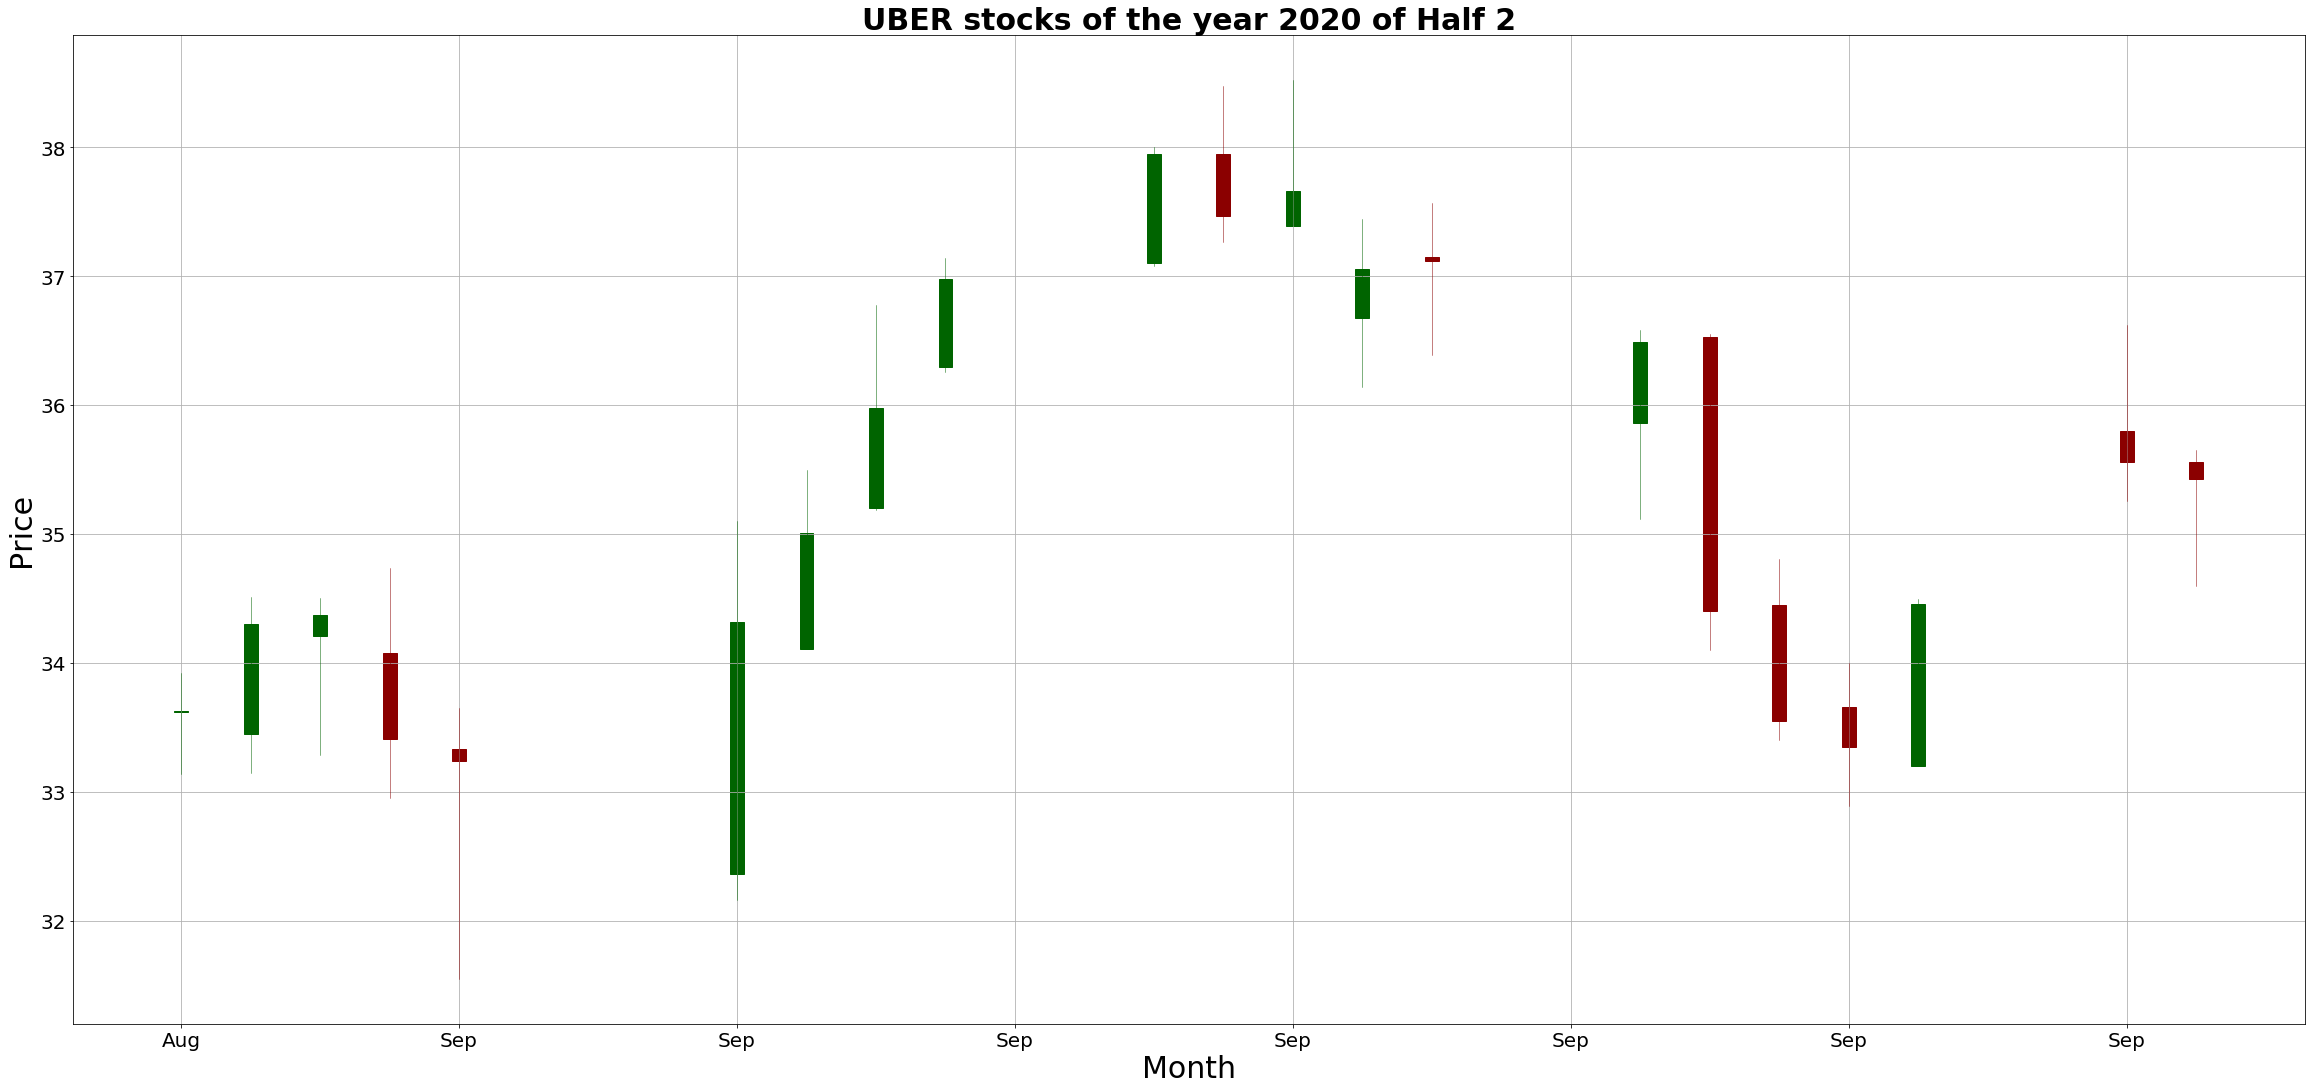

In [16]:
plot_candlesticks(df_companies, mode = 'half')

In [17]:
def plot_covid_period(df_companies):
    fig, axs = plt.subplots(nrows = len(df_companies),ncols = 1,figsize=(40, 120))
    i = 0
    for k in df_companies.keys():
        df = df_companies[k]
        y_data = df[df.Date.dt.year == 2020]
        try:
            q_data = y_data[y_data.Date.dt.month <= 7]
            if len(q_data) == 0:
                raise Exception("No Data")
            day_of_year = mdates.date2num(q_data['Date'])
            quotes = np.transpose(np.array([day_of_year, q_data[' Open'], q_data[' High'], q_data[' Low'], 
                  q_data[' Close/Last'], q_data[' Volume']]))
            candlestick_ohlc(axs[i], quotes, colorup = 'lime')
        except Exception as e:
            axs[i].remove()
            print("Company: ", k, "Has no data for covid period 2020 JAN-JUL")
        else:
            axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            axs[i].xaxis.set_major_locator(mticker.MaxNLocator(10))
            axs[i].grid(True)
            axs[i].set_title('{} stocks during COVID period 2020 JAN-JUL'.format(k), fontsize=30,
                            fontweight = 'bold')
            axs[i].tick_params(axis='both', which='major', labelsize=20)
            axs[i].set_ylabel('Price', fontsize=30)
            axs[i].set_xlabel('Month',fontsize=30)
        finally:
            i+=1
    plt.show()

Company:  UBER Has no data for covid period 2020 JAN-JUL


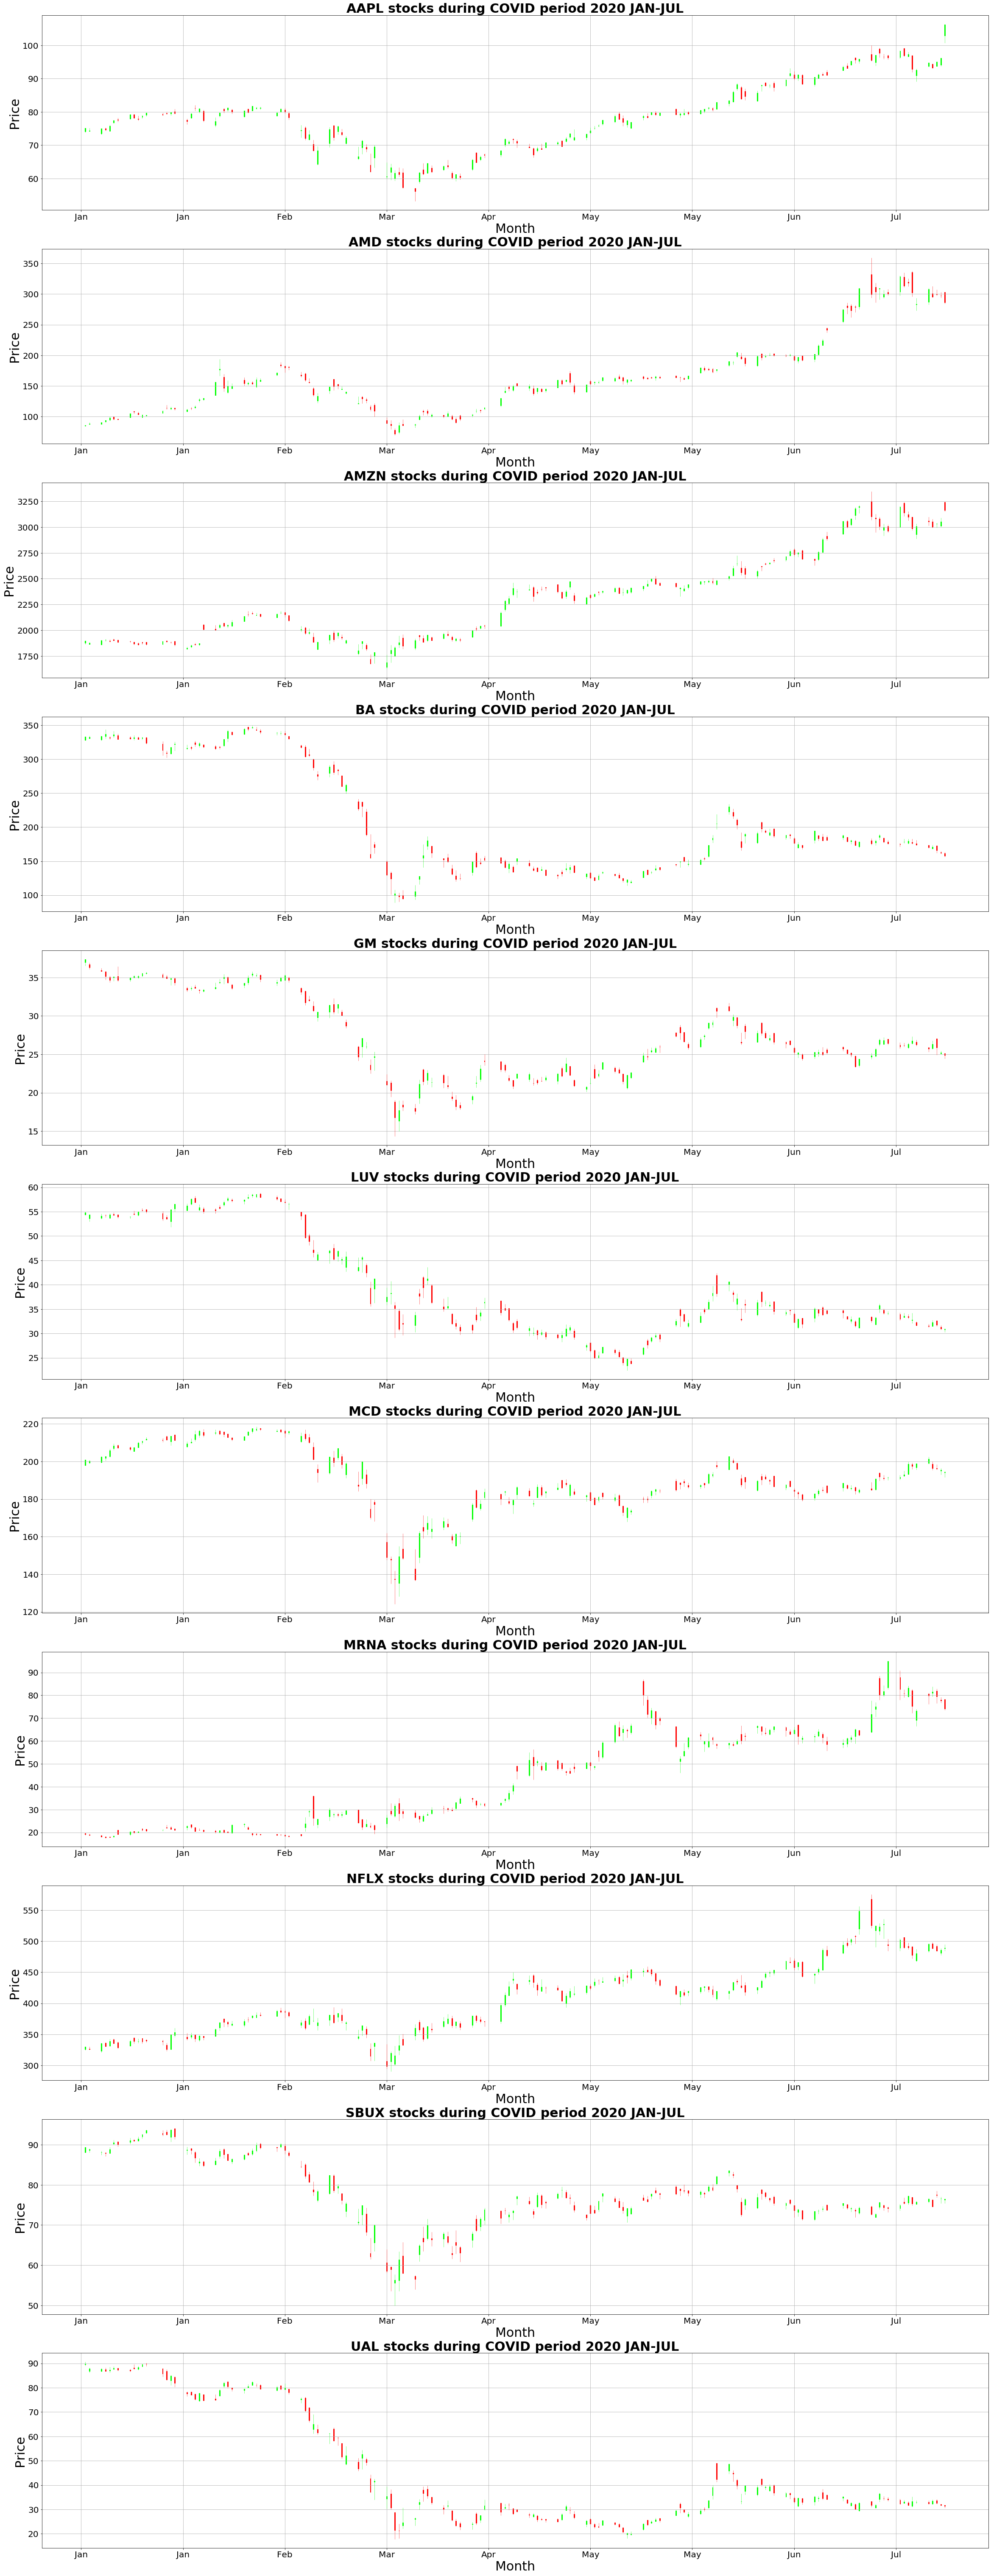

In [18]:
plot_covid_period(df_companies)

In [19]:
def plot_returns(df_companies):
    fig, axs = plt.subplots(nrows = len(df_companies), ncols = 1, figsize = (10,60))
    i = 0
    for k in df_companies.keys():
        df = df_companies[k]
        df = df[df.Date.dt.year >= 2016]
        day_of_year = mdates.date2num(df['Date'])
        stk_rets = np.array(df[' Close/Last']/df[' Close/Last'].shift(1) - 1)
        axs[i].plot(day_of_year, stk_rets)
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        axs[i].xaxis.set_major_locator(mticker.MaxNLocator(10))
        axs[i].grid(True)
        axs[i].set_title('Returns of {}'.format(k), fontsize=10,
                        fontweight = 'bold')
        axs[i].tick_params(axis='both', which='major', labelsize=10)
        axs[i].set_ylabel('Returns', fontsize=10)
        axs[i].set_xlabel('Year',fontsize=10)
        i+=1

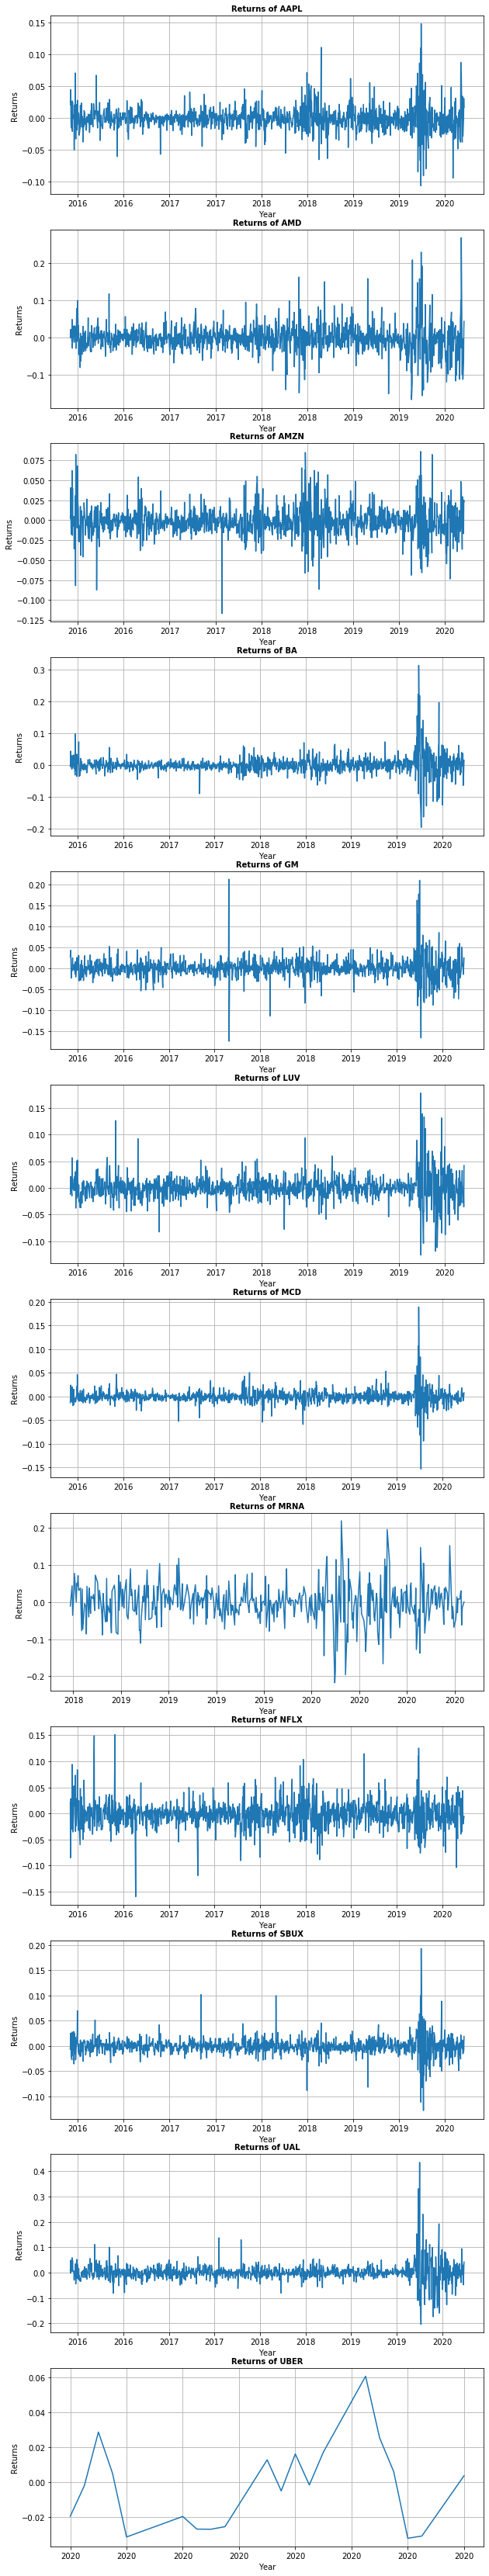

In [20]:
plot_returns(df_companies)

In [21]:
def plot_volume_bars(df_companies):
    i = 0
    fig, axs = plt.subplots(nrows = len(df_companies), ncols = 1, figsize = (20,120))
    for k in df_companies.keys():
        df = df_companies[k][['Date', ' Volume']][df_companies[k].Date.dt.year >= 2018]
        g = df.groupby(df.Date.dt.to_period('M'))
        g_names = [i.to_timestamp() for i in list(g.groups.keys())]
        g_names = ['-'.join([str(i.year),str(i.month)]) for i in g_names]
        ind = np.arange(len(g_names))
        avg_vol = [np.mean(v[' Volume']) for _,v in g]
        axs[i].bar(g_names, avg_vol)
        axs[i].set_ylabel('Average Volume', fontsize = 12)
        axs[i].set_title('Average Volume of Stock Trade per month for {}'.format(k), fontsize = 12,
                        fontweight = 'bold')
        axs[i].tick_params(axis='x', rotation=90)
        axs[i].set_xlabel('Monthly', fontsize = 12)
        i+=1
    plt.show()
        

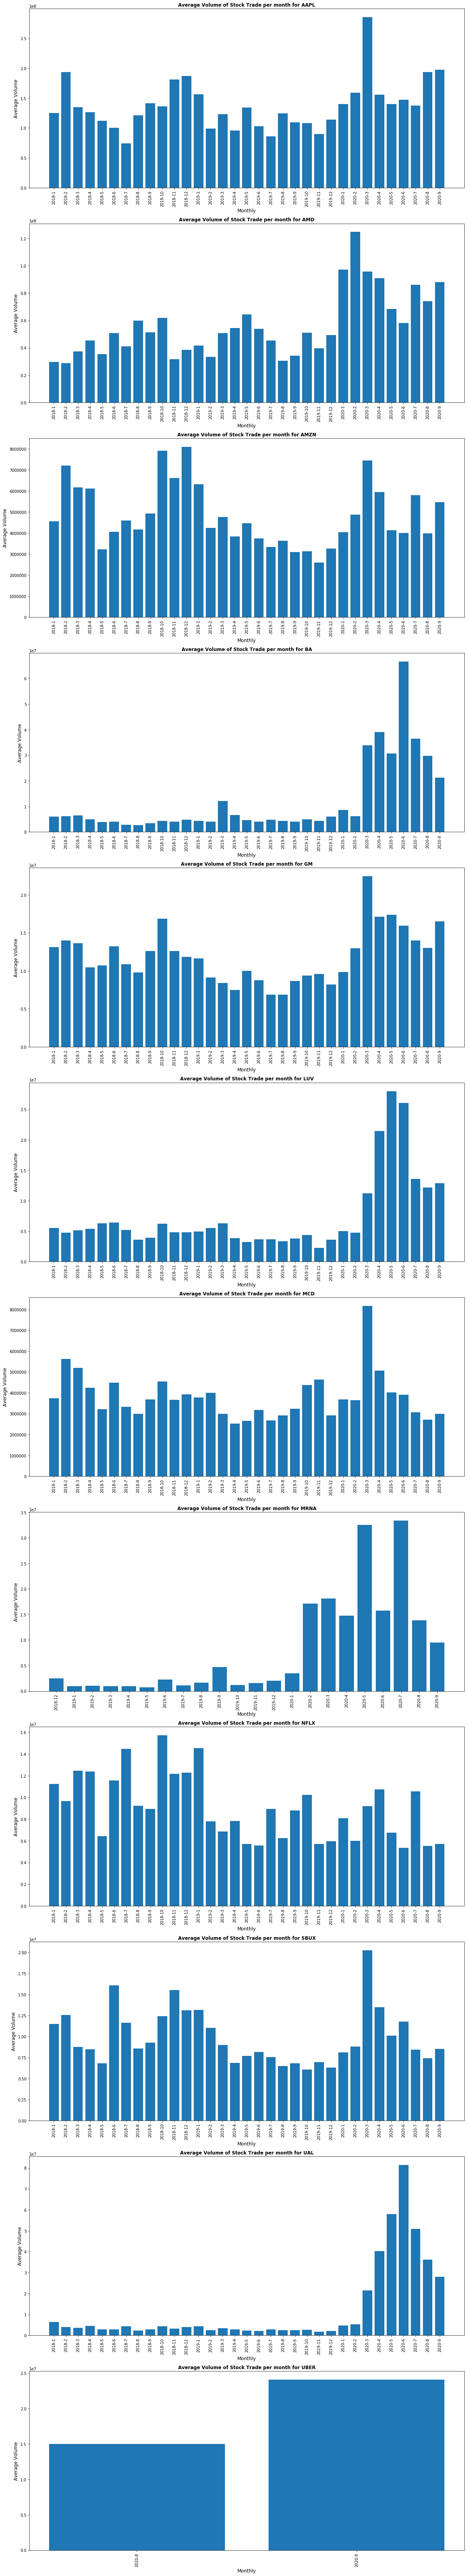

In [22]:
plot_volume_bars(df_companies)

In [23]:
def streaks_quaterly(df_companies):
    fig,axs = plt.subplots(nrows = len(df_companies),ncols = 1, figsize = (10,110))
    i = 0
    for k in df_companies.keys():
        df = df_companies[k]
        plot_labels = []
        plot_rise = []
        plot_fall = []
        for year in [2019,2020]:
            y_data = df[df.Date.dt.year == year]
            for q in range(1,5):
                try:
                    q_data = y_data[y_data.Date.dt.quarter == q]
                    if len(q_data) == 0:
                        raise Exception("No Data")
                    rises = q_data[' Close/Last'] > q_data[' Open']
                    res1 = 0
                    res2 = 0
                    count1 = 0
                    count2 =0
                    for r in rises:
                        if r == True:
                            count1+=1
                            res1 = max([count1, res1])
                            count2 = 0
                        else:
                            count1 = 0
                            count2 +=1
                            res2 = max([count2,res2])
                except:
                    print("Company: ", k, "Has no data for: ", year, "Q", q)
                else:
                    plot_labels.append('-'.join([str(year),'Q',str(q)]))
                    plot_rise.append(res1)
                    plot_fall.append(res2)
                    print("---------------------------------------------------------------------------")
                    print('Longest Rising Streak for {} in {} Q-{} is {}'.format(k, year, q, res1))
                    print('Longest Falling Streak for {} in {} Q-{} is {}'.format(k, year, q, res2))
                    print("---------------------------------------------------------------------------")
                finally:
                    pass
        axs[i].bar(plot_labels, plot_rise, color = 'lime', width = 0.25, label = 'Rise', bottom = plot_fall)
        axs[i].bar(plot_labels, plot_fall, color = 'red', width = 0.25, label = 'Fall')
        axs[i].set_ylabel('Streak', fontsize = 12)
        axs[i].set_title('Rise and Fall Streaks of {}'.format(k), fontsize = 12,
                        fontweight = 'bold')
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].set_xlabel('quaters', fontsize = 12)
        axs[i].legend()
        i+=1
    plt.show()

---------------------------------------------------------------------------
Longest Rising Streak for AAPL in 2019 Q-1 is 4
Longest Falling Streak for AAPL in 2019 Q-1 is 5
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for AAPL in 2019 Q-2 is 5
Longest Falling Streak for AAPL in 2019 Q-2 is 4
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for AAPL in 2019 Q-3 is 3
Longest Falling Streak for AAPL in 2019 Q-3 is 5
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for AAPL in 2019 Q-4 is 10
Longest Falling Streak for AAPL in 2019 Q-4 is 4
---------------------------------------------------------------------------
---

---------------------------------------------------------------------------
Longest Rising Streak for LUV in 2019 Q-1 is 4
Longest Falling Streak for LUV in 2019 Q-1 is 6
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for LUV in 2019 Q-2 is 6
Longest Falling Streak for LUV in 2019 Q-2 is 8
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for LUV in 2019 Q-3 is 6
Longest Falling Streak for LUV in 2019 Q-3 is 7
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for LUV in 2019 Q-4 is 4
Longest Falling Streak for LUV in 2019 Q-4 is 5
---------------------------------------------------------------------------
------------

---------------------------------------------------------------------------
Longest Rising Streak for UAL in 2019 Q-1 is 4
Longest Falling Streak for UAL in 2019 Q-1 is 6
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for UAL in 2019 Q-2 is 3
Longest Falling Streak for UAL in 2019 Q-2 is 5
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for UAL in 2019 Q-3 is 8
Longest Falling Streak for UAL in 2019 Q-3 is 5
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Longest Rising Streak for UAL in 2019 Q-4 is 5
Longest Falling Streak for UAL in 2019 Q-4 is 9
---------------------------------------------------------------------------
------------

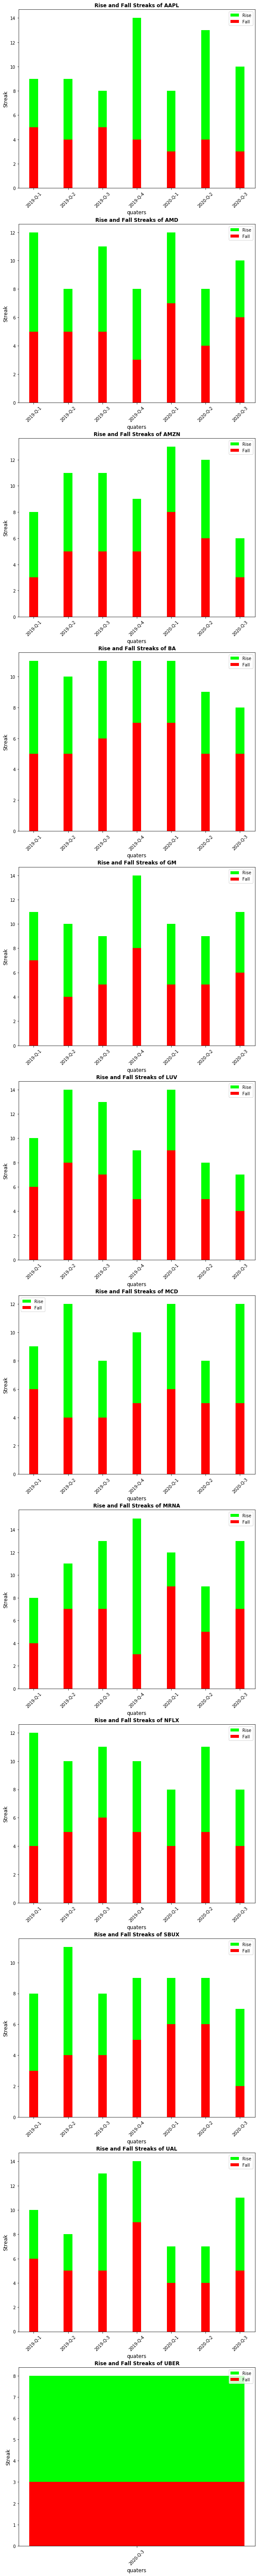

In [24]:
streaks_quaterly(df_companies)

In [25]:
import plotly.graph_objects as go
def plot_covid_period(df_companies, plot_mode):
    if plot_mode == 'static':
        fig, axs = plt.subplots(nrows = len(df_companies),ncols = 1,figsize=(40, 60))
        i = 0
        for k in df_companies.keys():
            df = df_companies[k]
            y_data = df[df.Date.dt.year == 2020]
            try:
                q_data = y_data[y_data.Date.dt.month <= 7]
                if len(q_data) == 0:
                    raise Exception("No Data")
                day_of_year = mdates.date2num(q_data['Date'])
                quotes = np.transpose(np.array([day_of_year, q_data[' Open'], q_data[' High'], q_data[' Low'], 
                    q_data[' Close/Last'], q_data[' Volume']]))
                candlestick_ohlc(axs[i], quotes, colorup = 'lime')
            except Exception as e:
                axs[i].remove()
                print("Company: ", k, "Has no data for covid period 2020 JAN-JUL")
            else:
                axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
                axs[i].xaxis.set_major_locator(mticker.MaxNLocator(10))
                axs[i].grid(True)
                axs[i].set_title('{} stocks during COVID period 2020 JAN-JUL'.format(k), fontsize=30,
                                fontweight = 'bold')
                axs[i].tick_params(axis='both', which='major', labelsize=20)
                axs[i].set_ylabel('Price', fontsize=30)
                axs[i].set_xlabel('Month',fontsize=30)
            finally:
                i+=1
        plt.show()
    elif plot_mode == 'interactive':
        i = 0
        for k in df_companies.keys():
            df = df_companies[k]
            y_data = df[df.Date.dt.year == 2020]
            try:
                q_data = y_data[y_data.Date.dt.month <= 7]
                if len(q_data) == 0:
                    raise Exception("No Data")
                fig = go.Figure(data=[
                    go.Candlestick(x=q_data['Date'],
                    open=q_data[' Open'],
                    high=q_data[' High'],
                    low=q_data[' Low'],
                    close=q_data[' Close/Last'])
                    ])

                fig.show()
            except Exception as e:
                print("Company: ", k, "Has no data for covid period 2020 JAN-JUL")
            finally:
                i+=1
    else:
        raise ValueError

In [26]:
plot_covid_period(df_companies,'interactive')

Company:  UBER Has no data for covid period 2020 JAN-JUL


In [27]:
for k in df_companies.keys():
    df = df_companies[k]
    y_data = df[df.Date.dt.year == 2020]
    for year in [2019,2020]:
        y_data = df[df.Date.dt.year == year]
        try:
            if year == 2020:
                y_data = y_data[y_data.Date.dt.month <= 7]
            if len(y_data) == 0:
                raise Exception("No Data")
            fig = go.Figure(data=[
                go.Candlestick(x=y_data['Date'],
                open=y_data[' Open'],
                high=y_data[' High'],
                low=y_data[' Low'],
                close=y_data[' Close/Last'])
                ])
            fig.update_layout(title=str(k)+"stocks of the year "+str(year),
                            xaxis_title="Month",
                            yaxis_title="Price",
                            )
            fig.show()
        except Exception as e:
            print("Company: ", k, "Has no data for covid period 2020 JAN-JUL")
        finally:
            pass

Company:  UBER Has no data for covid period 2020 JAN-JUL
Company:  UBER Has no data for covid period 2020 JAN-JUL


In [28]:
len(df_companies)

12